In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

At first, we are just plotting our data and looking at the heads of the data so as t get a better understanding of the data which is a very important step in the prediction algorithm for machine learning. We are considering two houses Houses 1 and 2 with data of the power usage of two main supplies as well the power usage from each individual appliances in that house.

Our Aim is to give a time-cast forecasting of the power usage from each house or the power usage of an appliance in that house and comparing it with the previous or the real power consumption.

In [3]:
def read_label():
    label = {}
    for i in range(1, 7):
        hi = '/Users/rakshithasathyakumar/Documents/SJSU/Semester 2/CMPE 272/Mini project/Data sets/low_freq/house_{}/labels.dat'.format(i)
        label[i] = {}
        with open(hi) as f:
            for line in f:
                splitted_line = line.split(' ')
                label[i][int(splitted_line[0])] = splitted_line[1].strip() + '_' + splitted_line[0]
    return label
labels = read_label()
for i in range(1,7):
    print('House {}: '.format(i), labels[i], '\n')

House 1:  {1: 'mains_1', 2: 'mains_2', 3: 'oven_3', 4: 'oven_4', 5: 'refrigerator_5', 6: 'dishwaser_6', 7: 'kitchen_outlets_7', 8: 'kitchen_outlets_8', 9: 'lighting_9', 10: 'washer_dryer_10', 11: 'microwave_11', 12: 'bathroom_gfi_12', 13: 'electric_heat_13', 14: 'stove_14', 15: 'kitchen_outlets_15', 16: 'kitchen_outlets_16', 17: 'lighting_17', 18: 'lighting_18', 19: 'washer_dryer_19', 20: 'washer_dryer_20'} 

House 2:  {1: 'mains_1', 2: 'mains_2', 3: 'kitchen_outlets_3', 4: 'lighting_4', 5: 'stove_5', 6: 'microwave_6', 7: 'washer_dryer_7', 8: 'kitchen_outlets_8', 9: 'refrigerator_9', 10: 'dishwaser_10', 11: 'disposal_11'} 

House 3:  {1: 'mains_1', 2: 'mains_2', 3: 'outlets_unknown_3', 4: 'outlets_unknown_4', 5: 'lighting_5', 6: 'electronics_6', 7: 'refrigerator_7', 8: 'disposal_8', 9: 'dishwaser_9', 10: 'furance_10', 11: 'lighting_11', 12: 'outlets_unknown_12', 13: 'washer_dryer_13', 14: 'washer_dryer_14', 15: 'lighting_15', 16: 'microwave_16', 17: 'lighting_17', 18: 'smoke_alarms_18'

In [4]:
def read_merge_data(house):
    path = '/Users/rakshithasathyakumar/Documents/SJSU/Semester 2/CMPE 272/Mini project/Data sets/low_freq/house_{}/'.format(house)
    file = path + 'channel_1.dat'
    df = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][1]], 
                                       dtype = {'unix_time': 'int64', labels[house][1]:'float64'}) 
    
    num_apps = len(glob.glob(path + 'channel*'))
    for i in range(2, num_apps + 1):
        file = path + 'channel_{}.dat'.format(i)
        data = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][i]], 
                                       dtype = {'unix_time': 'int64', labels[house][i]:'float64'})
        df = pd.merge(df, data, how = 'inner', on = 'unix_time')
    df['timestamp'] = df['unix_time'].astype("datetime64[s]")
    df = df.set_index(df['timestamp'].values)
    df.drop(['unix_time','timestamp'], axis=1, inplace=True)
    return df
df = {}
for i in range(1,7):
    df[i] = read_merge_data(i)

In [5]:
for i in range(1,7):
    print('House {} data has shape: '.format(i), df[i].shape)
    display(df[i].tail(3))

House 1 data has shape:  (406748, 20)


mains_1  mains_2  oven_3  oven_4  refrigerator_5  \
2011-05-24 19:56:27   235.46    38.61     0.0     0.0           190.0   
2011-05-24 19:56:30   235.98    38.77     0.0     0.0           189.0   
2011-05-24 19:56:34   235.29    38.83     0.0     0.0           186.0   

                     dishwaser_6  kitchen_outlets_7  kitchen_outlets_8  \
2011-05-24 19:56:27          0.0               24.0               20.0   
2011-05-24 19:56:30          0.0               24.0               20.0   
2011-05-24 19:56:34          0.0               26.0               20.0   

                     lighting_9  washer_dryer_10  microwave_11  \
2011-05-24 19:56:27         2.0              0.0           4.0   
2011-05-24 19:56:30         2.0              0.0           4.0   
2011-05-24 19:56:34         2.0              0.0           4.0   

                     bathroom_gfi_12  electric_heat_13  stove_14  \
2011-05-24 19:56:27              1.0               0.0       0.0   
2011-05-24 19:56:30              1.0               0.0       0.0   
2011-05-24 19:56:34              1.0               0.0       0.0   

                     kitchen_outlets_15  kitchen_outlets_16  lighting_17  \
2011-05-24 19:56:27                 1.0                 0.0          0.0   
2011-05-24 19:56:30                 1.0                 0.0          0.0   
2011-05-24 19:56:34                 1.0                 0.0          0.0   

                     lighting_18  washer_dryer_19  washer_dryer_20  
2011-05-24 19:56:27          1.0              0.0              0.0  
2011-05-24 19:56:30          1.0              0.0              0.0  
2011-05-24 19:56:34          1.0              0.0              0.0

House 2 data has shape:  (316840, 11)


mains_1  mains_2  kitchen_outlets_3  lighting_4  stove_5  \
2011-05-22 23:59:01    10.84   252.61                0.0         9.0      0.0   
2011-05-22 23:59:04    10.88   253.02                0.0         9.0      0.0   
2011-05-22 23:59:08    10.84   252.77                0.0         9.0      0.0   

                     microwave_6  washer_dryer_7  kitchen_outlets_8  \
2011-05-22 23:59:01          5.0             0.0                2.0   
2011-05-22 23:59:04          4.0             0.0                2.0   
2011-05-22 23:59:08          4.0             0.0                2.0   

                     refrigerator_9  dishwaser_10  disposal_11  
2011-05-22 23:59:01           158.0           0.0          0.0  
2011-05-22 23:59:04           160.0           0.0          0.0  
2011-05-22 23:59:08           157.0           0.0          0.0

House 3 data has shape:  (376150, 22)


mains_1  mains_2  outlets_unknown_3  outlets_unknown_4  \
2011-05-31 00:19:30    15.45     2.23                0.0                1.0   
2011-05-31 00:19:33    15.42     2.23                0.0                1.0   
2011-05-31 00:19:36    15.44     2.23                0.0                1.0   

                     lighting_5  electronics_6  refrigerator_7  disposal_8  \
2011-05-31 00:19:30         1.0         1139.0             8.0         6.0   
2011-05-31 00:19:33         1.0         1138.0             8.0         6.0   
2011-05-31 00:19:36         1.0         1134.0             7.0         6.0   

                     dishwaser_9  furance_10  ...  washer_dryer_13  \
2011-05-31 00:19:30          3.0         7.0  ...              0.0   
2011-05-31 00:19:33          3.0         7.0  ...              0.0   
2011-05-31 00:19:36          3.0         7.0  ...              0.0   

                     washer_dryer_14  lighting_15  microwave_16  lighting_17  \
2011-05-31 00:19:30              0.0          1.0           2.0         10.0   
2011-05-31 00:19:33              0.0          1.0           2.0         10.0   
2011-05-31 00:19:36              0.0          1.0           2.0         10.0   

                     smoke_alarms_18  lighting_19  bathroom_gfi_20  \
2011-05-31 00:19:30              0.0          0.0              0.0   
2011-05-31 00:19:33              0.0          0.0              0.0   
2011-05-31 00:19:36              0.0          0.0              0.0   

                     kitchen_outlets_21  kitchen_outlets_22  
2011-05-31 00:19:30                 0.0                 2.5  
2011-05-31 00:19:33                 0.0                 2.5  
2011-05-31 00:19:36                 0.0                 2.5  

[3 rows x 22 columns]

House 4 data has shape:  (428076, 20)


mains_1  mains_2  lighting_3  furance_4  \
2011-06-04 00:45:31   403.36    94.65       173.0       27.0   
2011-06-04 00:45:35   401.11    94.63       174.0       27.0   
2011-06-04 00:45:38   400.24    94.43       175.0       27.0   

                     kitchen_outlets_5  outlets_unknown_6  washer_dryer_7  \
2011-06-04 00:45:31               38.0                3.0             1.0   
2011-06-04 00:45:35               34.0                4.0             1.0   
2011-06-04 00:45:38               38.0                4.0             1.0   

                     stove_8  air_conditioning_9  air_conditioning_10  \
2011-06-04 00:45:31      5.0                 0.0                  0.0   
2011-06-04 00:45:35      5.0                 0.0                  0.0   
2011-06-04 00:45:38      5.0                 0.0                  0.0   

                     miscellaeneous_11  smoke_alarms_12  lighting_13  \
2011-06-04 00:45:31                1.0              0.0         25.0   
2011-06-04 00:45:35                1.0              0.0         25.0   
2011-06-04 00:45:38                2.0              0.0         25.0   

                     kitchen_outlets_14  dishwaser_15  bathroom_gfi_16  \
2011-06-04 00:45:31               135.0           0.0              0.0   
2011-06-04 00:45:35               135.0           0.0              0.0   
2011-06-04 00:45:38               135.0           0.0              0.0   

                     bathroom_gfi_17  lighting_18  lighting_19  \
2011-06-04 00:45:31              1.0          0.0          0.0   
2011-06-04 00:45:35              1.0          0.0          0.0   
2011-06-04 00:45:38              1.0          0.0          0.0   

                     air_conditioning_20  
2011-06-04 00:45:31                  0.0  
2011-06-04 00:45:35                  0.0  
2011-06-04 00:45:38                  0.0

House 5 data has shape:  (77451, 26)


mains_1  mains_2  microwave_3  lighting_4  \
2011-06-01 00:20:07   151.68    37.39          3.0         0.0   
2011-06-01 00:20:10   150.42    37.21          3.0         0.0   
2011-06-01 00:20:14   149.29    37.10          3.0         0.0   

                     outlets_unknown_5  furance_6  outlets_unknown_7  \
2011-06-01 00:20:07                3.0        7.0                0.0   
2011-06-01 00:20:10                3.0        7.0                0.0   
2011-06-01 00:20:14                3.0        7.0                0.0   

                     washer_dryer_8  washer_dryer_9  subpanel_10  ...  \
2011-06-01 00:20:07             0.0             0.0         12.5  ...   
2011-06-01 00:20:10             0.0             0.0         12.5  ...   
2011-06-01 00:20:14             0.0             0.0         12.5  ...   

                     lighting_17  refrigerator_18  lighting_19  dishwaser_20  \
2011-06-01 00:20:07          0.0              0.0          2.0           0.0   
2011-06-01 00:20:10          0.0              1.0          2.0           0.0   
2011-06-01 00:20:14          0.0              0.0          2.0           0.0   

                     disposal_21  electronics_22  lighting_23  \
2011-06-01 00:20:07          0.0             5.0        115.0   
2011-06-01 00:20:10          0.0             5.0        100.0   
2011-06-01 00:20:14          0.0             5.0         97.5   

                     kitchen_outlets_24  kitchen_outlets_25  \
2011-06-01 00:20:07                 0.0                 0.0   
2011-06-01 00:20:10                 0.0                 0.0   
2011-06-01 00:20:14                 0.0                 0.0   

                     outdoor_outlets_26  
2011-06-01 00:20:07                 0.0  
2011-06-01 00:20:10                 0.0  
2011-06-01 00:20:14                 0.0  

[3 rows x 26 columns]

House 6 data has shape:  (192192, 17)


mains_1  mains_2  kitchen_outlets_3  washer_dryer_4  \
2011-06-14 01:12:25    19.82   401.65                4.0             3.0   
2011-06-14 01:12:33    19.59   400.11                4.0             3.0   
2011-06-14 01:12:36    19.59   399.47                4.0             3.0   

                     stove_5  electronics_6  bathroom_gfi_7  refrigerator_8  \
2011-06-14 01:12:25      1.0            0.0             4.0           140.0   
2011-06-14 01:12:33      1.0            0.0             3.0           143.0   
2011-06-14 01:12:36      1.0            0.0             3.0           143.0   

                     dishwaser_9  outlets_unknown_10  outlets_unknown_11  \
2011-06-14 01:12:25          0.0                87.0                 0.0   
2011-06-14 01:12:33          0.0                87.0                 0.0   
2011-06-14 01:12:36          0.0                87.0                 0.0   

                     electric_heat_12  kitchen_outlets_13  lighting_14  \
2011-06-14 01:12:25               7.0                 1.0        114.0   
2011-06-14 01:12:33               7.0                 1.0        113.0   
2011-06-14 01:12:36               7.0                 0.0        113.0   

                     air_conditioning_15  air_conditioning_16  \
2011-06-14 01:12:25                  4.0                  0.0   
2011-06-14 01:12:33                  4.0                  0.0   
2011-06-14 01:12:36                  4.0                  0.0   

                     air_conditioning_17  
2011-06-14 01:12:25                  0.0  
2011-06-14 01:12:33                  0.0  
2011-06-14 01:12:36                  0.0

In [6]:
dates = {}
for i in range(1,3):
    dates[i] = [str(time)[:10] for time in df[i].index.values]
    dates[i] = sorted(list(set(dates[i])))
    print('House {0} data contain {1} days from {2} to {3}.'.format(i,len(dates[i]),dates[i][0], dates[i][-1]))
    print(dates[i], '\n')

House 1 data contain 23 days from 2011-04-18 to 2011-05-24.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-30', '2011-05-01', '2011-05-02', '2011-05-03', '2011-05-06', '2011-05-07', '2011-05-11', '2011-05-12', '2011-05-13', '2011-05-22', '2011-05-23', '2011-05-24'] 

House 2 data contain 16 days from 2011-04-18 to 2011-05-22.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-29', '2011-04-30', '2011-05-01', '2011-05-02', '2011-05-22'] 



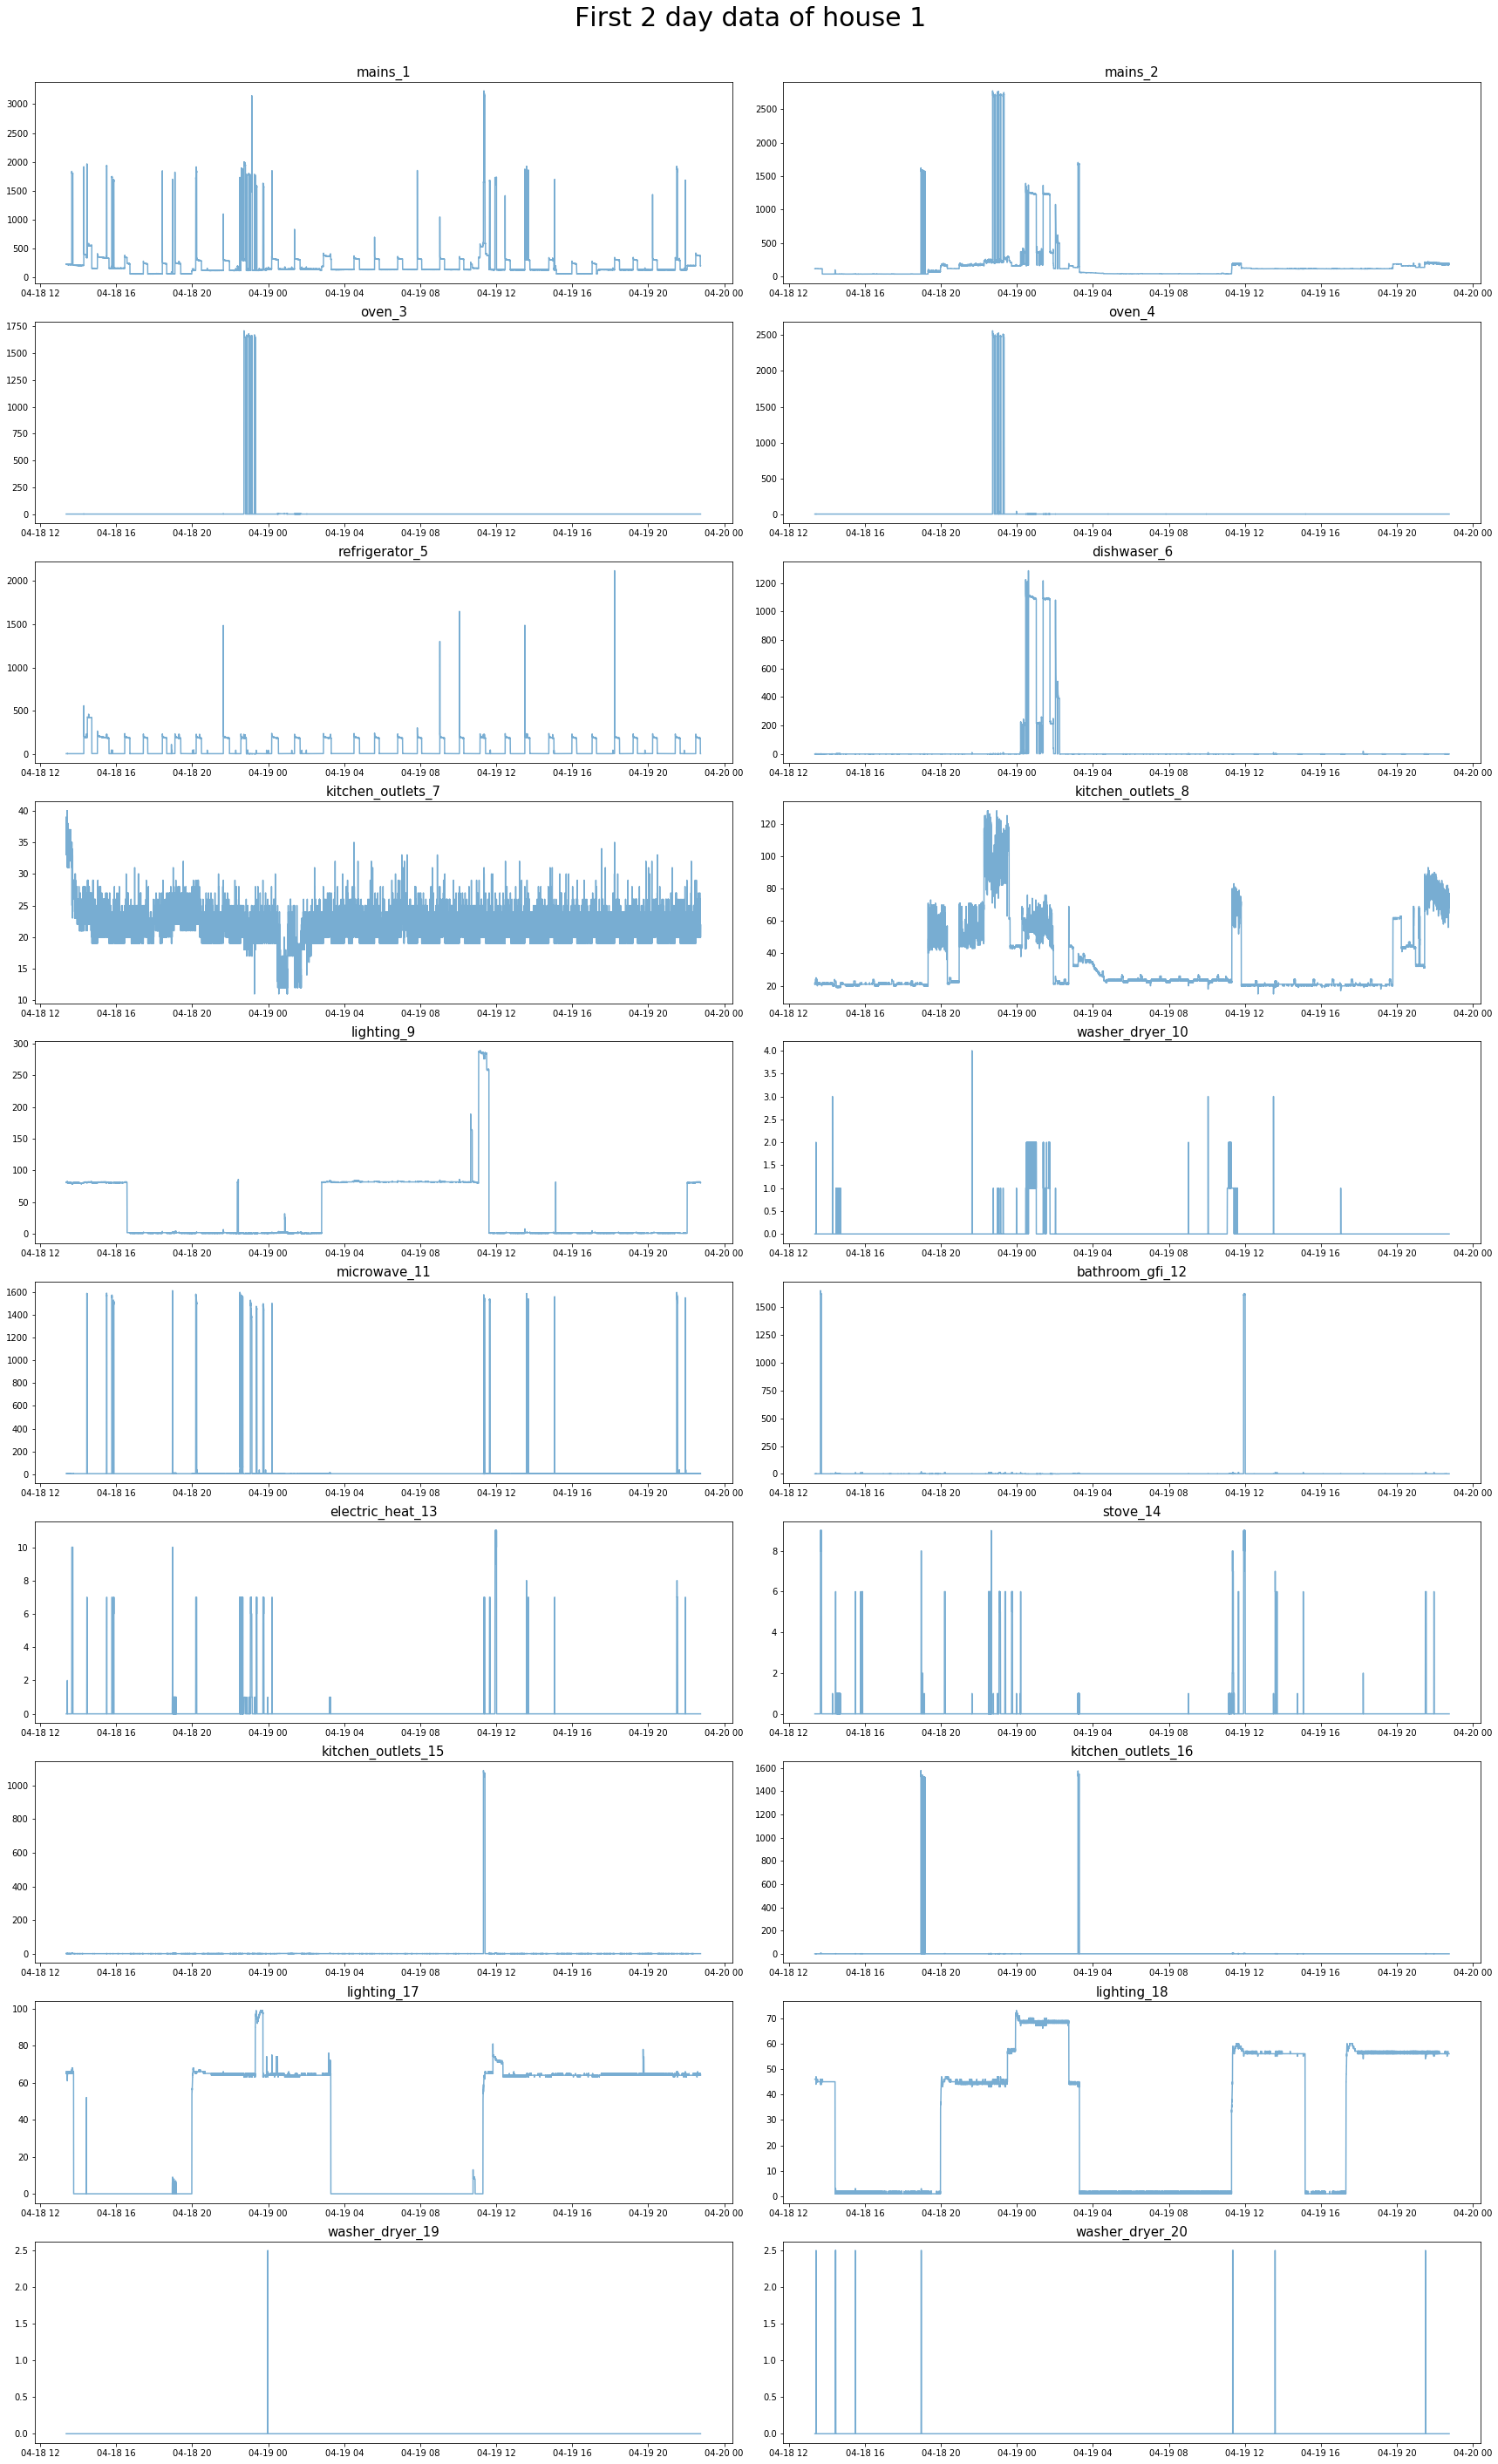

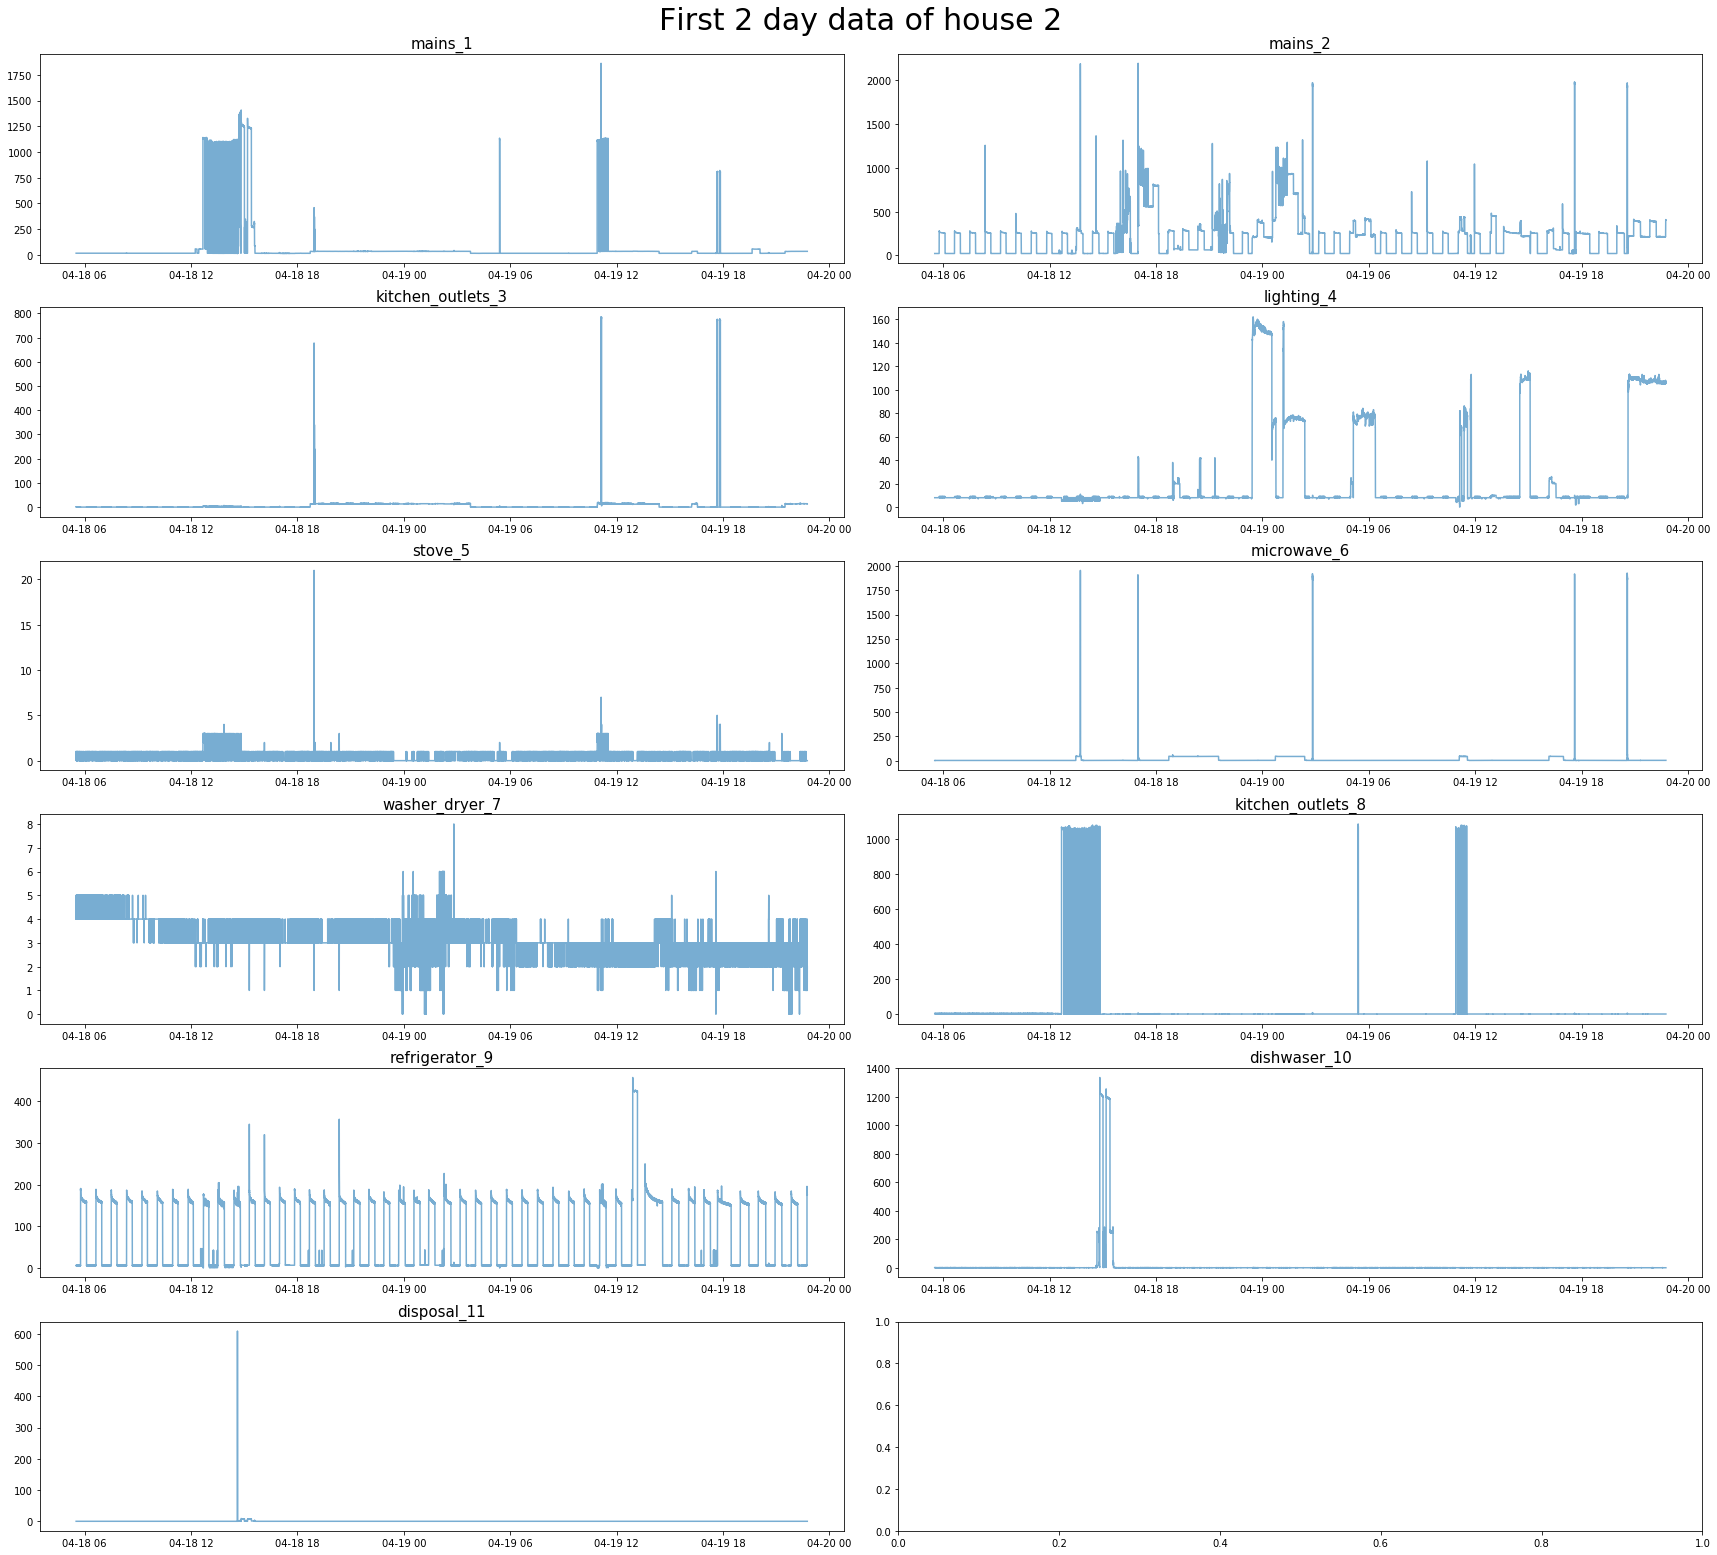

In [7]:
# Plot 2 first day data of house 1 and 2
def plot_df(df, title):
    apps = df.columns.values
    num_apps = len(apps) 
    fig, axes = plt.subplots((num_apps+1)//2,2, figsize=(24, num_apps*2) )
    for i, key in enumerate(apps):
        axes.flat[i].plot(df[key], alpha = 0.6)
        axes.flat[i].set_title(key, fontsize = '15')
    plt.suptitle(title, fontsize = '30')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

for i in range(1,3):
    plot_df(df[i].ix[:dates[i][1]], 'First 2 day data of house {}'.format(i))

Text(0.5, 1.0, 'House 2')

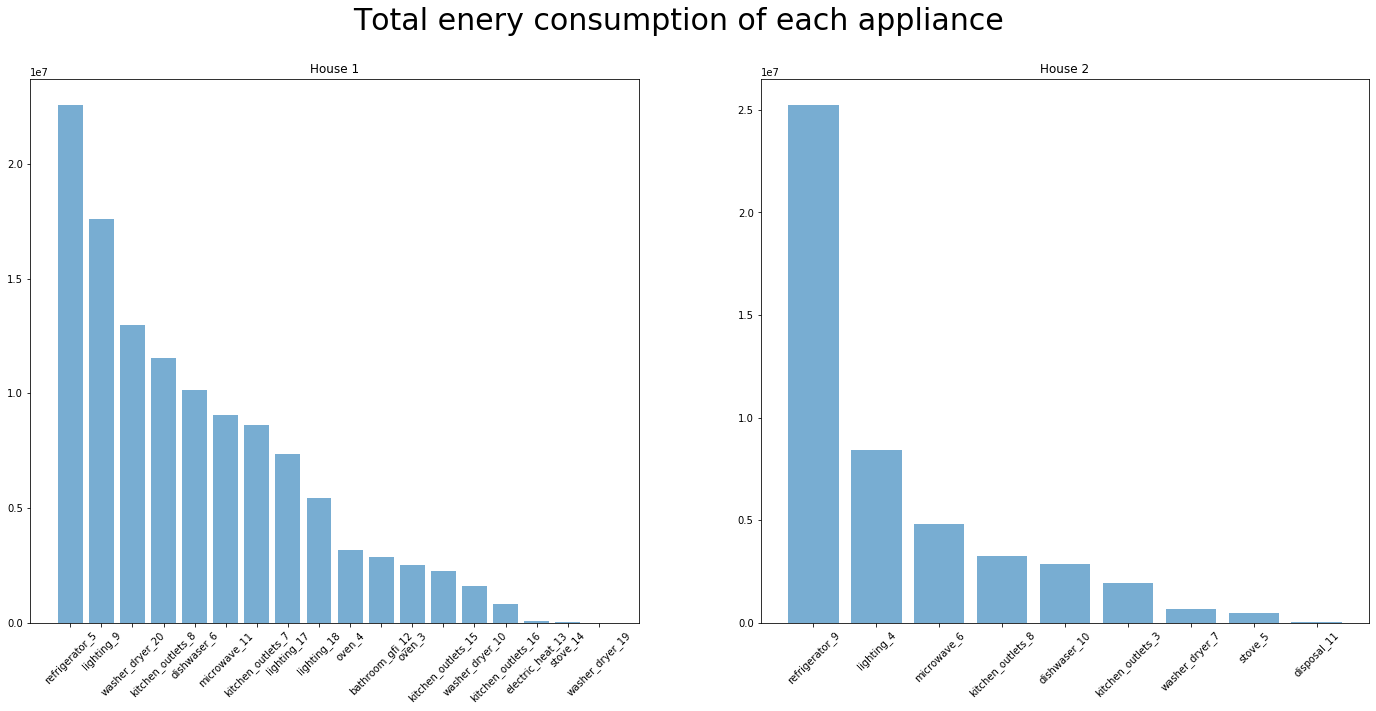

In [8]:
# Plot total energy sonsumption of each appliance from two houses
fig, axes = plt.subplots(1,2,figsize=(24, 10))
plt.suptitle('Total enery consumption of each appliance', fontsize = 30)
cons1 = df[1][df[1].columns.values[2:]].sum().sort_values(ascending=False)
app1 = cons1.index
y_pos1 = np.arange(len(app1))
axes[0].bar(y_pos1, cons1.values,  alpha=0.6) 
plt.sca(axes[0])
plt.xticks(y_pos1, app1, rotation = 45)
plt.title('House 1')

cons2 = df[2][df[2].columns.values[2:]].sum().sort_values(ascending=False)
app2 = cons2.index
y_pos2 = np.arange(len(app2))
axes[1].bar(y_pos2, cons2.values, alpha=0.6)
plt.sca(axes[1])
plt.xticks(y_pos2, app2, rotation = 45)
plt.title('House 2')

In [9]:
# Separate house 1 data into train, validation and test data
df1_train = df[1].ix[:dates[1][10]]
df1_val = df[1].ix[dates[1][11]:dates[1][16]]
df1_test = df[1].ix[dates[1][17]:]
print('df_train.shape: ', df1_train.shape)
print('df_val.shape: ', df1_val.shape)
print('df_test.shape: ', df1_test.shape)

df_train.shape:  (214816, 20)
df_val.shape:  (104875, 20)
df_test.shape:  (87057, 20)


In [10]:
# Using mains_1, mains_2 to predict refrigerator
X_train1 = df1_train[['mains_1','mains_2']].values
y_train1 = df1_train['refrigerator_5'].values
X_val1 = df1_val[['mains_1','mains_2']].values
y_val1 = df1_val['refrigerator_5'].values
X_test1 = df1_test[['mains_1','mains_2']].values
y_test1 = df1_test['refrigerator_5'].values
print(X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape)

(214816, 2) (214816,) (104875, 2) (104875,) (87057, 2) (87057,)


Firstly we are using the DecisionTreeRegression algorithm using the SKlearn library. The Decision tree regressor is good at predicting continuous values

Since we are predicting the power usage for each appliance for a continous period of time the decision tree can play an important role in understanding what can be the next values based on the decisions it makes using the tree structure.

In [12]:
# Using decision tree regression, here we use validation data to turn the min_samples_split parameter
def mse_loss(y_predict, y):
    return np.mean(np.square(y_predict - y)) 
def mae_loss(y_predict, y):
    return np.mean(np.abs(y_predict - y)) 

min_samples_split=np.arange(2, 400, 10)
from sklearn.tree import DecisionTreeRegressor
def tree_reg(X_train, y_train, X_val, y_val, min_samples_split):
    clfs = []
    losses = []
    start = time.time()
    for split in min_samples_split:
        clf = DecisionTreeRegressor(min_samples_split = split)
        clf.fit(X_train, y_train)
        y_predict_val = clf.predict(X_val)
        clfs.append(clf)
        losses.append( mse_loss(y_predict_val, y_val) )
    print('Trainning time: ', time.time() - start)
    return clfs, losses
tree_clfs_1, tree_losses_1 = tree_reg(X_train1, y_train1, X_val1, y_val1, min_samples_split)


Trainning time:  22.011096954345703


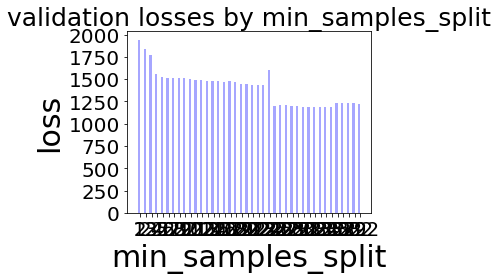

In [13]:
def plot_losses(losses, min_samples_split):
    index = np.arange(len(min_samples_split))
    bar_width = 0.4
    opacity = 0.35

    plt.bar(index, losses, bar_width, alpha=opacity, color='b')
    plt.xlabel('min_samples_split', fontsize=30)
    plt.ylabel('loss', fontsize=30)
    plt.title('validation losses by min_samples_split', fontsize = '25')
    plt.xticks(index + bar_width/2, min_samples_split, fontsize=20 )
    plt.yticks(fontsize=20 )
    plt.rcParams["figure.figsize"] = [24,15]
    plt.tight_layout()

plot_losses(tree_losses_1, min_samples_split)

In [14]:
# Choose the best model and predict refrigerator consumption on the test set
ind = np.argmin(tree_losses_1)
tree_clf_1 = tree_clfs_1[ind]
y_test_predict_1 = tree_clf_1.predict(X_test1)
mse_tree_1 = mse_loss(y_test_predict_1, y_test1)
mae_tree_1 = mae_loss(y_test_predict_1, y_test1)
print('Mean square error on test set: ', mse_tree_1)
print('Mean absolute error on the test set: ', mae_tree_1)

Mean square error on test set:  1634.5797666188705
Mean absolute error on the test set:  12.686127417077758


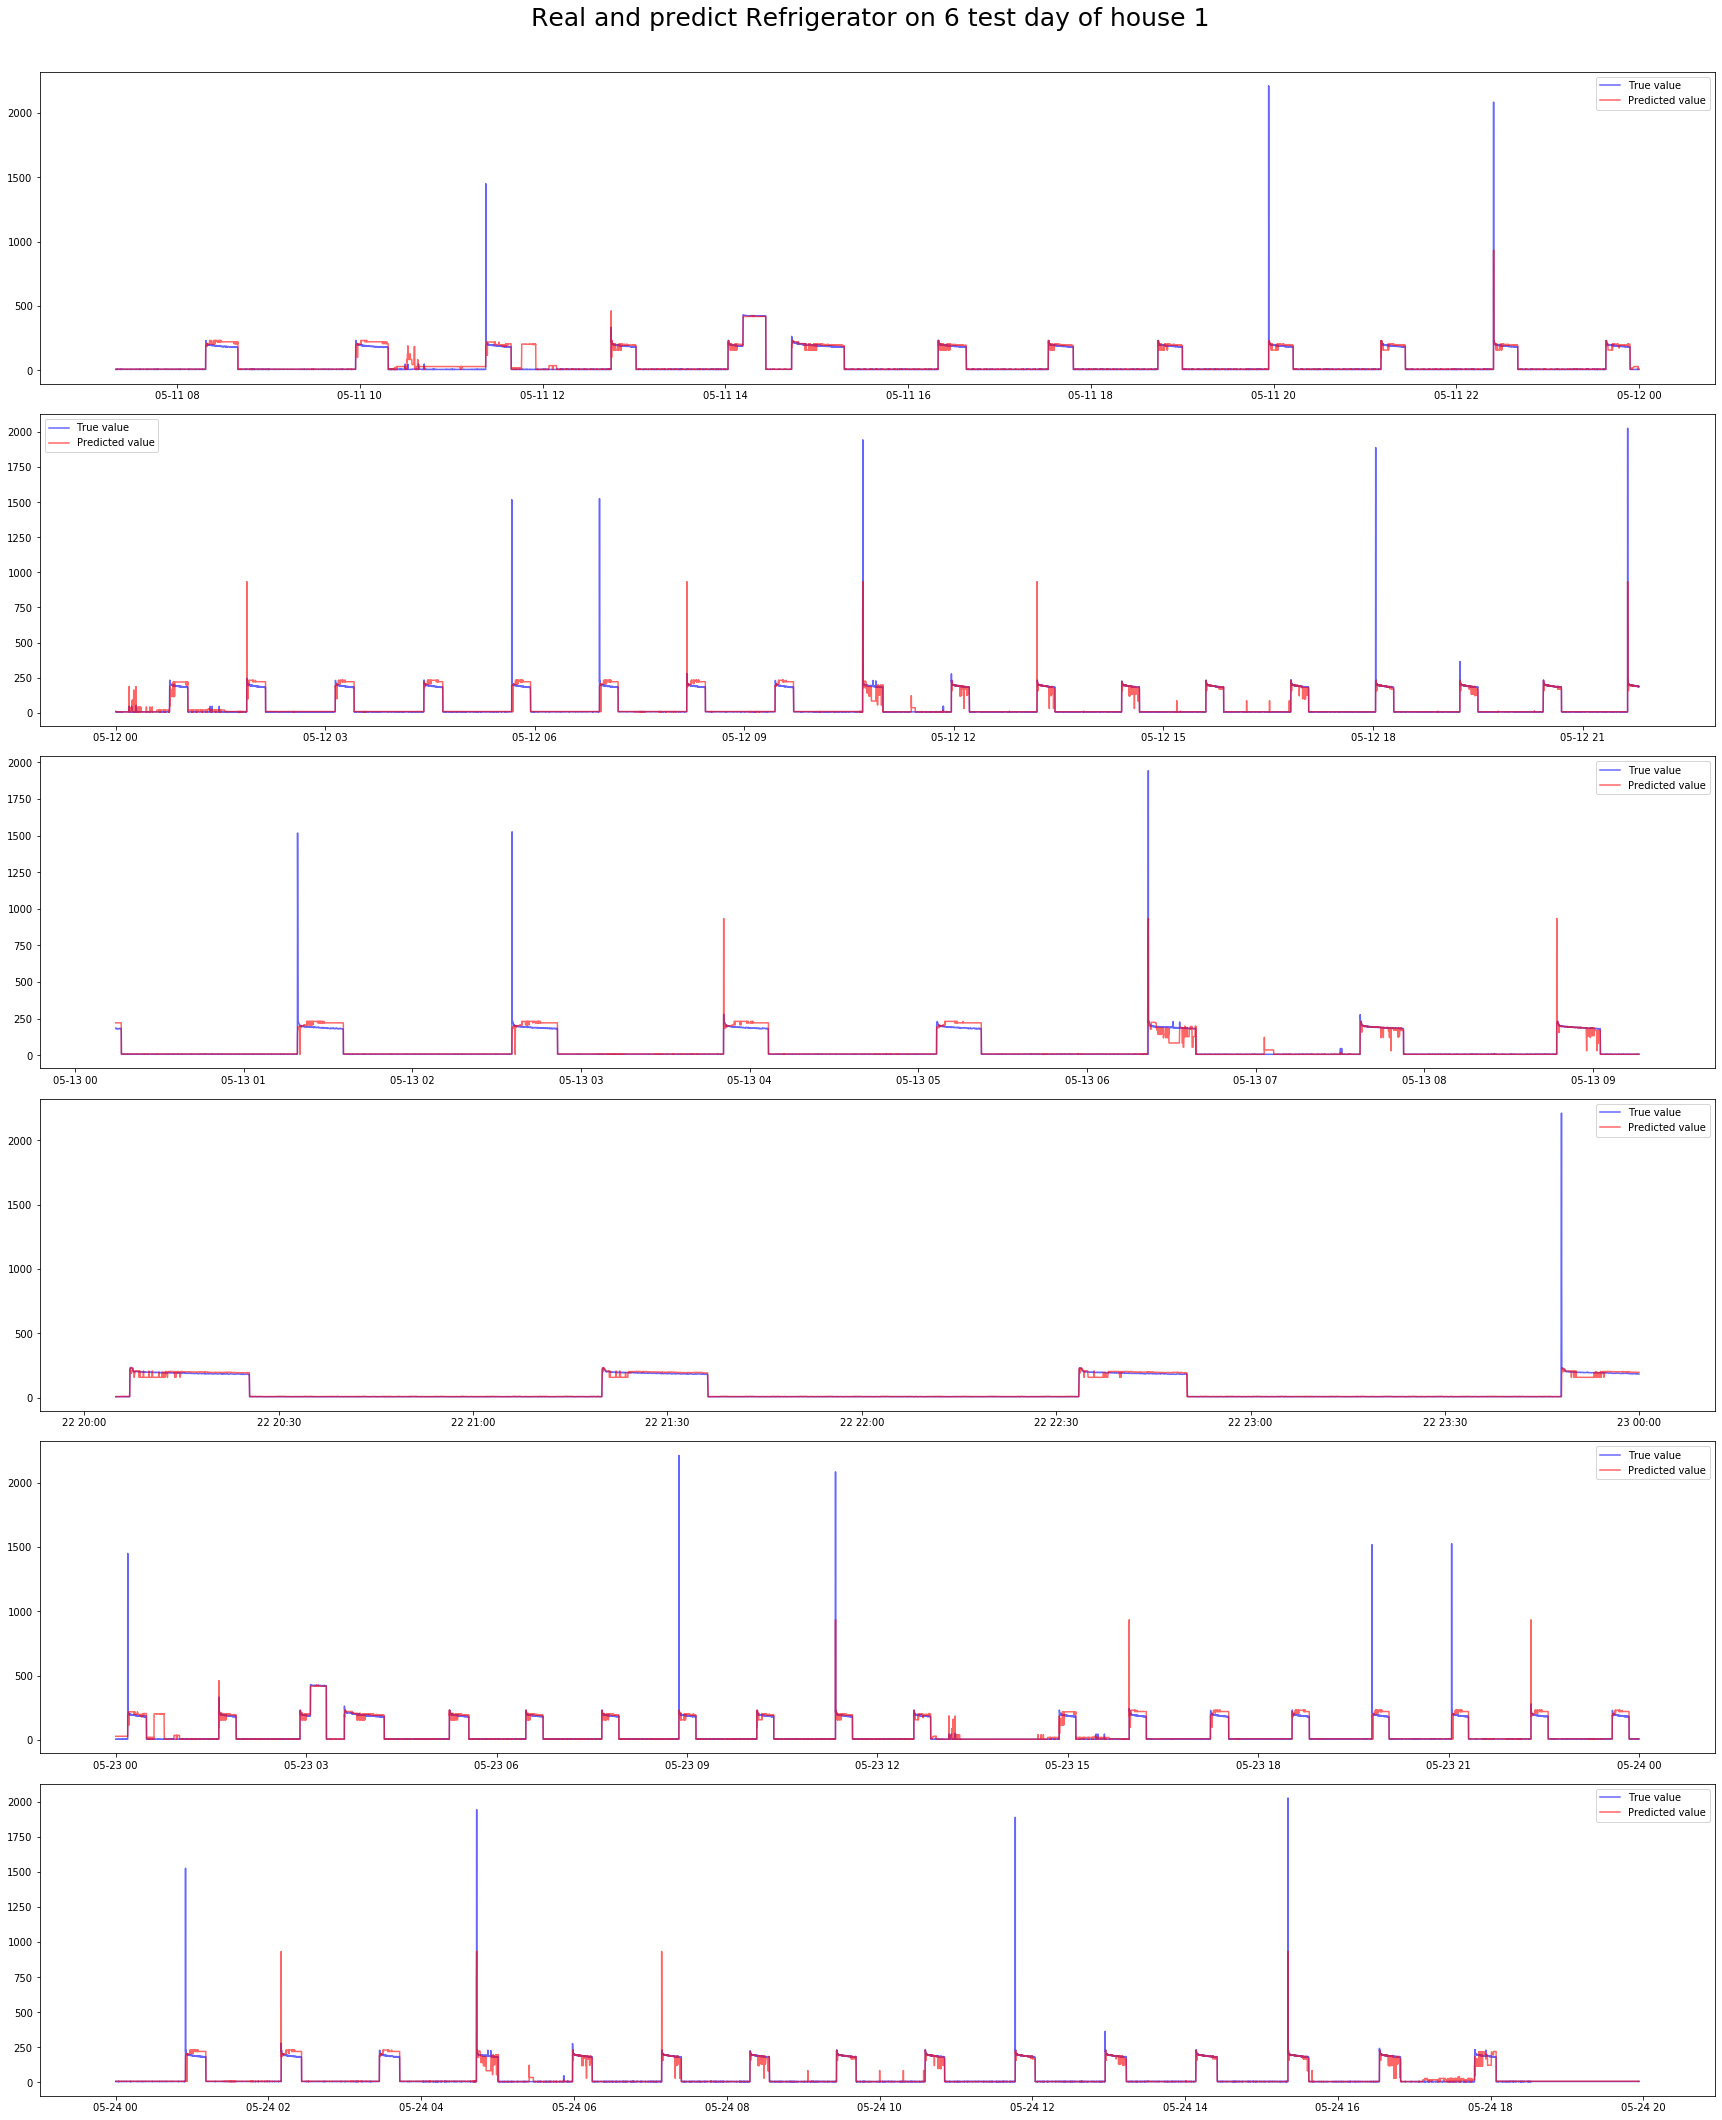

In [15]:
# Plotting the real and predicted refrigerator consumption on six days of test data
def plot_each_app(df, dates, predict, y_test, title, look_back = 0):
    num_date = len(dates)
    fig, axes = plt.subplots(num_date,1,figsize=(24, num_date*5) )
    plt.suptitle(title, fontsize = '25')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for i in range(num_date):
        if i == 0: l = 0
        ind = df.ix[dates[i]].index[look_back:]
        axes.flat[i].plot(ind, y_test[l:l+len(ind)], color = 'blue', alpha = 0.6, label = 'True value')
        axes.flat[i].plot(ind, predict[l:l+len(ind)], color = 'red', alpha = 0.6, label = 'Predicted value')
        axes.flat[i].legend()
        l = len(ind)


plot_each_app(df1_test, dates[1][17:], y_test_predict_1, y_test1, 'Real and predict Refrigerator on 6 test day of house 1')


In [16]:
X_2 = df[2][['mains_2','mains_1']].values
y_2 = df[2]['refrigerator_9'].values
print(X_2.shape, y_2.shape)

(316840, 2) (316840,)


In [17]:
y_predict_2 = tree_clf_1.predict(X_2)
mse_tree_2 = mse_loss(y_predict_2, y_2)
mae_tree_2 = mae_loss(y_predict_2, y_2)
print('Mean square error on test set: ', mse_tree_2)
print('Mean absolute error on the test set: ', mae_tree_2)

Mean square error on test set:  32245.25362228206
Mean absolute error on the test set:  64.75419454670589


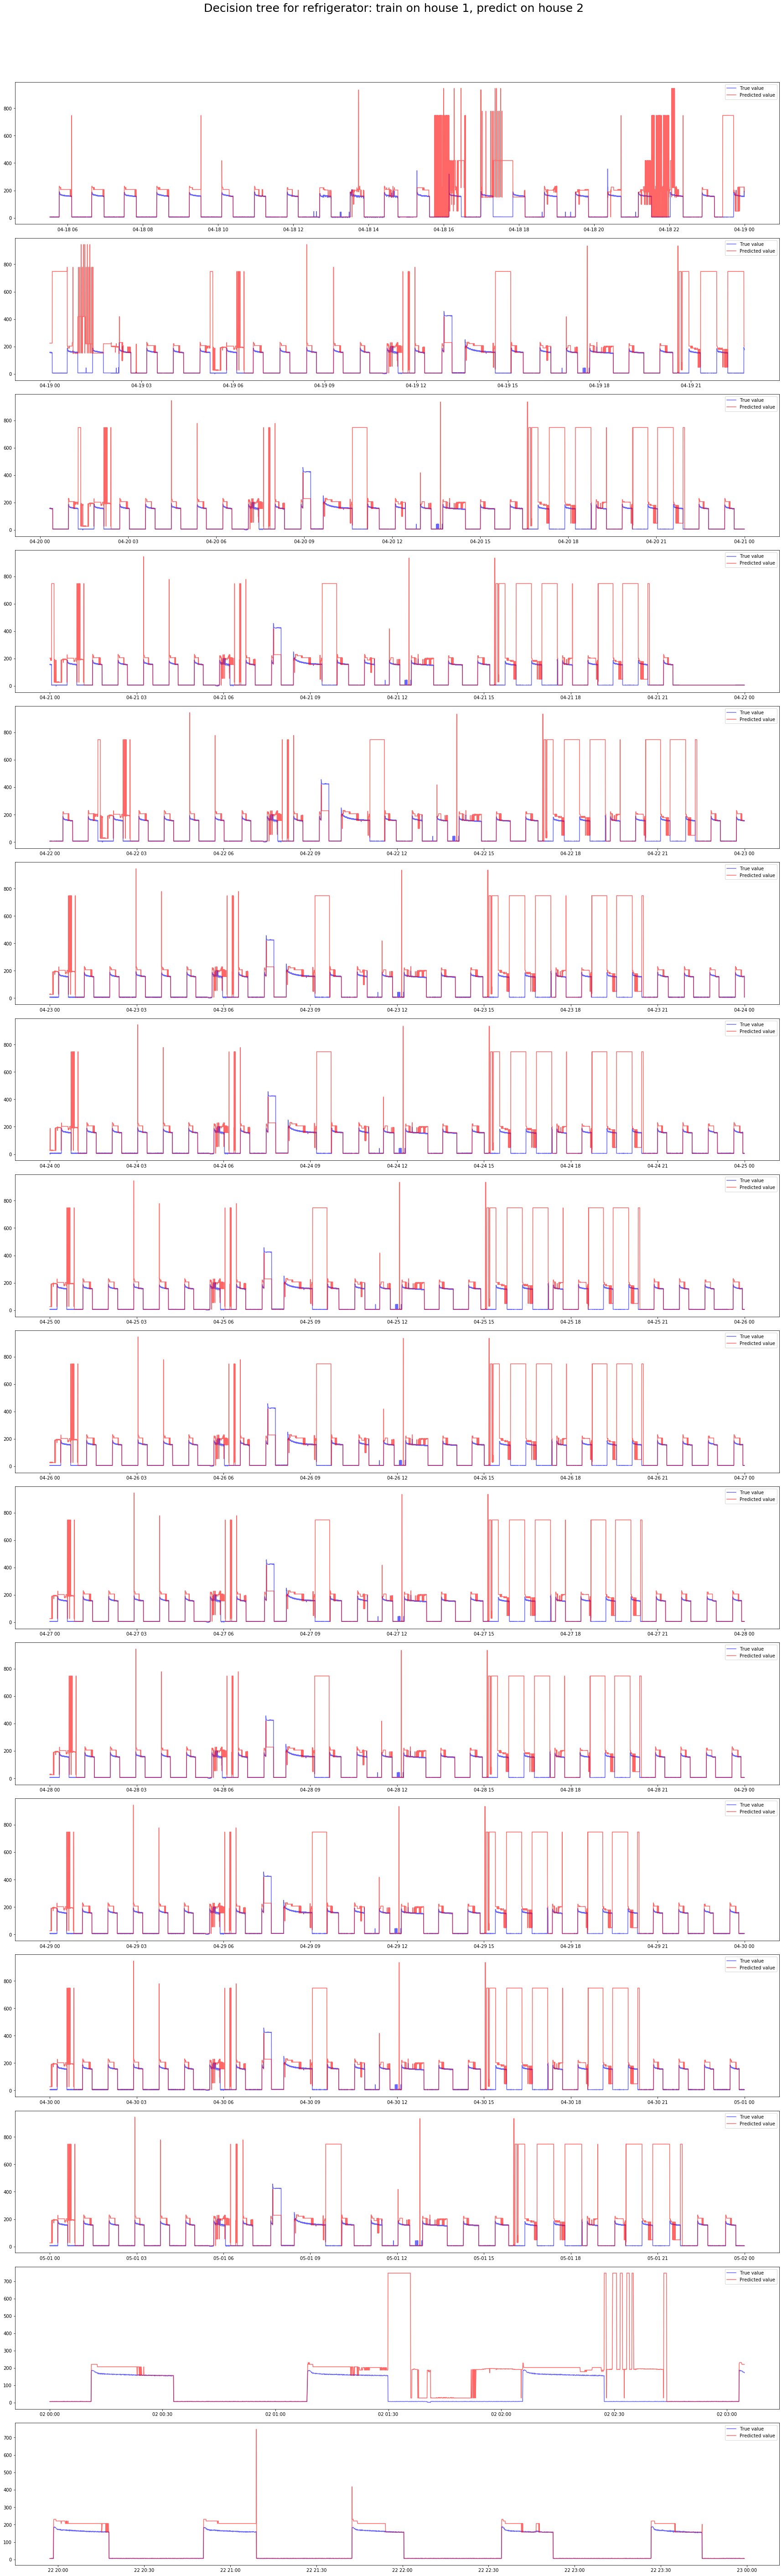

In [18]:
plot_each_app(df[2], dates[2], y_predict_2, y_2, 'Decision tree for refrigerator: train on house 1, predict on house 2')

In [19]:
# List of other appliances in house 1:
appliances = list(df[1].columns.values[2:])
appliances.pop(2)
print(appliances)

['oven_3', 'oven_4', 'dishwaser_6', 'kitchen_outlets_7', 'kitchen_outlets_8', 'lighting_9', 'washer_dryer_10', 'microwave_11', 'bathroom_gfi_12', 'electric_heat_13', 'stove_14', 'kitchen_outlets_15', 'kitchen_outlets_16', 'lighting_17', 'lighting_18', 'washer_dryer_19', 'washer_dryer_20']


In [20]:
# using decision tree model on other appliances
def tree_reg_mult_apps():
    start = time.time()
    min_samples_split=np.arange(2, 400, 10)
    pred = {}
    for app in appliances:
        list_clfs = []
        losses = []
        y_train = df1_train[app].values
        y_val = df1_val[app].values
        for split in min_samples_split:
            clf = DecisionTreeRegressor(min_samples_split = split)
            clf.fit(X_train1, y_train)
            y_predict_val = clf.predict(X_val1)
            list_clfs.append(clf)
            losses.append( mse_loss(y_predict_val, y_val) )
        ind = np.argmin(losses)
        pred[app] = list_clfs[ind].predict(X_test1)
    print('Trainning time: ', time.time() - start)
    return pred

mul_pred = tree_reg_mult_apps()

Trainning time:  254.61407494544983


In [21]:
def error_mul_app(mul_pred):
    mse_losses = {}
    mae_losses = {}
    for app in appliances:
        mse_losses[app] = mse_loss(mul_pred[app], df1_test[app].values)
        mae_losses[app] = mae_loss(mul_pred[app], df1_test[app].values)
    return mse_losses, mae_losses

mul_mse_tree, mul_mae_tree = error_mul_app(mul_pred)

In [22]:
for app in appliances:
    m = np.mean(df1_test[app].values)
    print('mean of {0}: {1:.2f} - mse: {2:.2f} - mae: {3:.2f}'.format(app, m ,mul_mse_tree[app], mul_mae_tree[app]))

mean of oven_3: 15.63 - mse: 18554.81 - mae: 11.28
mean of oven_4: 17.11 - mse: 7454.75 - mae: 4.92
mean of dishwaser_6: 25.35 - mse: 831.49 - mae: 3.38
mean of kitchen_outlets_7: 21.25 - mse: 4.54 - mae: 1.59
mean of kitchen_outlets_8: 27.71 - mse: 99.51 - mae: 3.43
mean of lighting_9: 28.29 - mse: 1574.76 - mae: 24.09
mean of washer_dryer_10: 3.07 - mse: 934.44 - mae: 2.44
mean of microwave_11: 18.92 - mse: 12442.92 - mae: 13.00
mean of bathroom_gfi_12: 6.73 - mse: 3471.07 - mae: 3.44
mean of electric_heat_13: 0.11 - mse: 0.53 - mae: 0.05
mean of stove_14: 0.10 - mse: 0.23 - mae: 0.04
mean of kitchen_outlets_15: 5.34 - mse: 832.75 - mae: 1.63
mean of kitchen_outlets_16: 1.93 - mse: 802.68 - mae: 0.64
mean of lighting_17: 18.97 - mse: 136.66 - mae: 3.18
mean of lighting_18: 15.68 - mse: 383.82 - mae: 13.12
mean of washer_dryer_19: 0.00 - mse: 0.00 - mae: 0.00
mean of washer_dryer_20: 27.54 - mse: 2087.58 - mae: 1.79


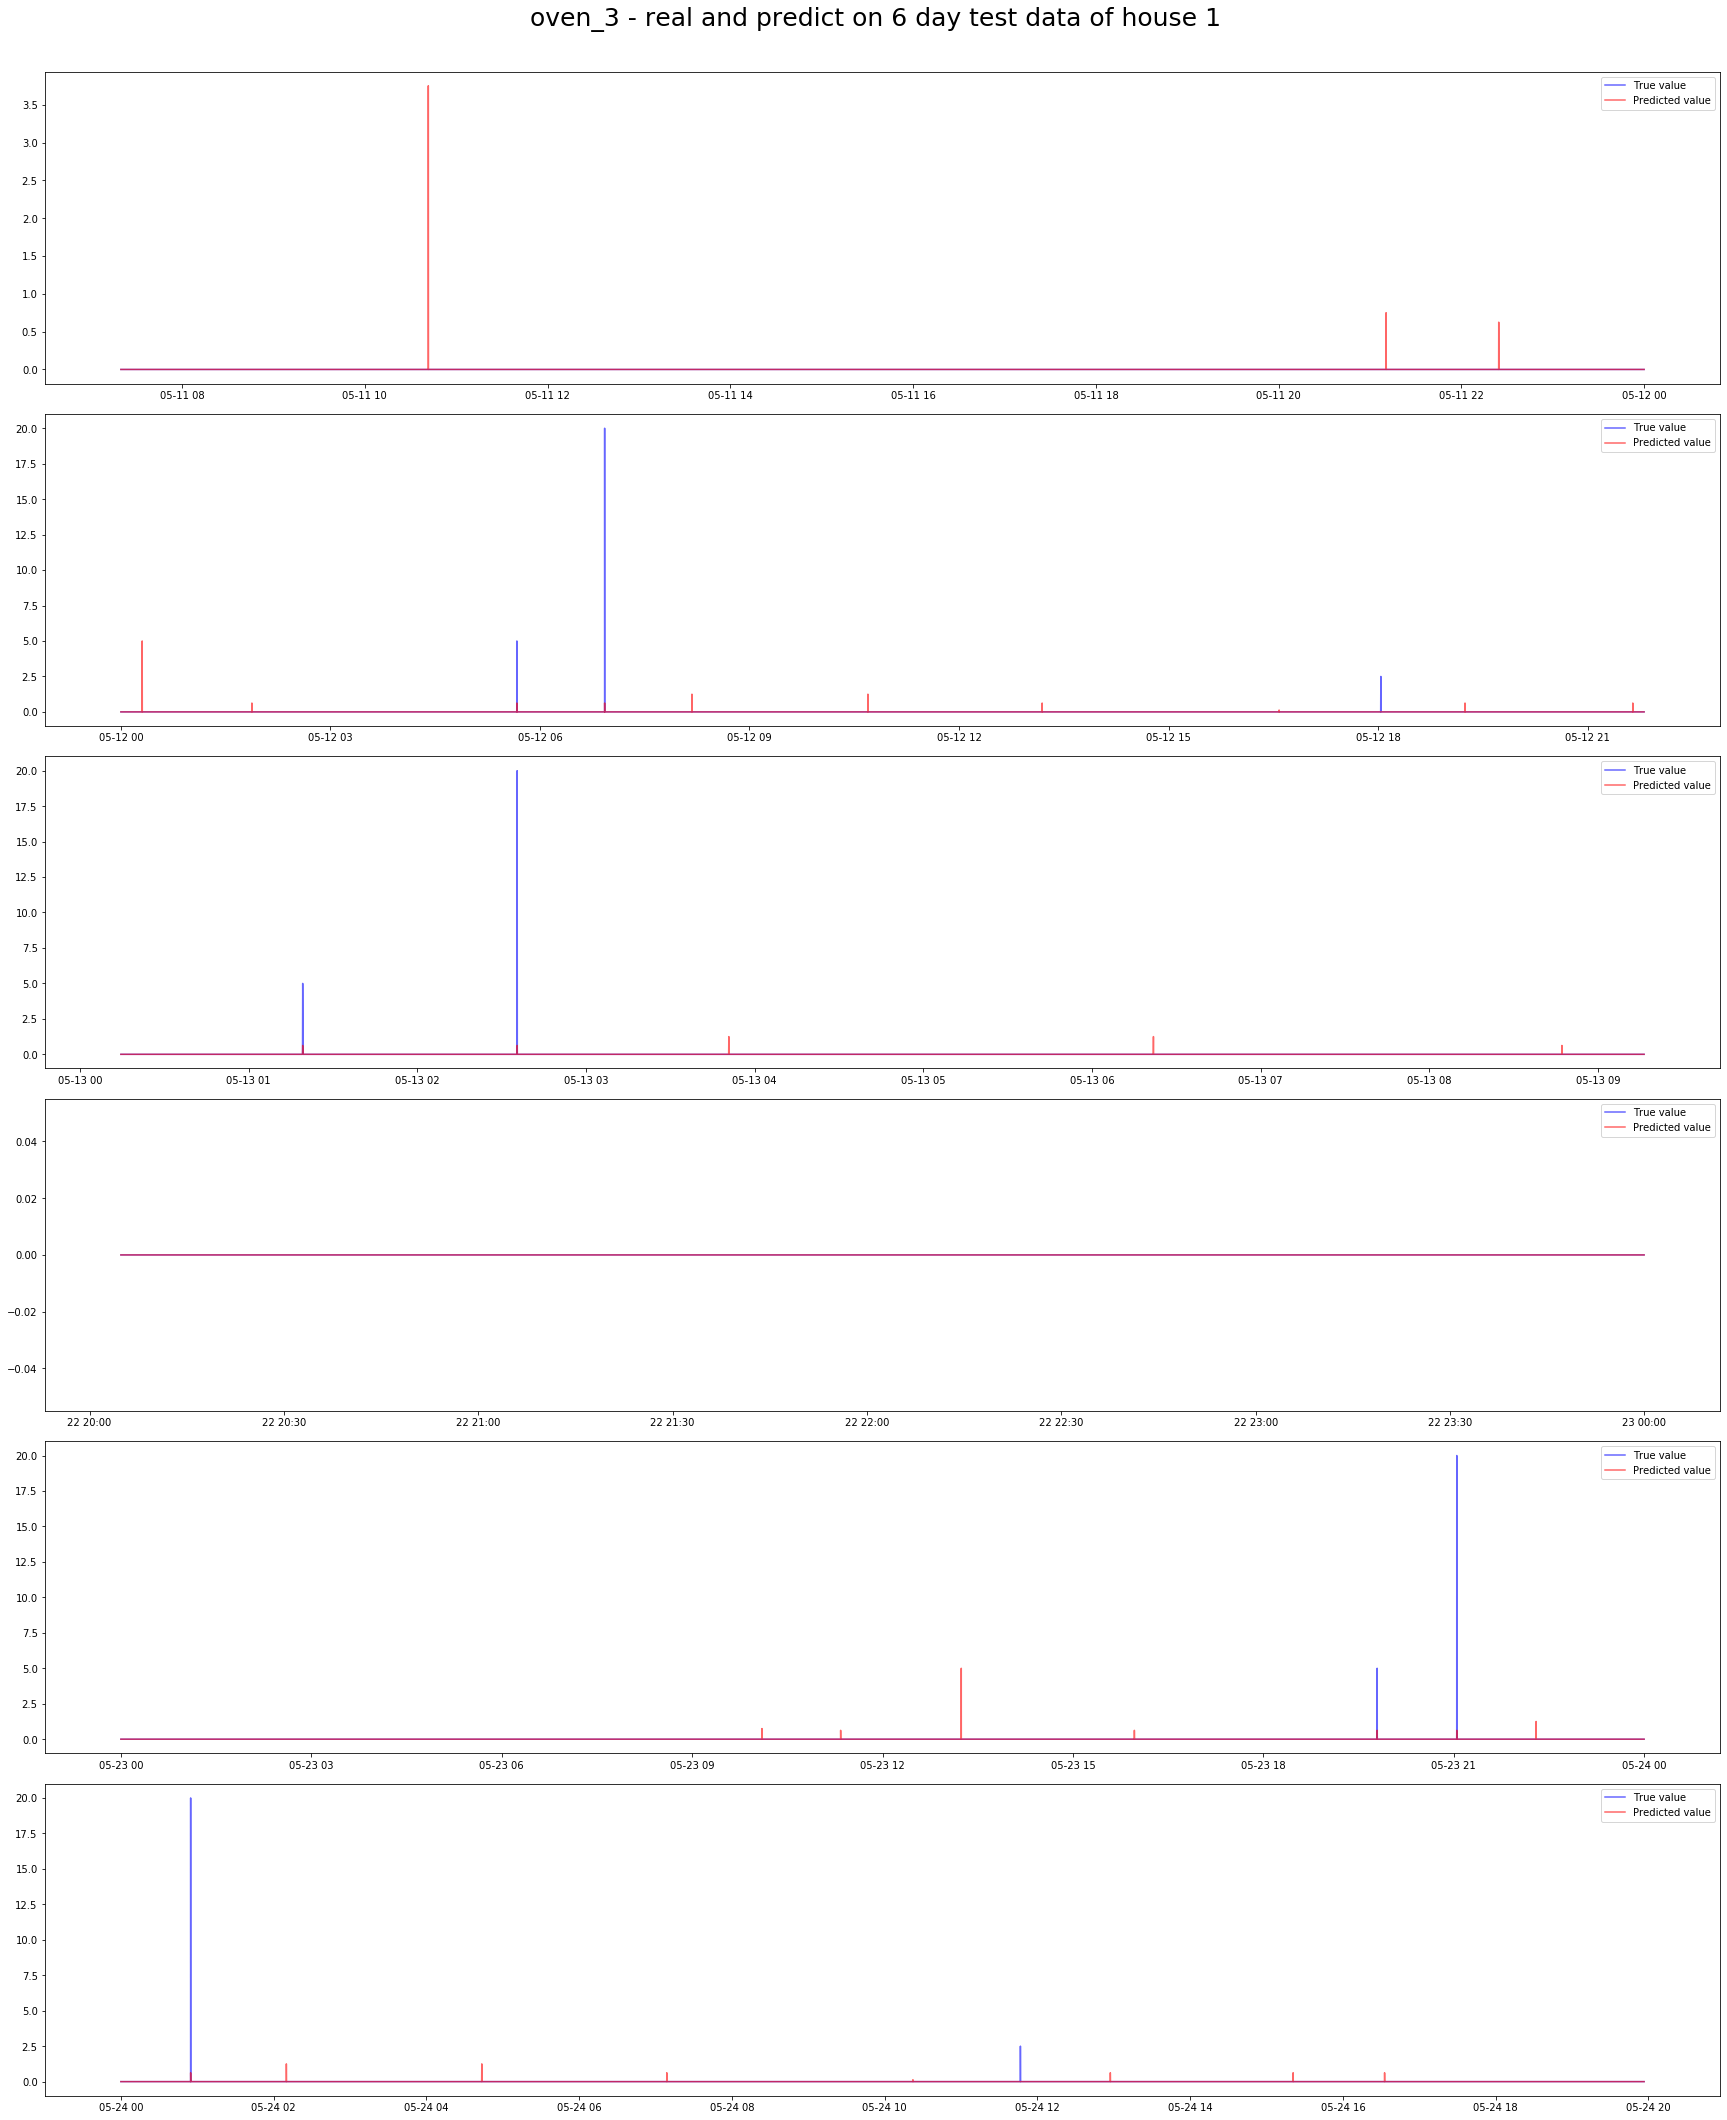

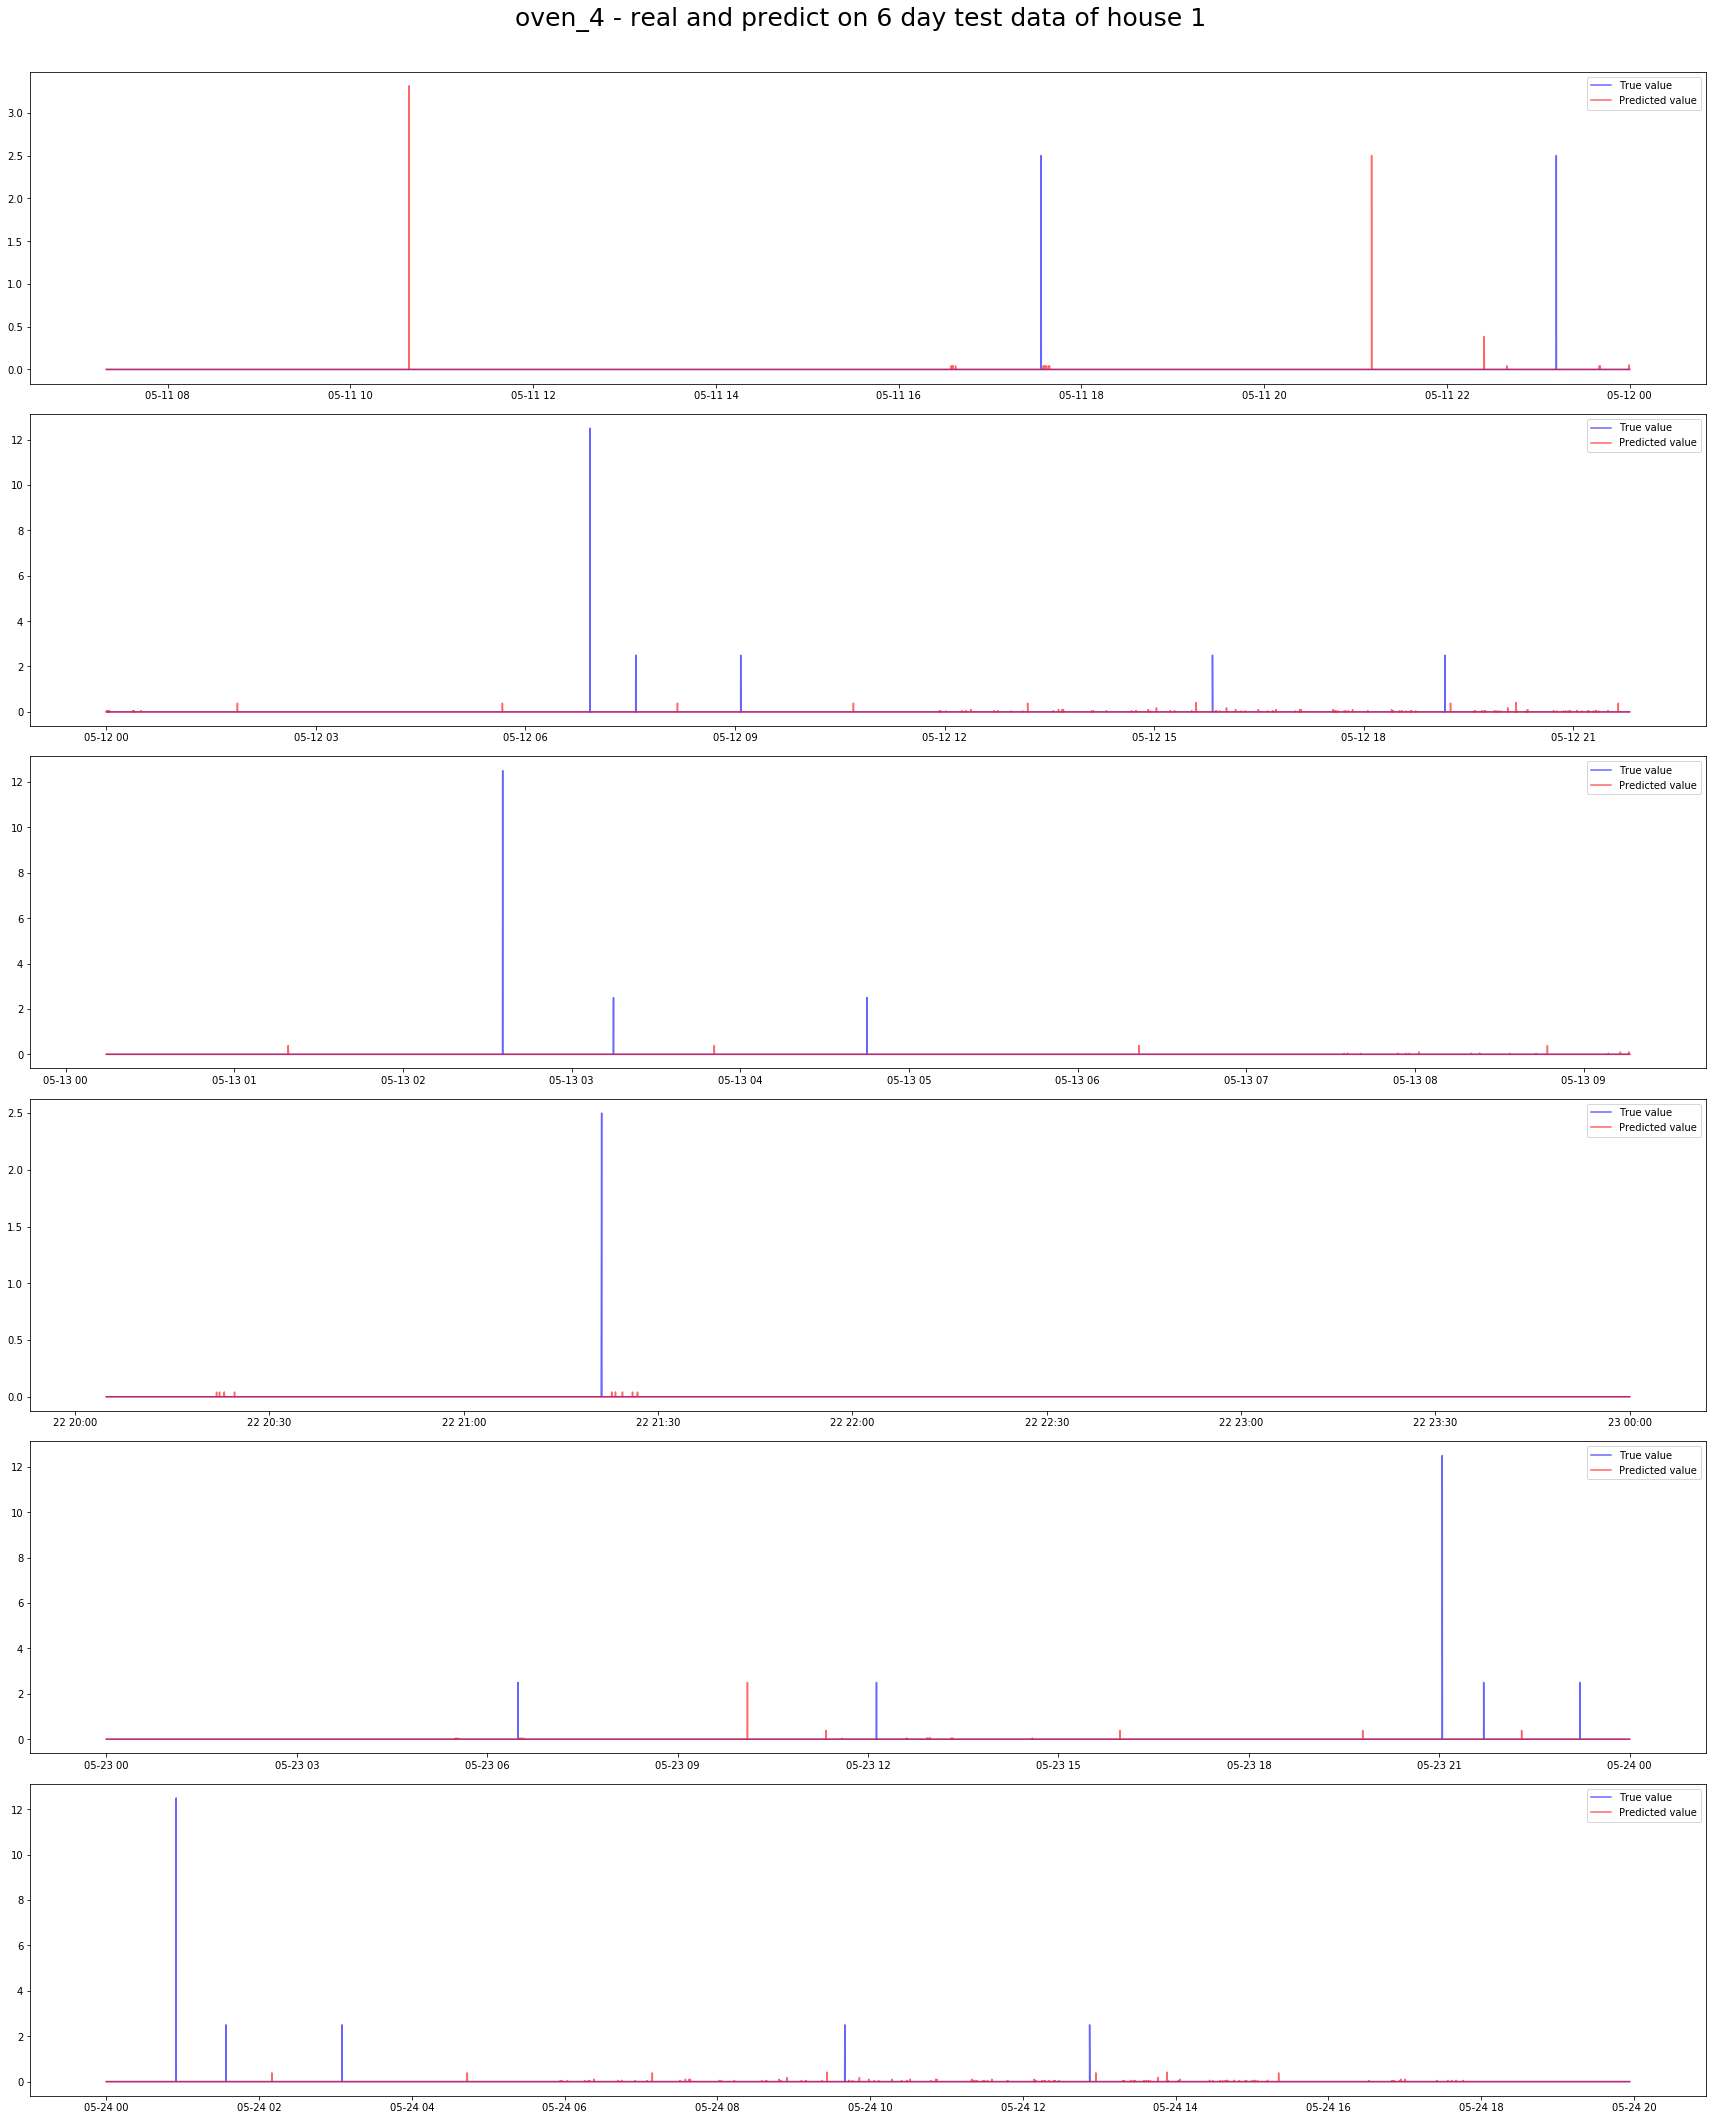

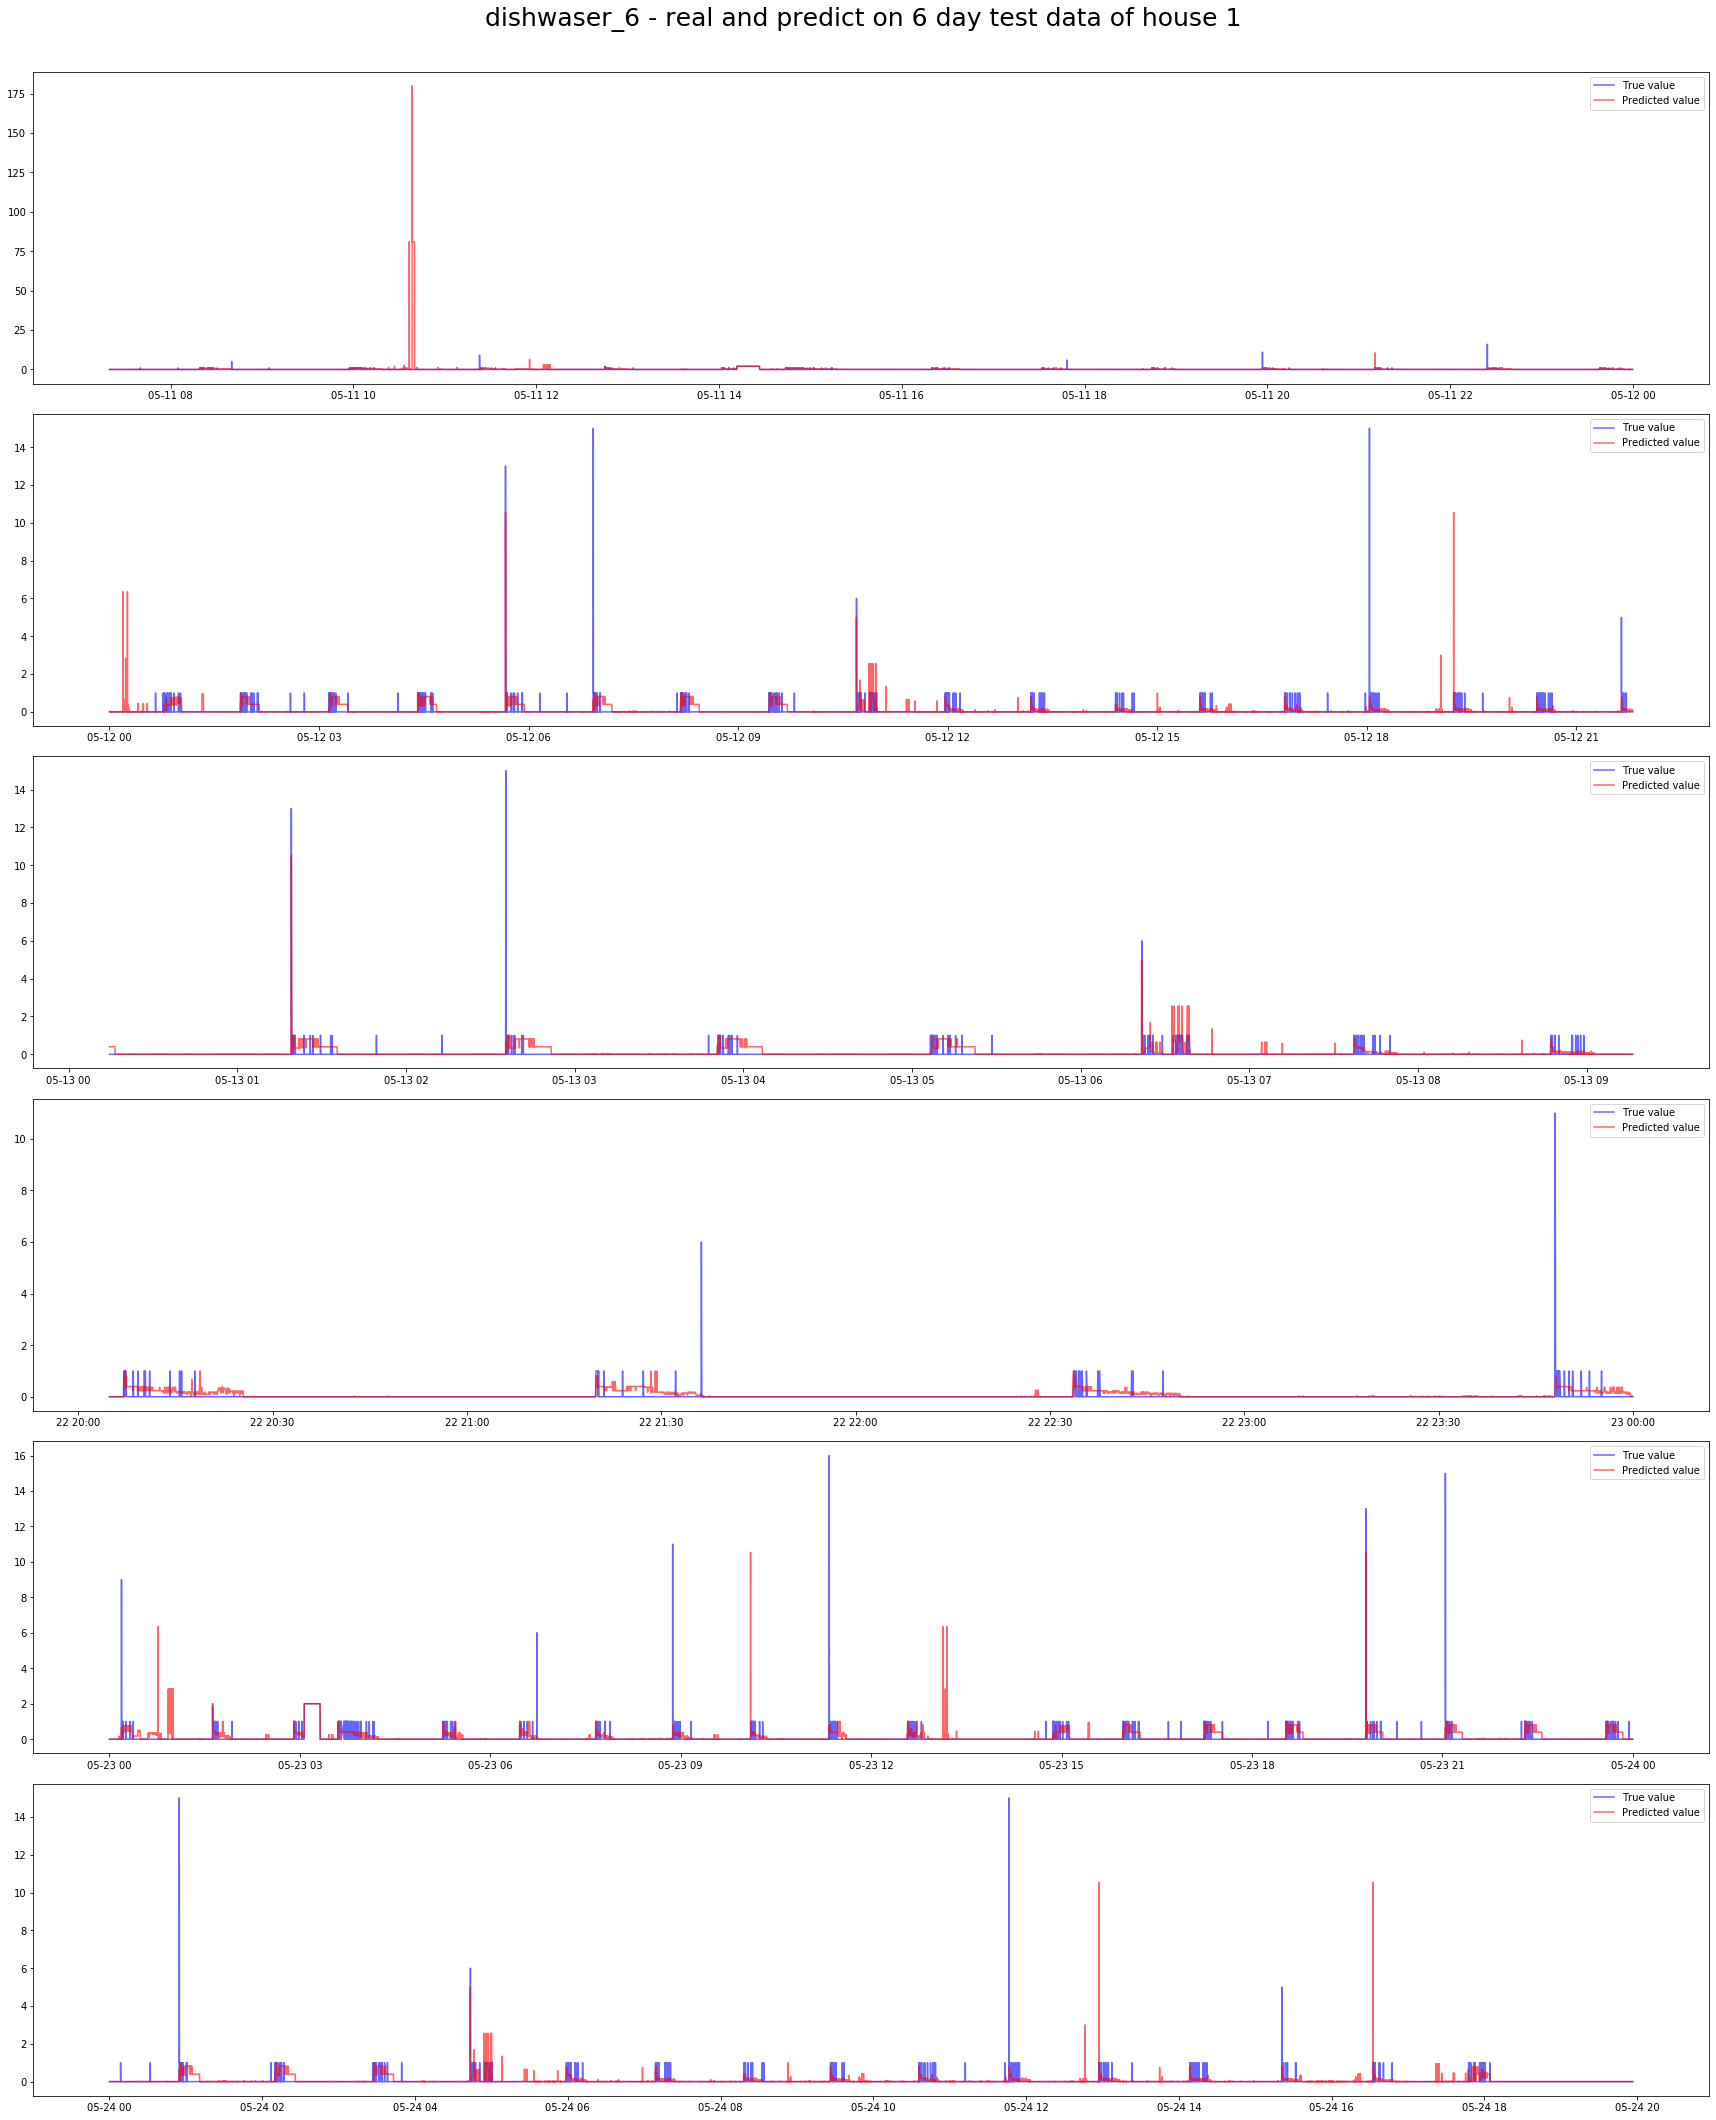

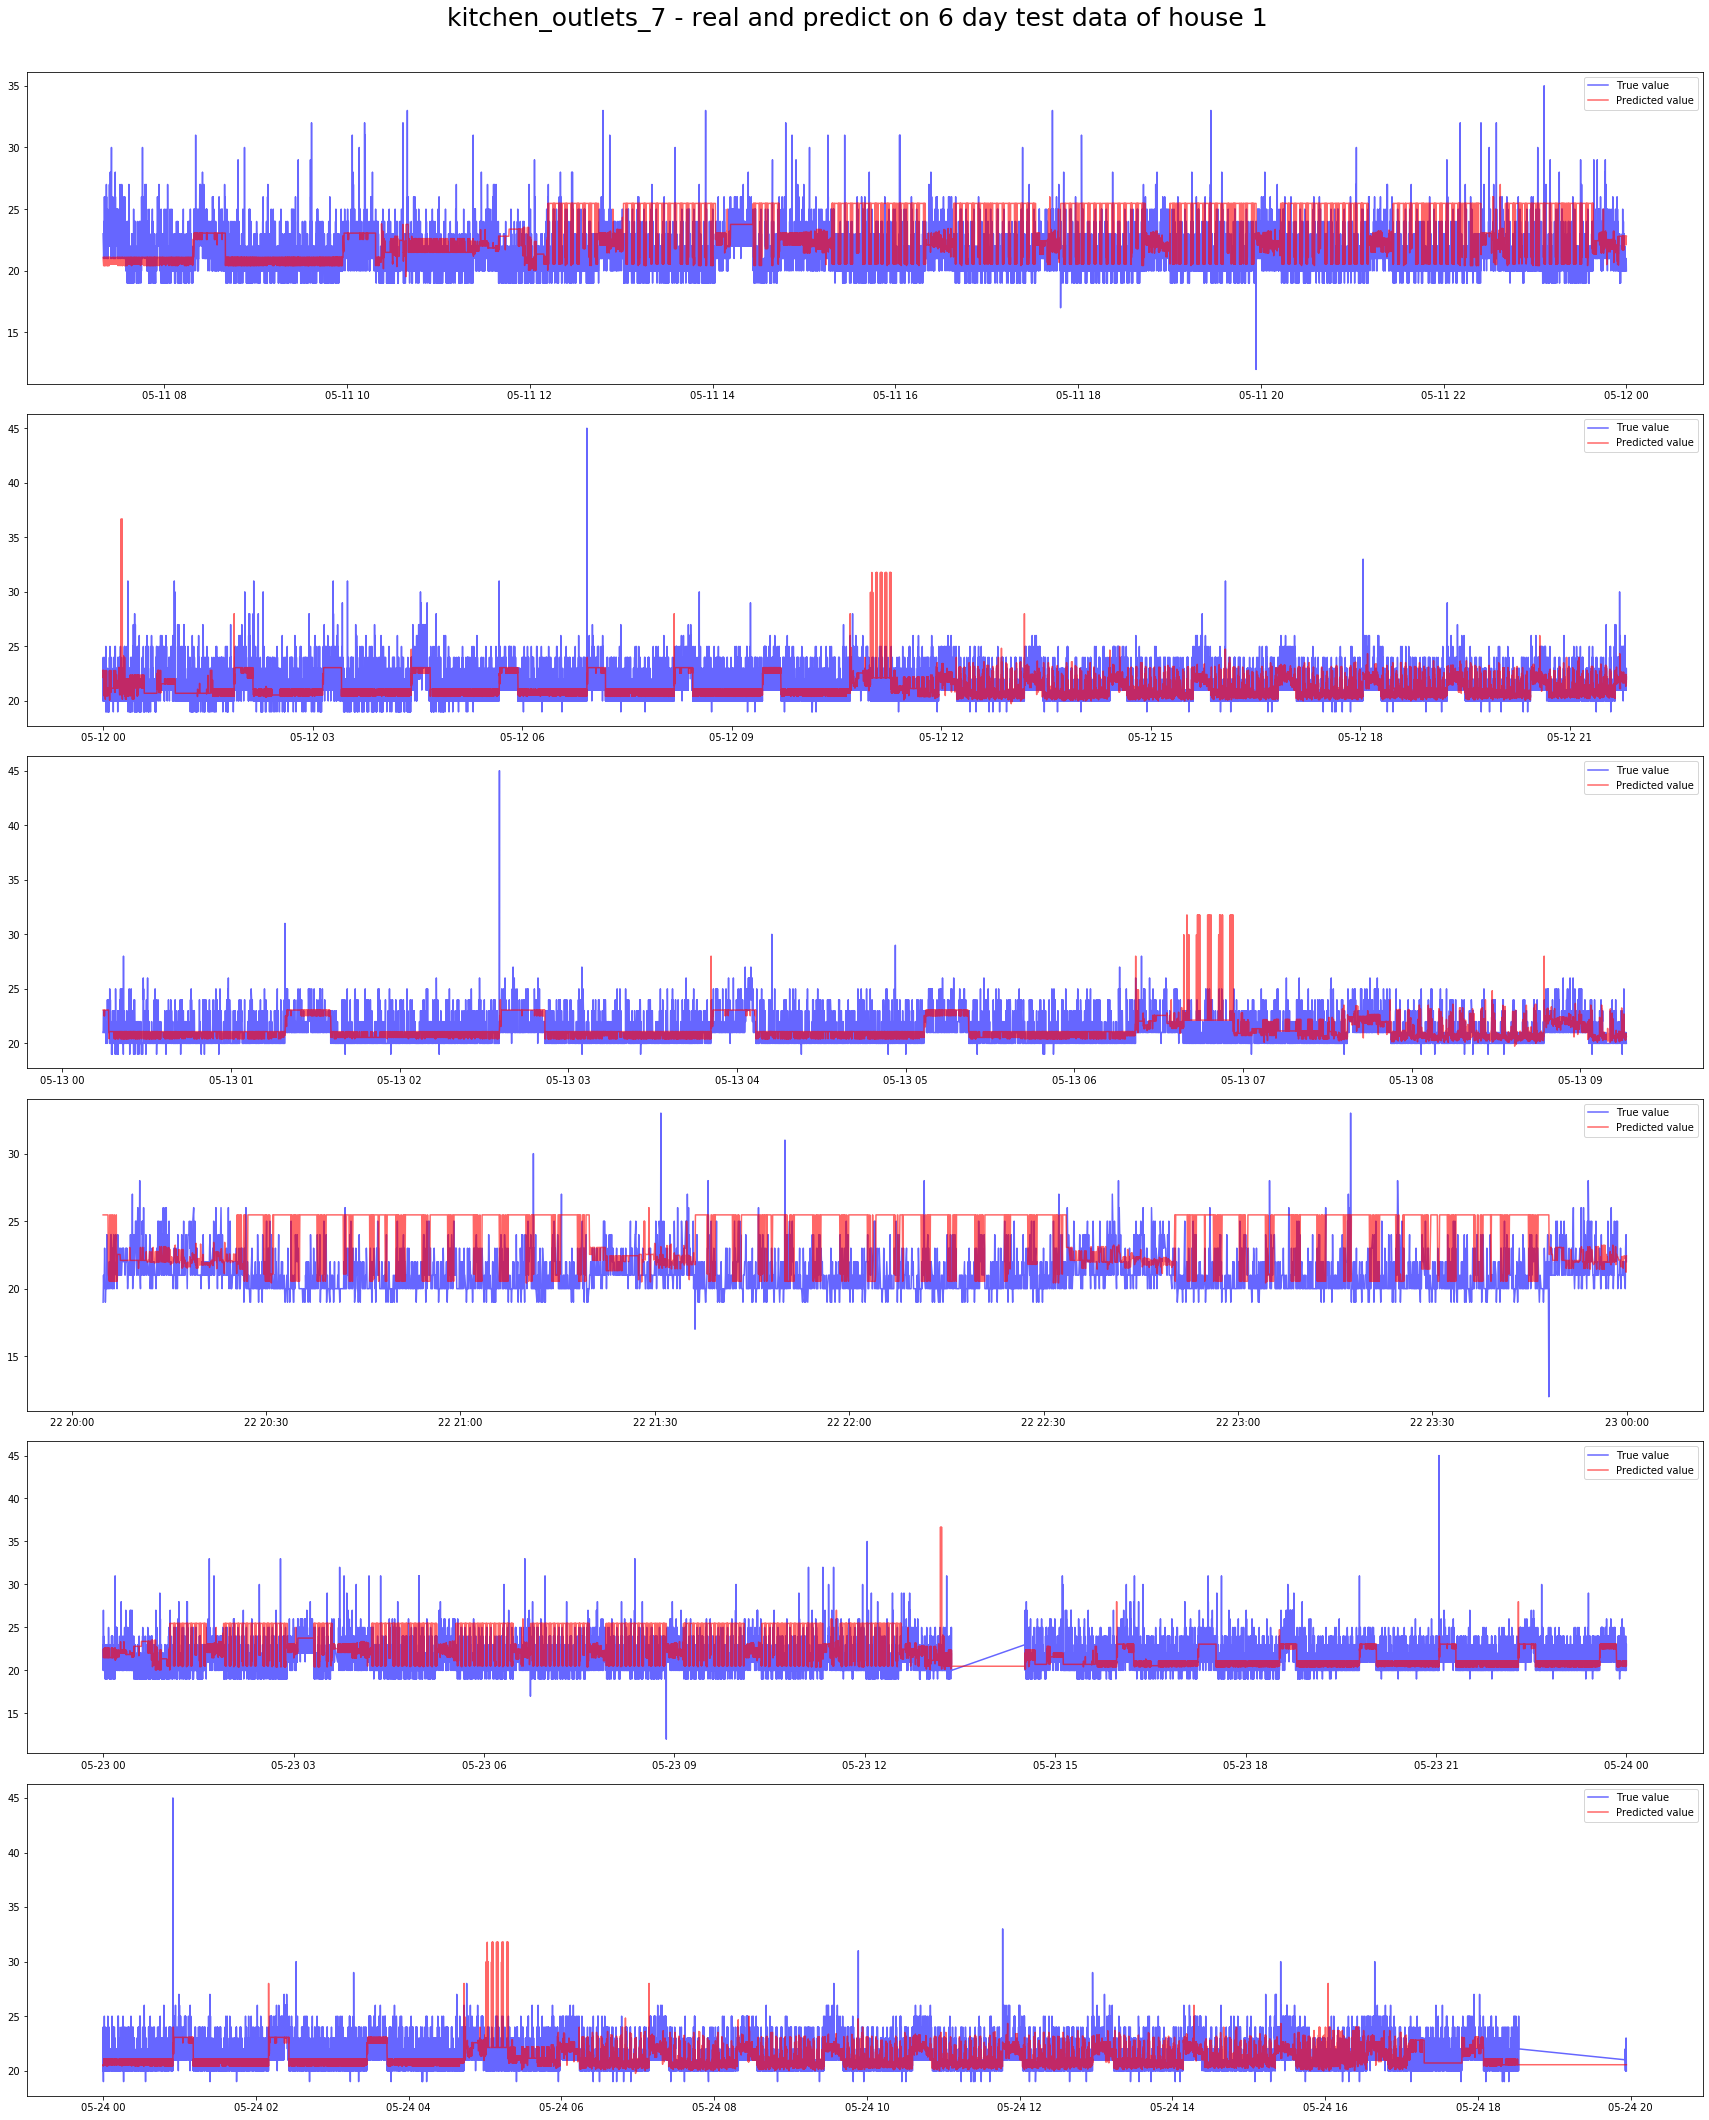

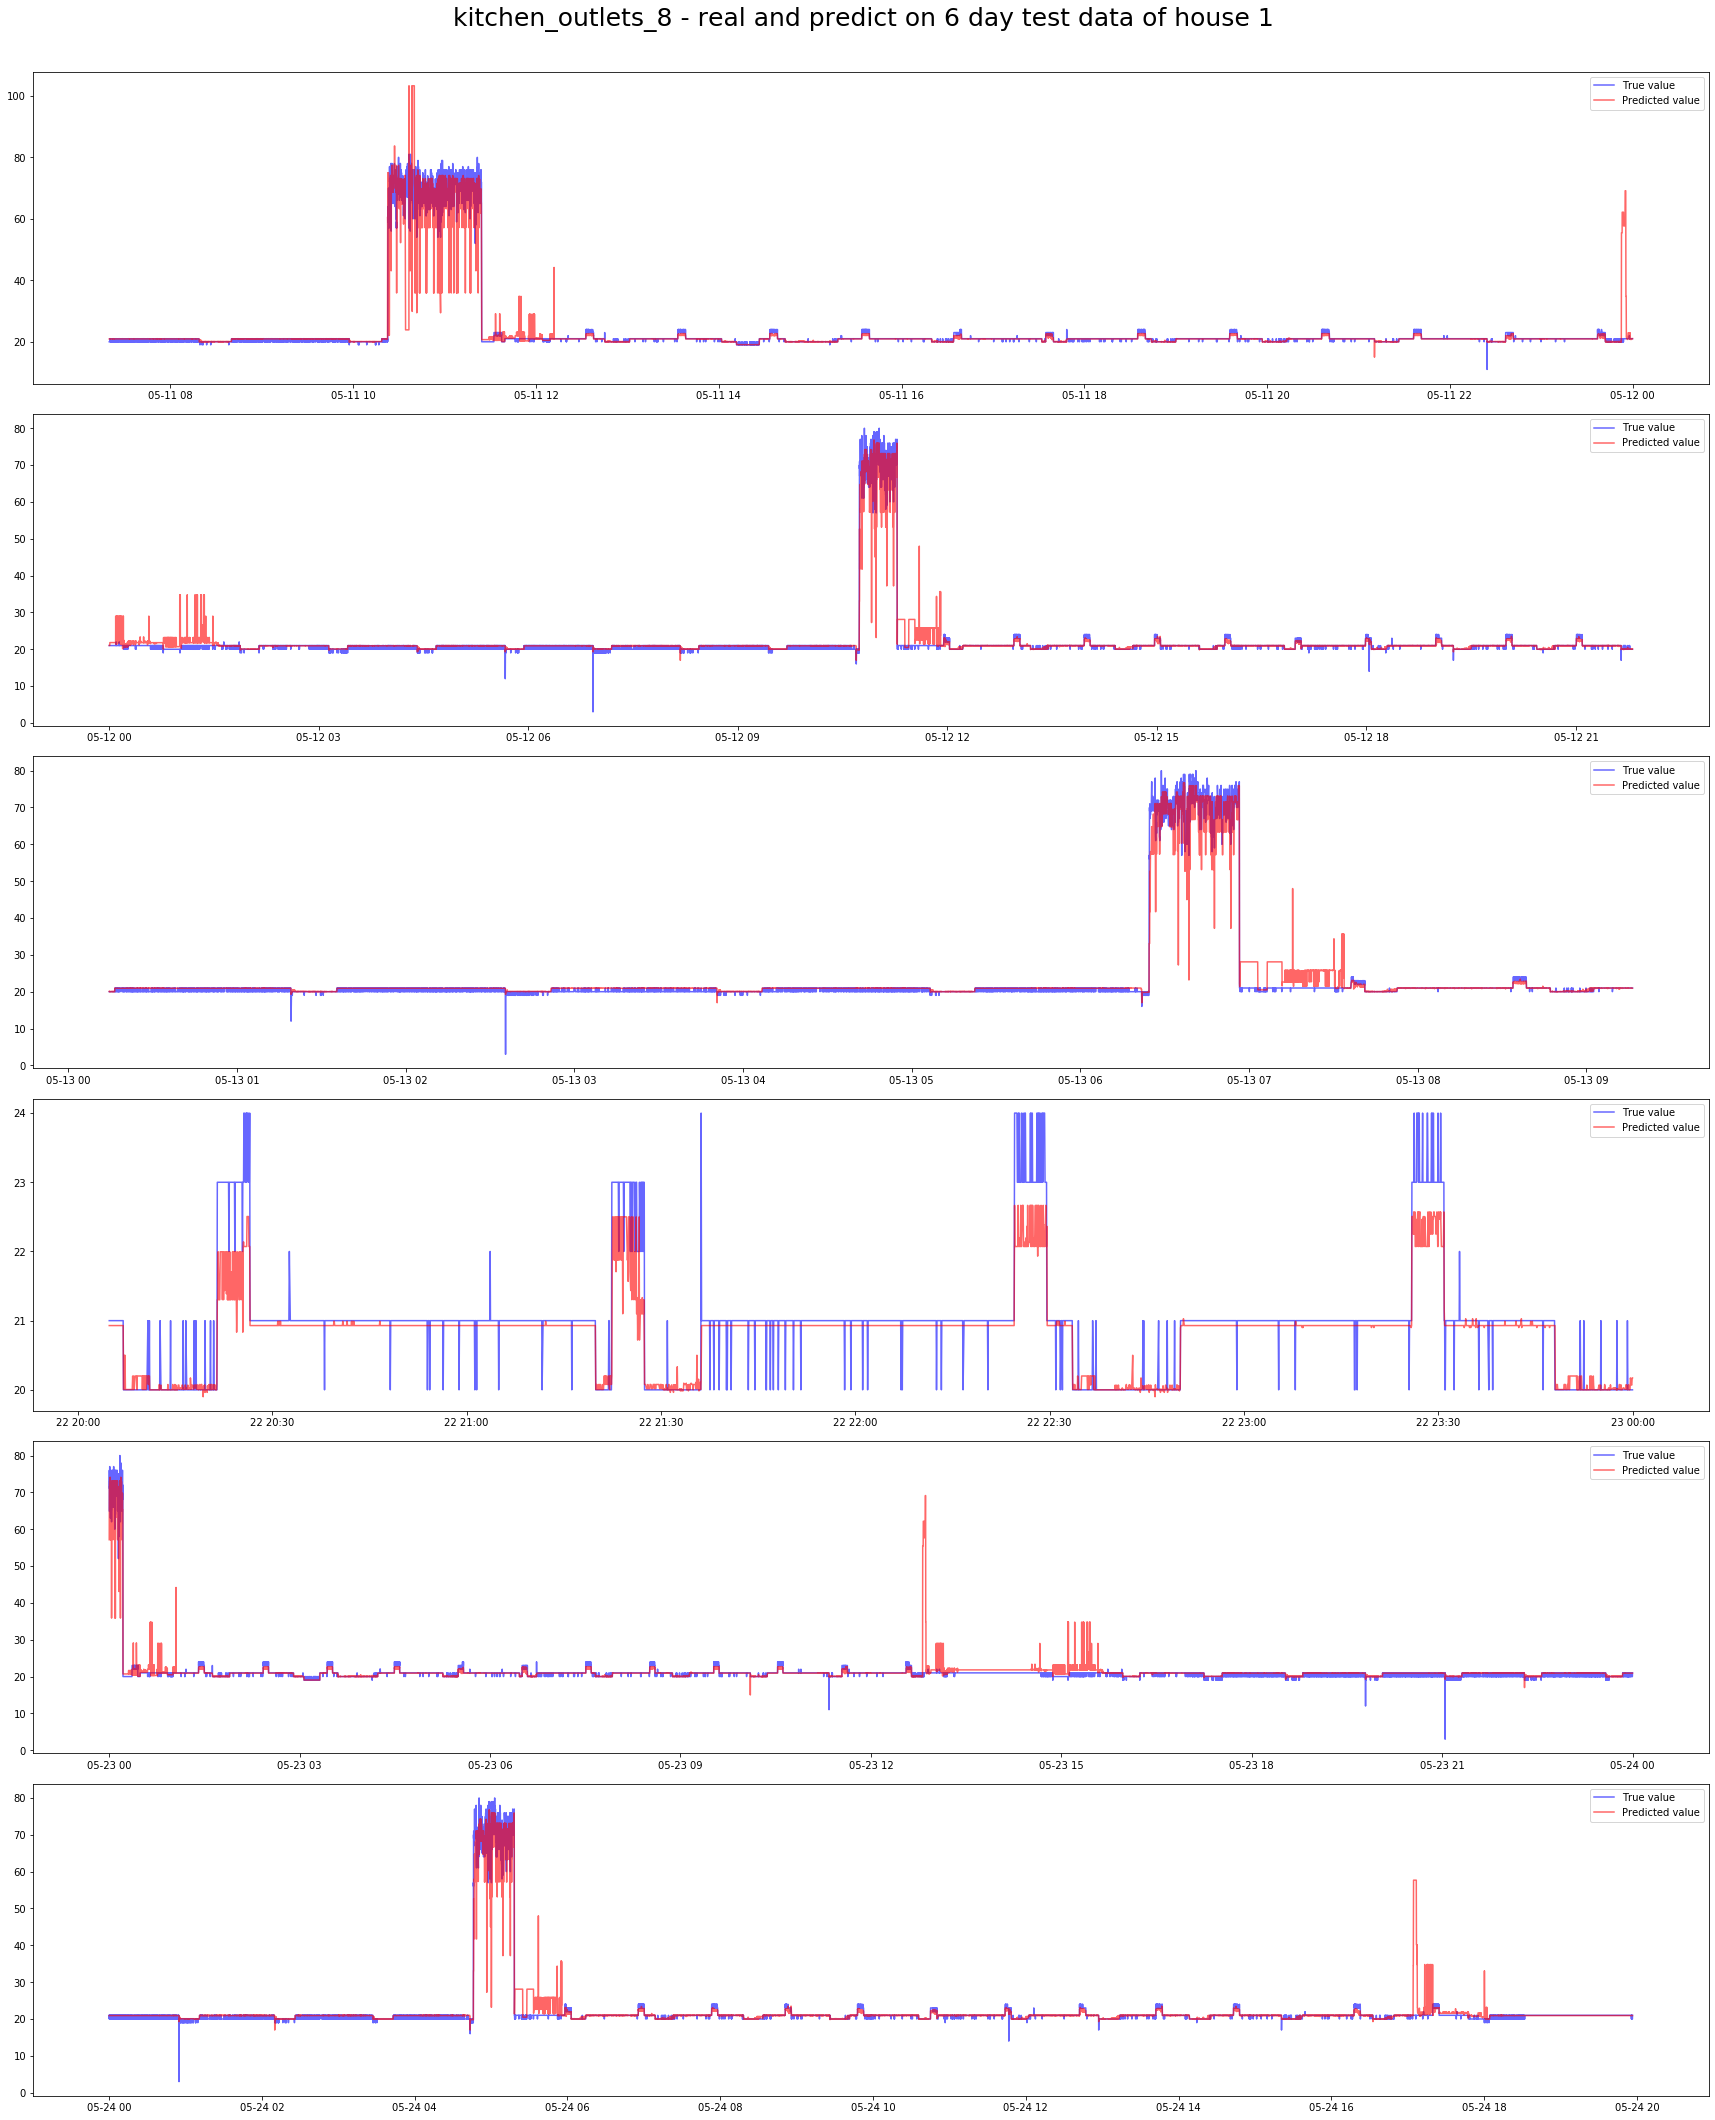

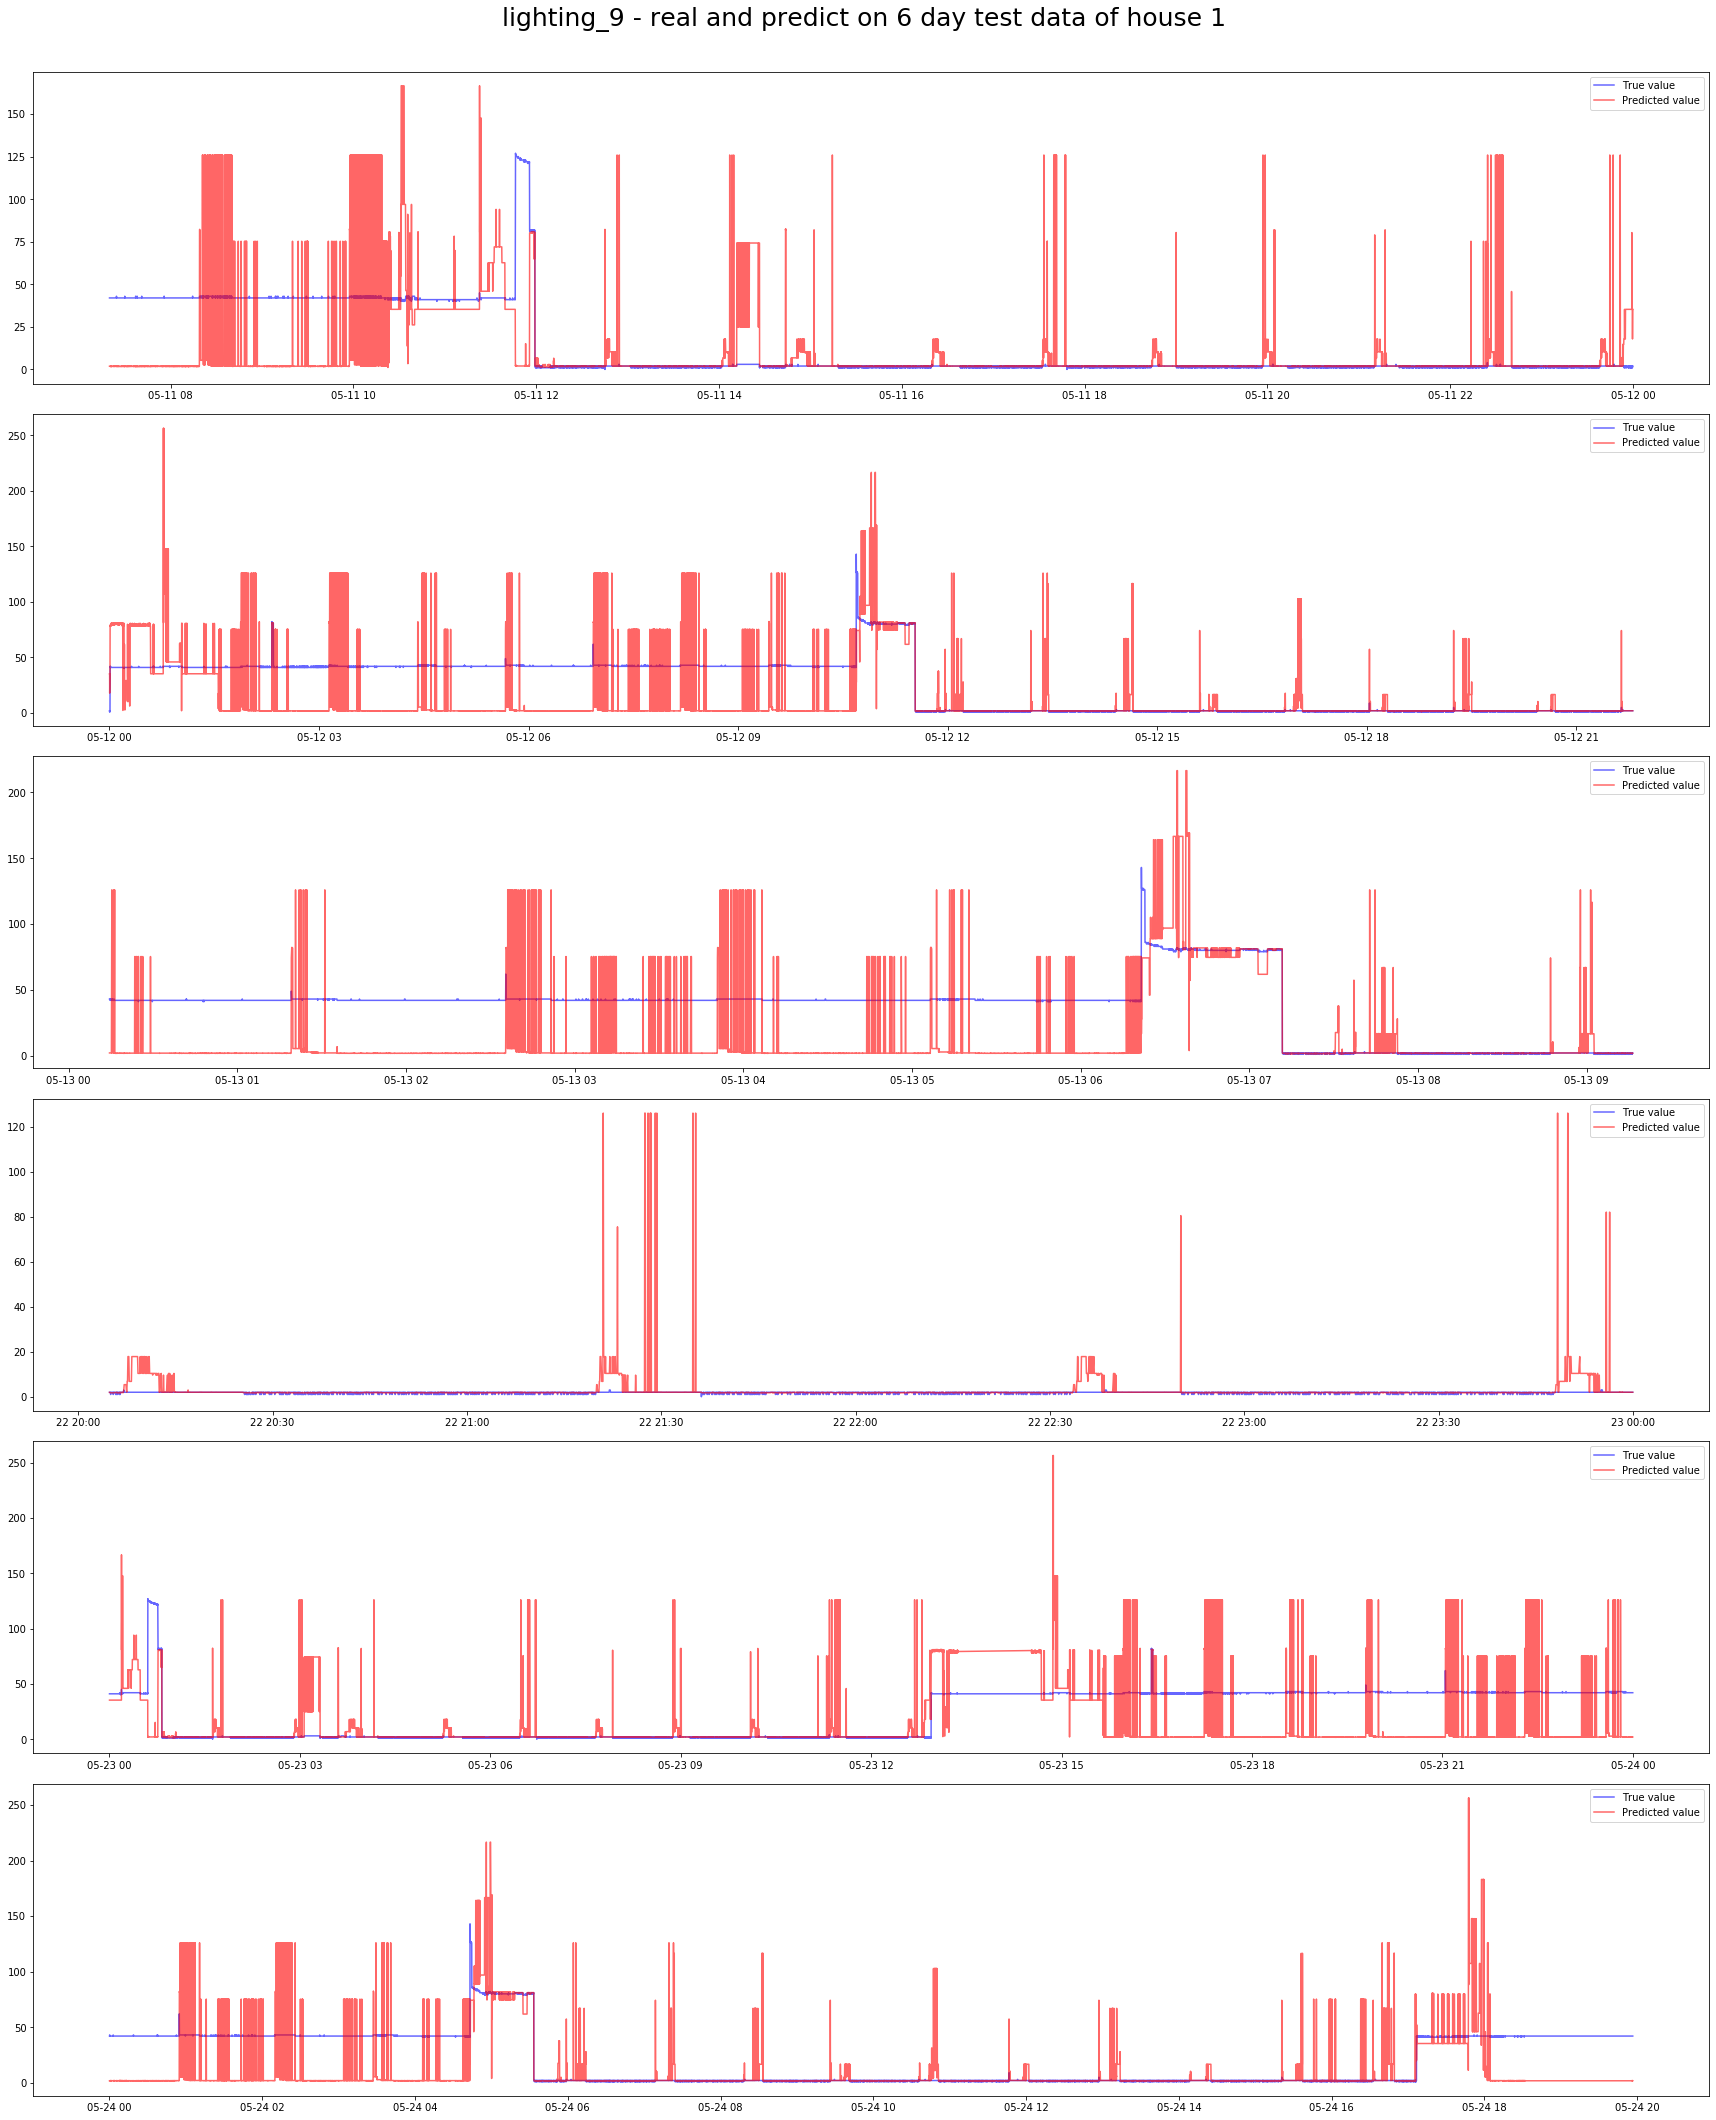

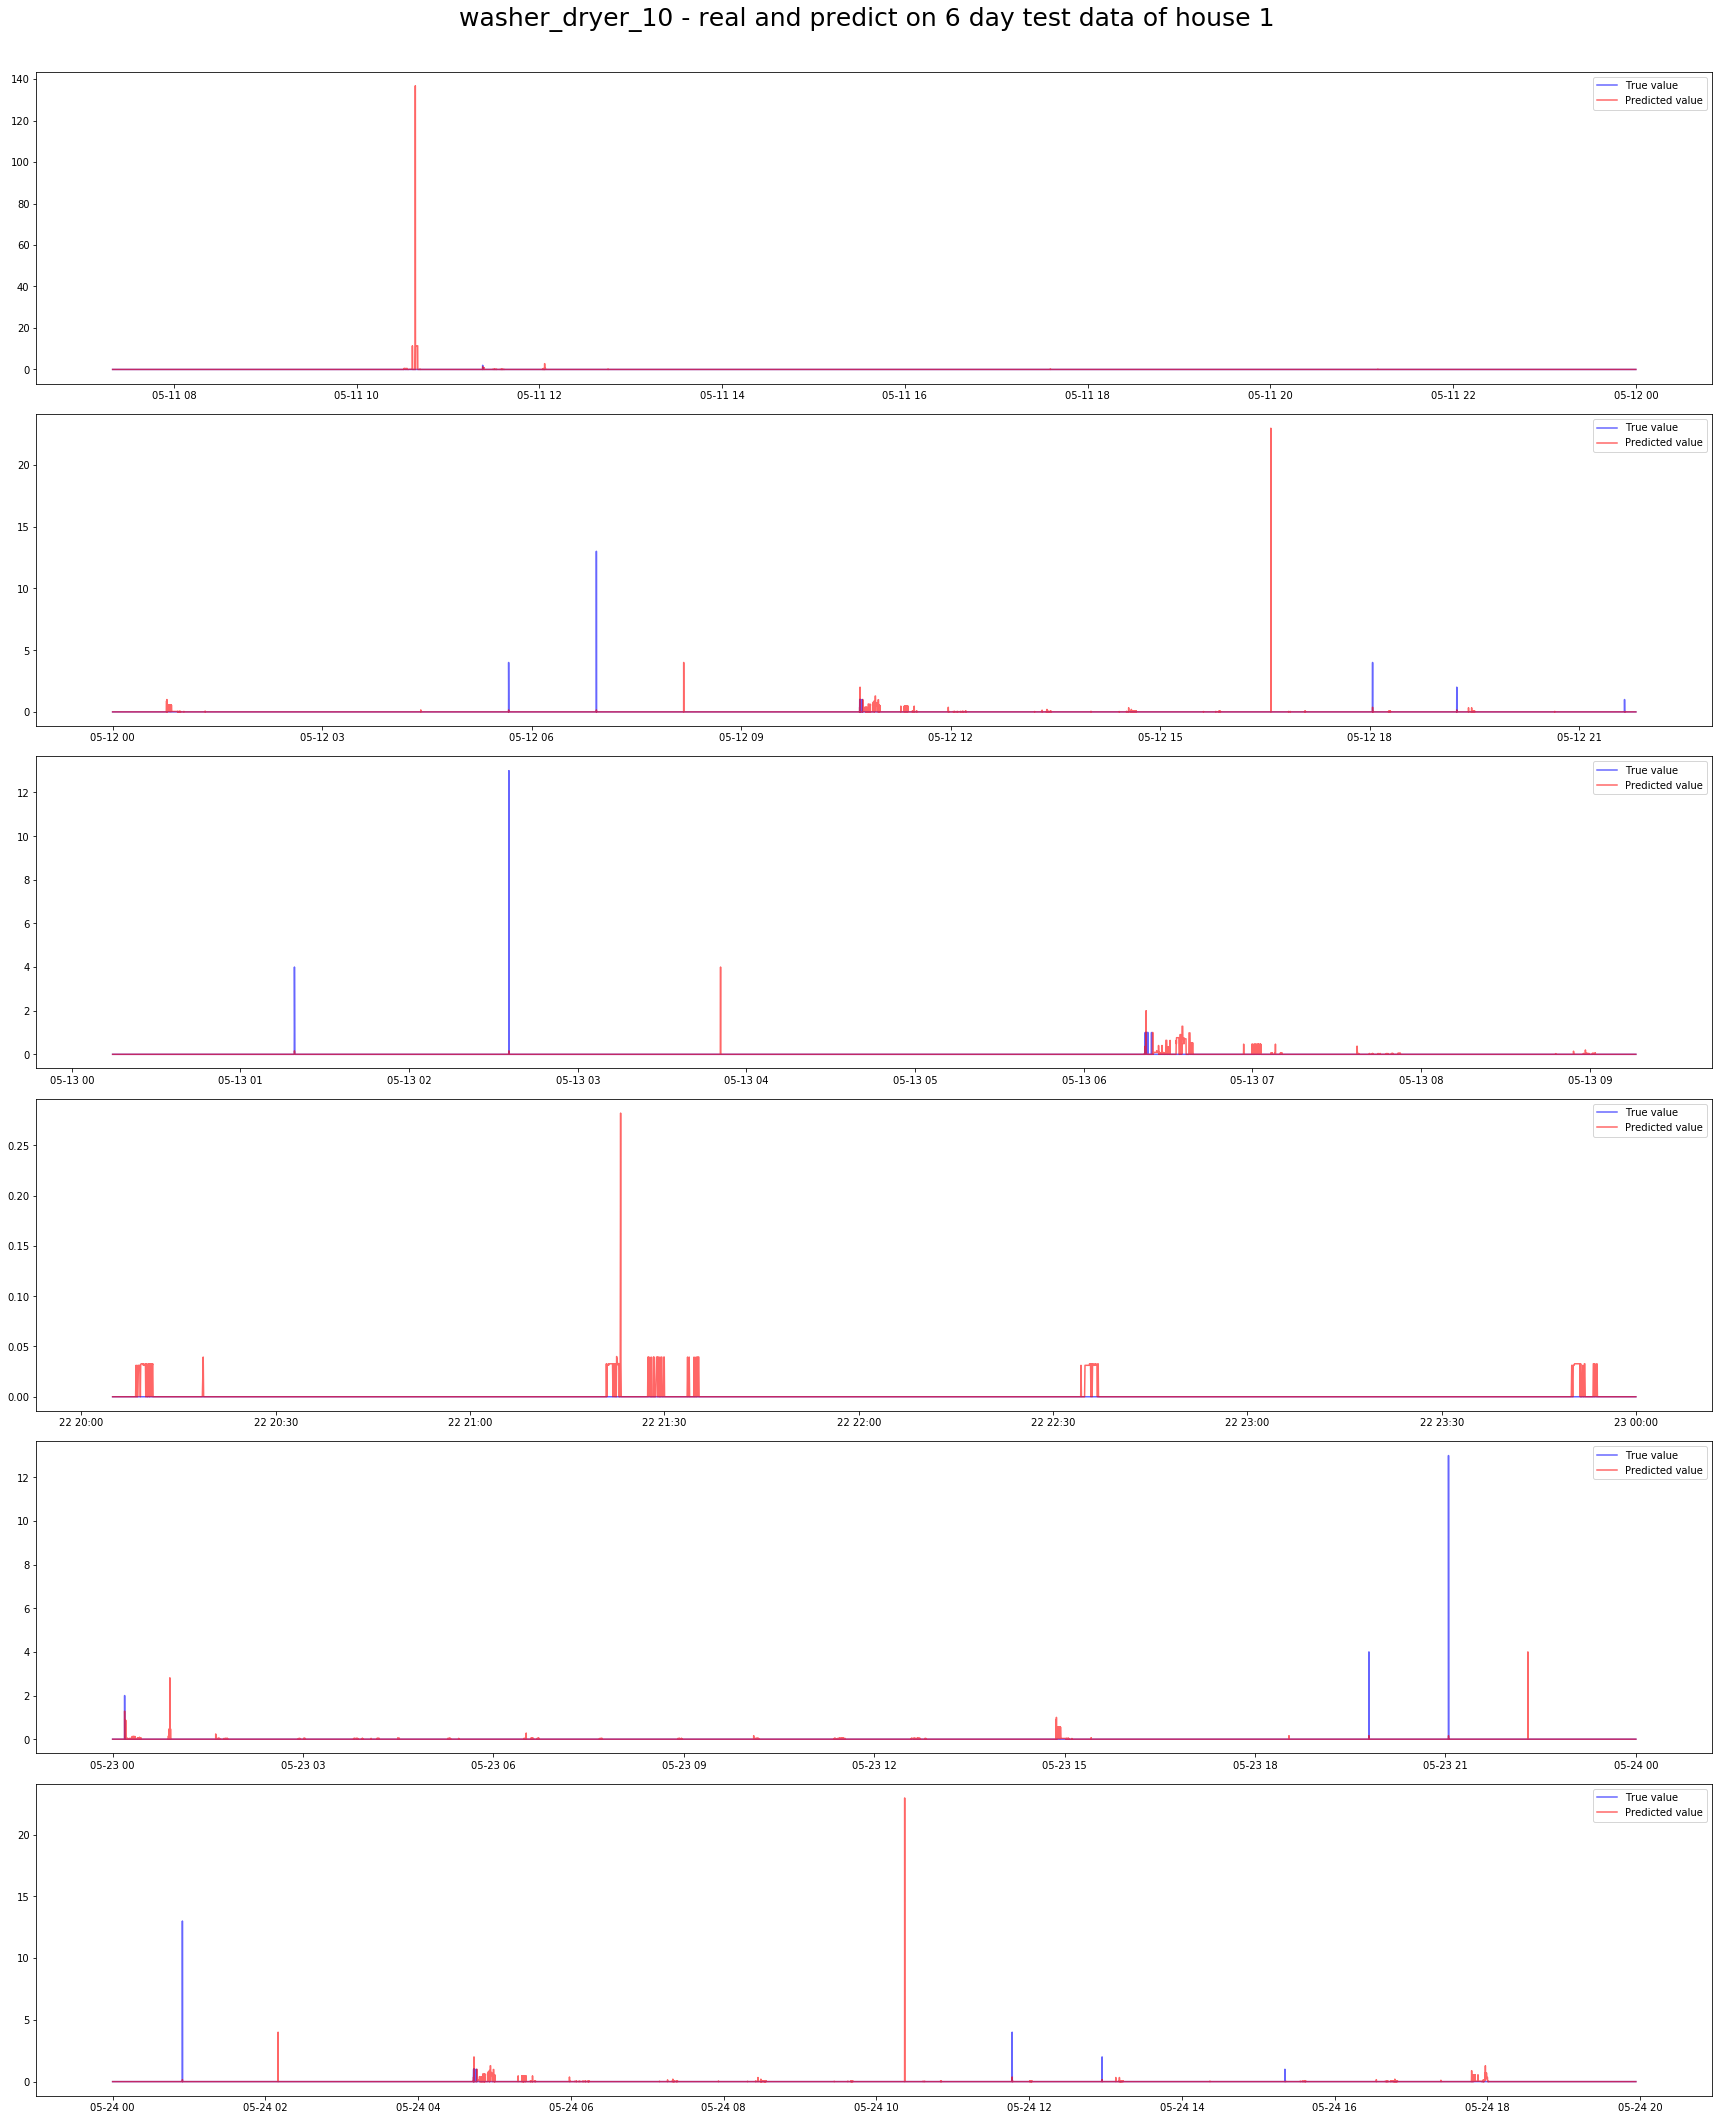

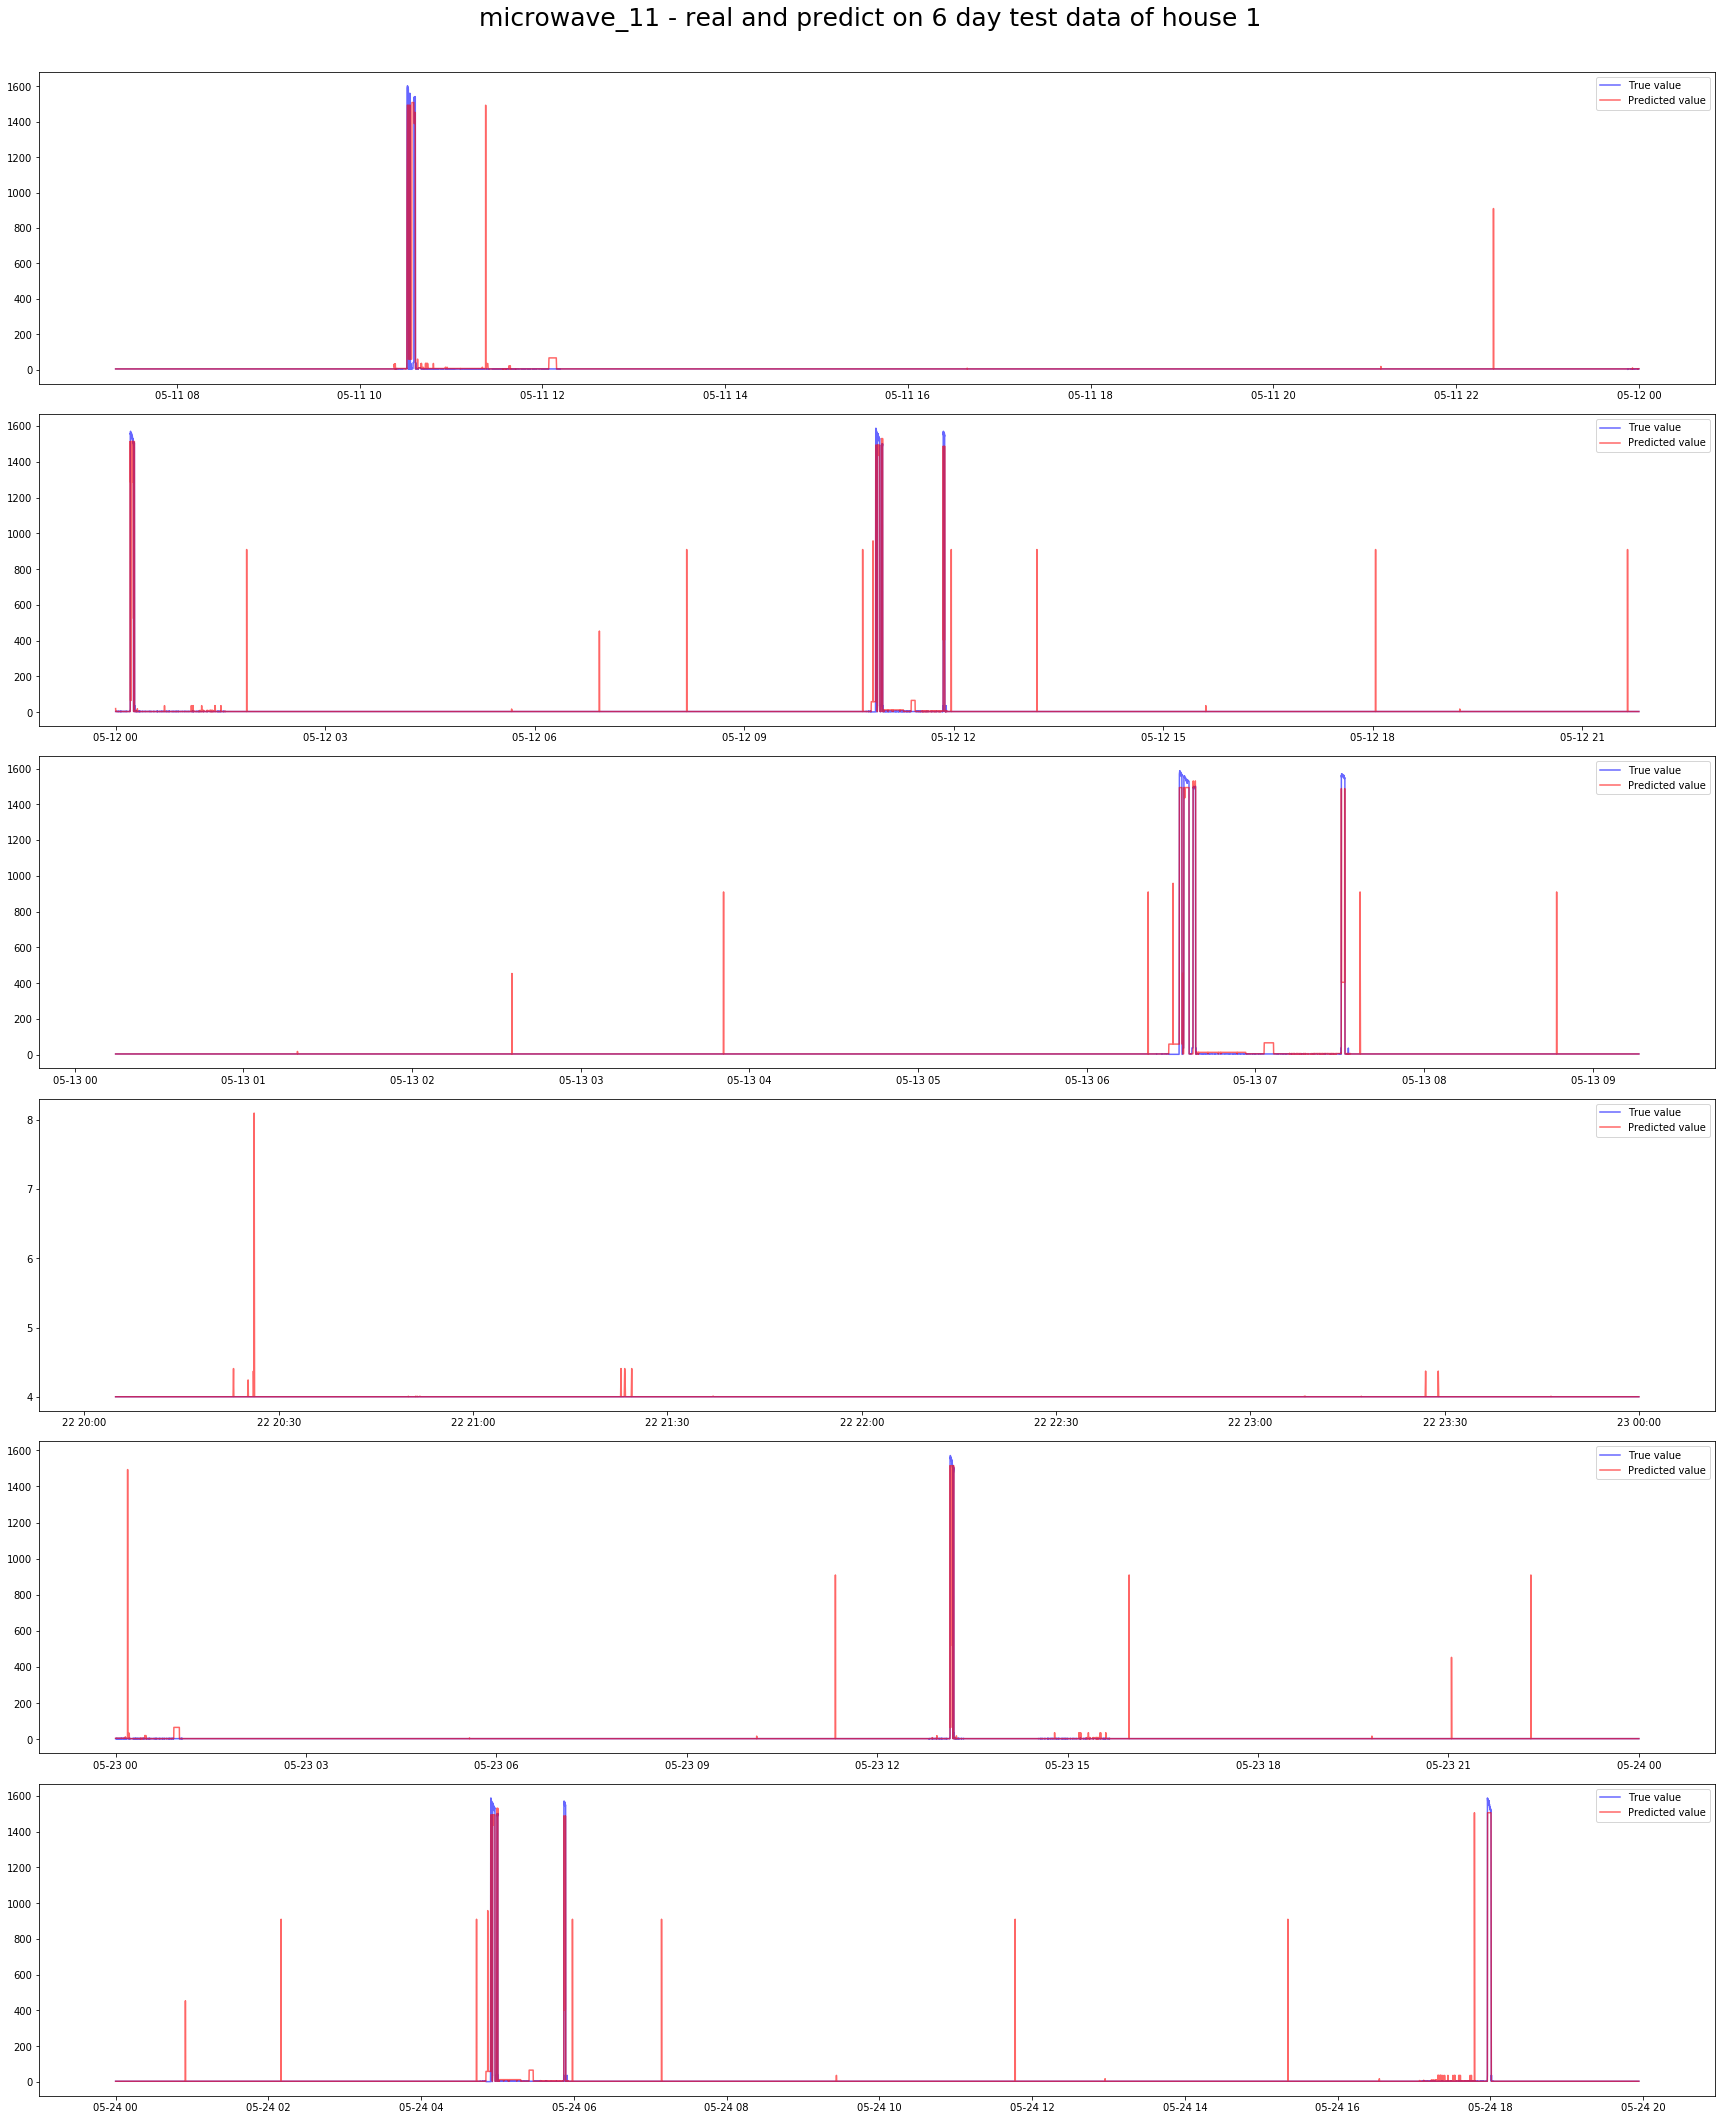

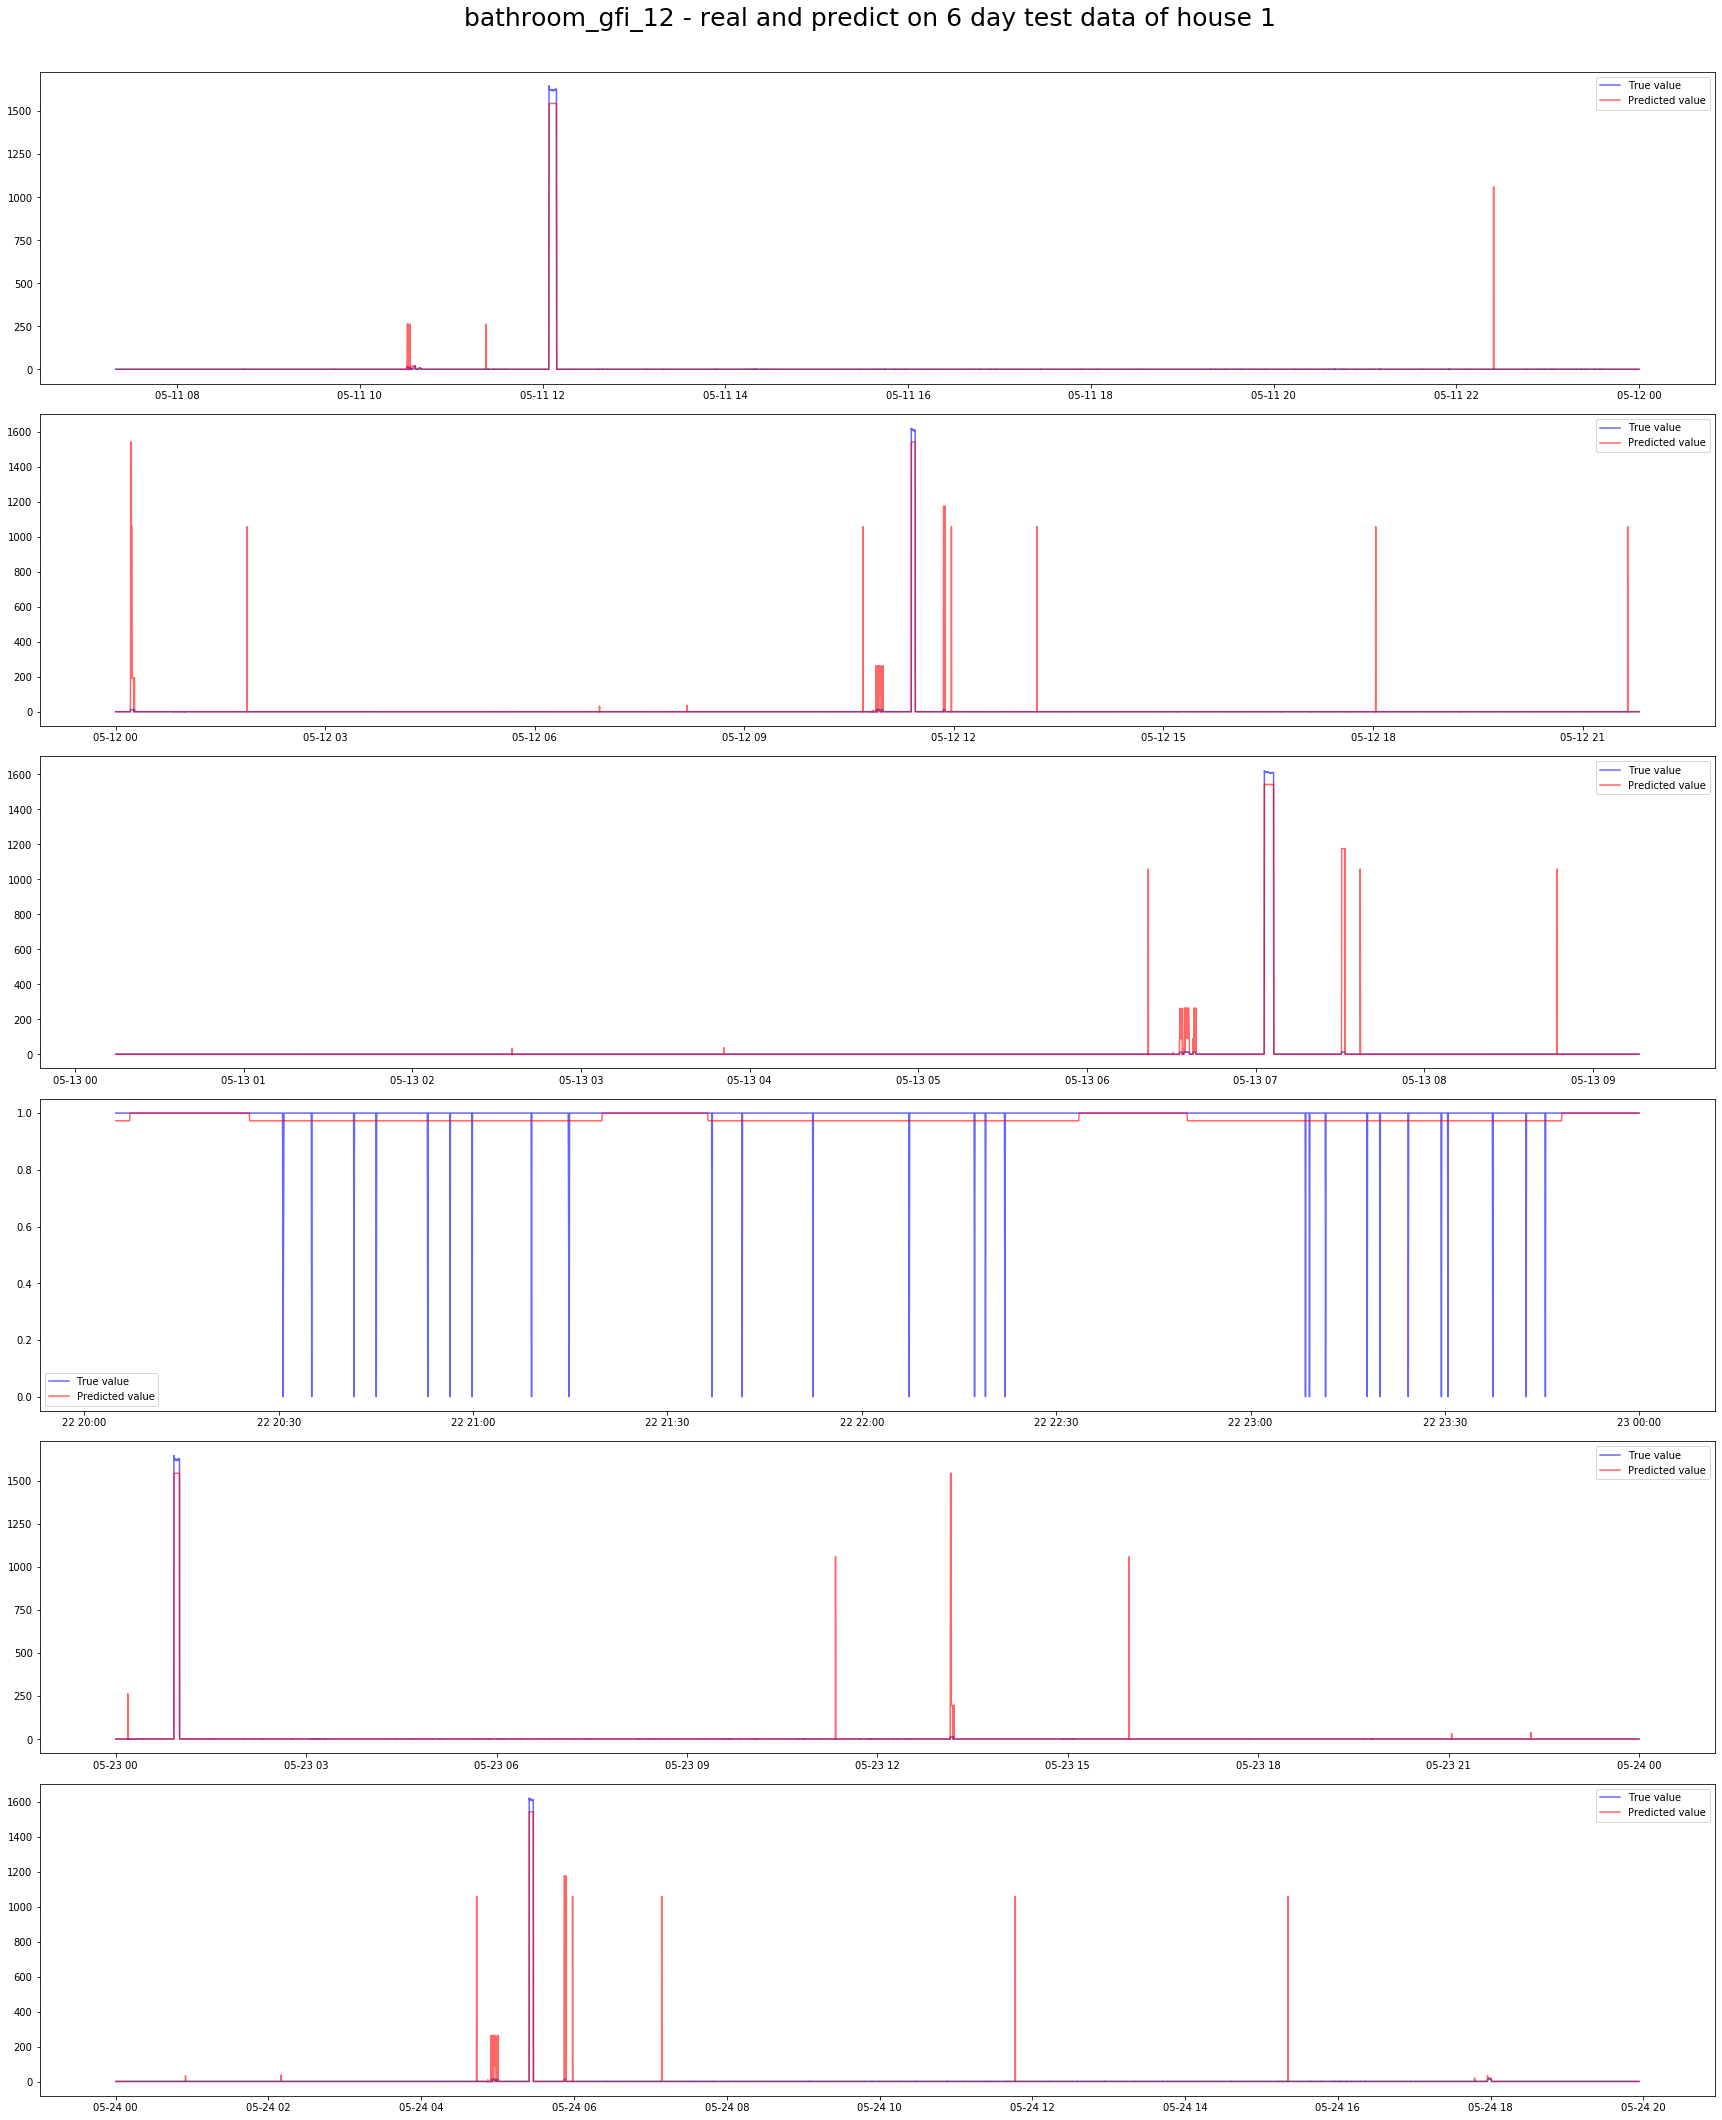

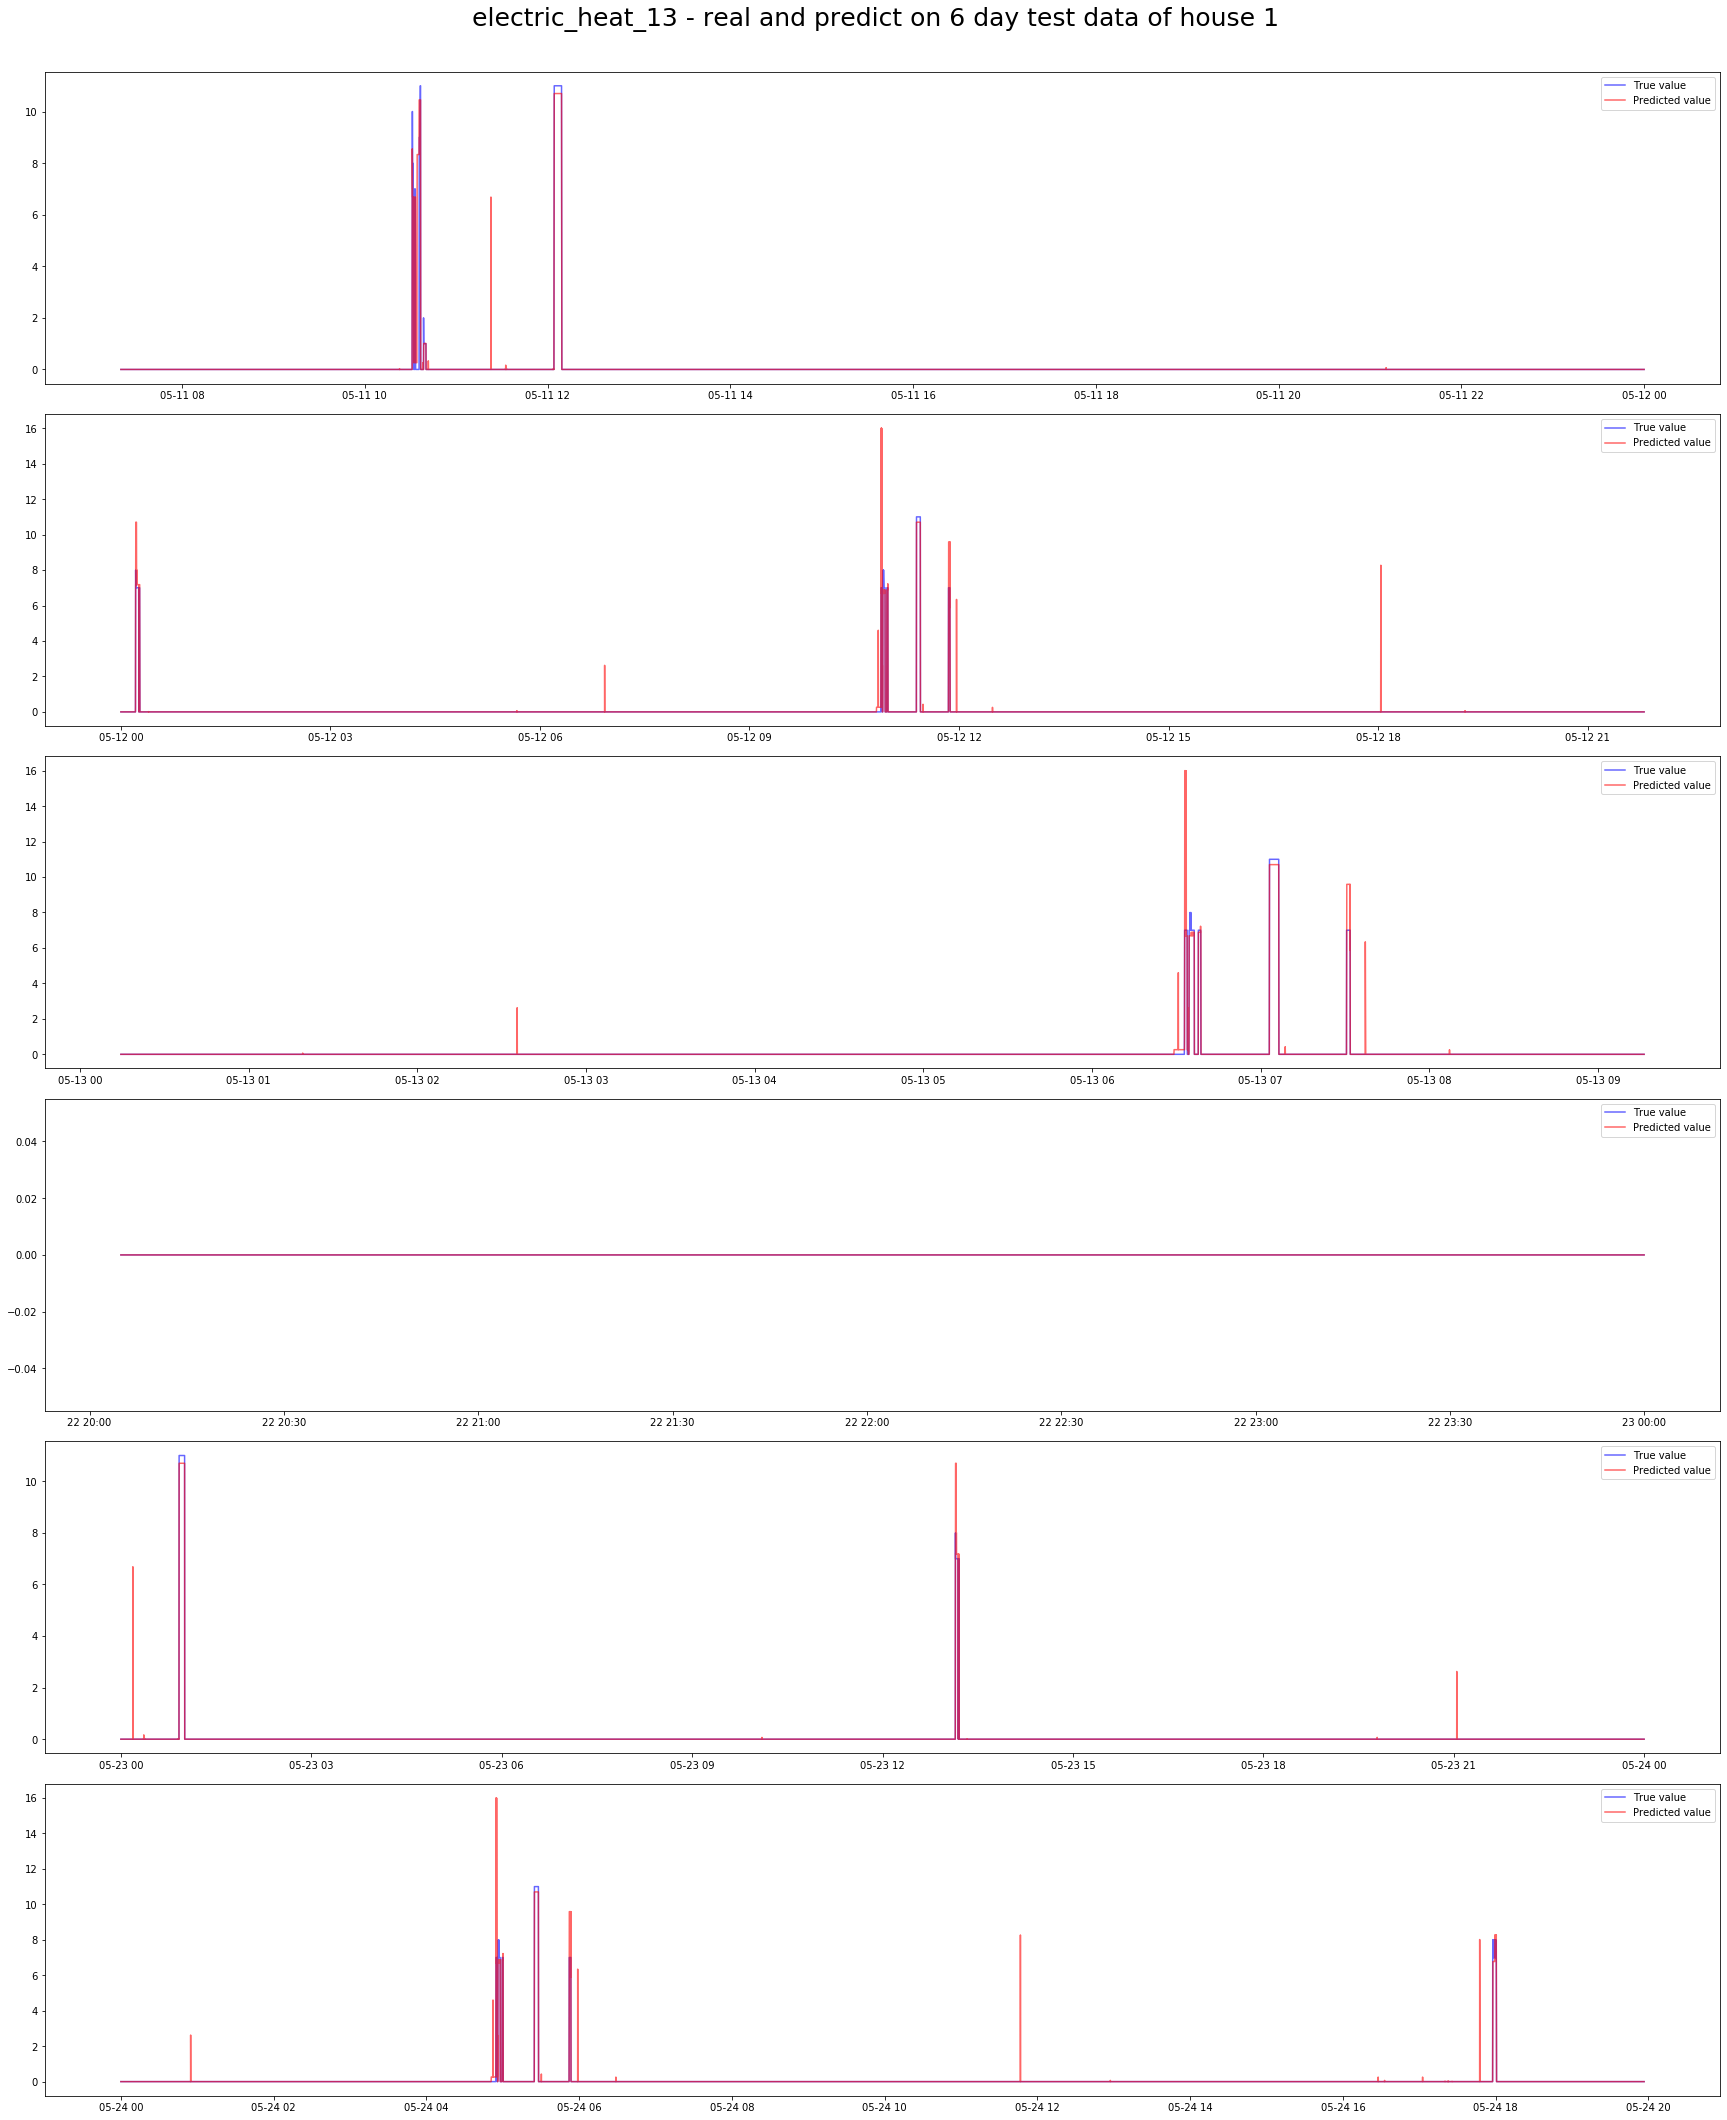

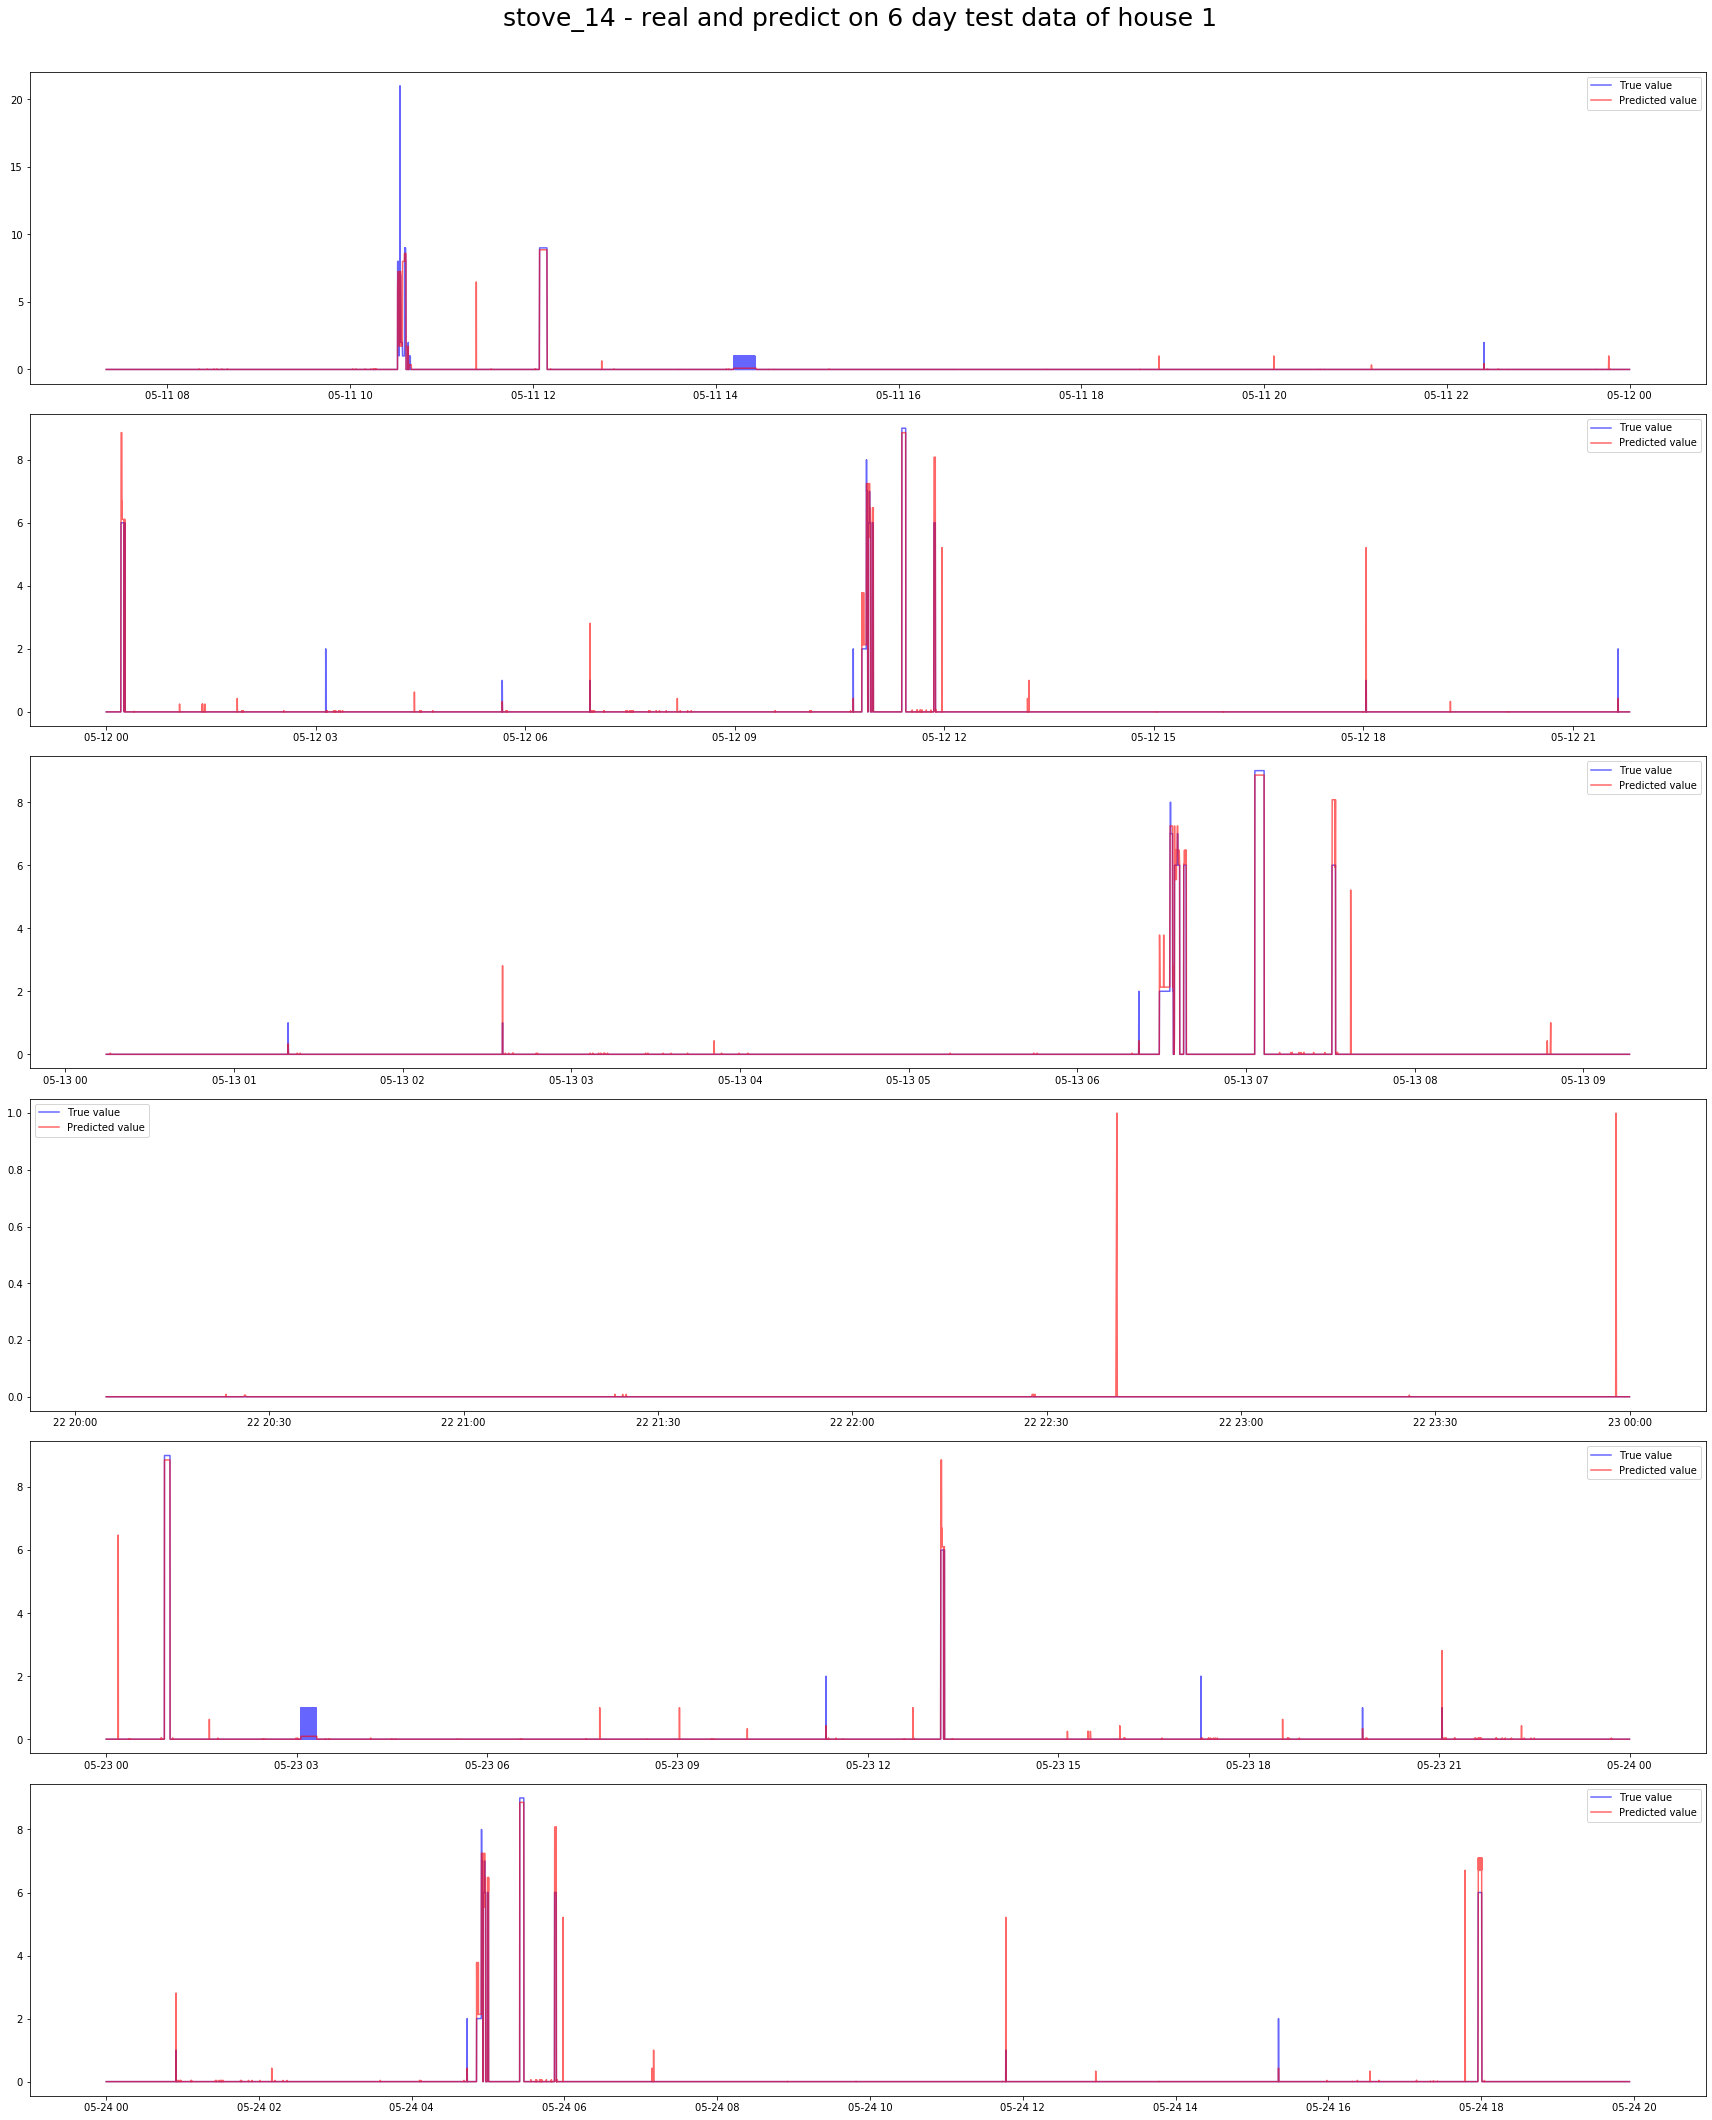

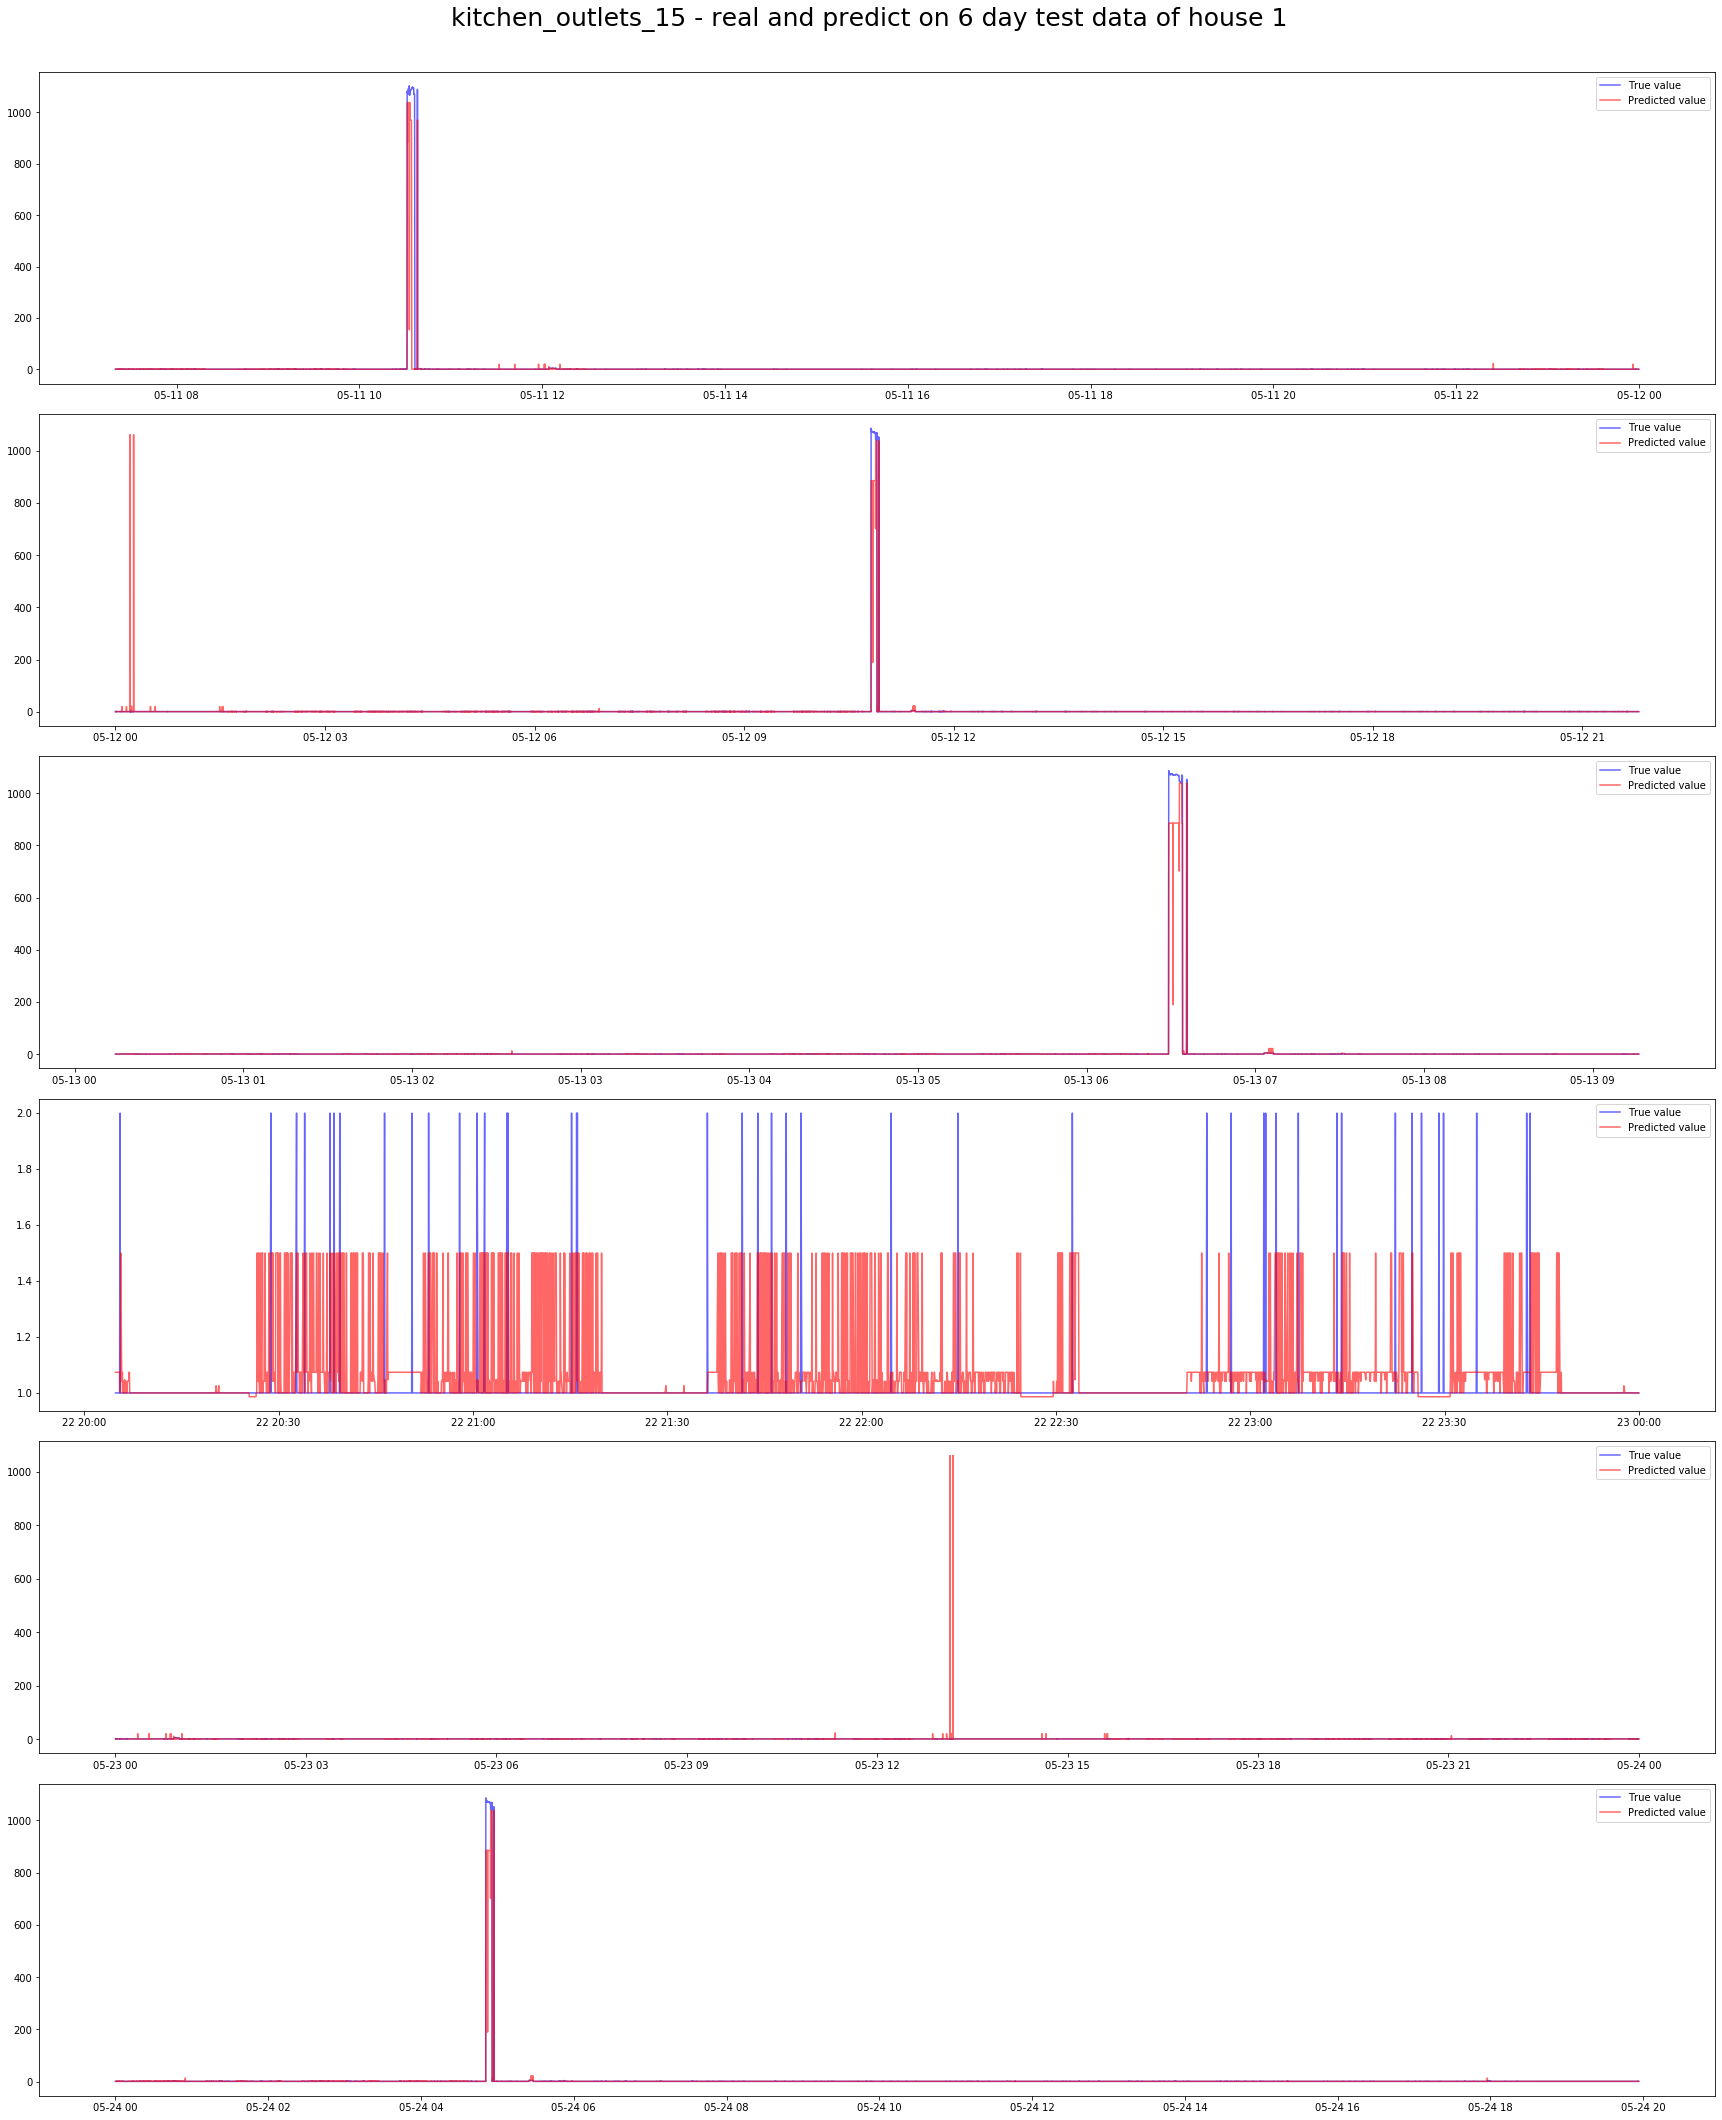

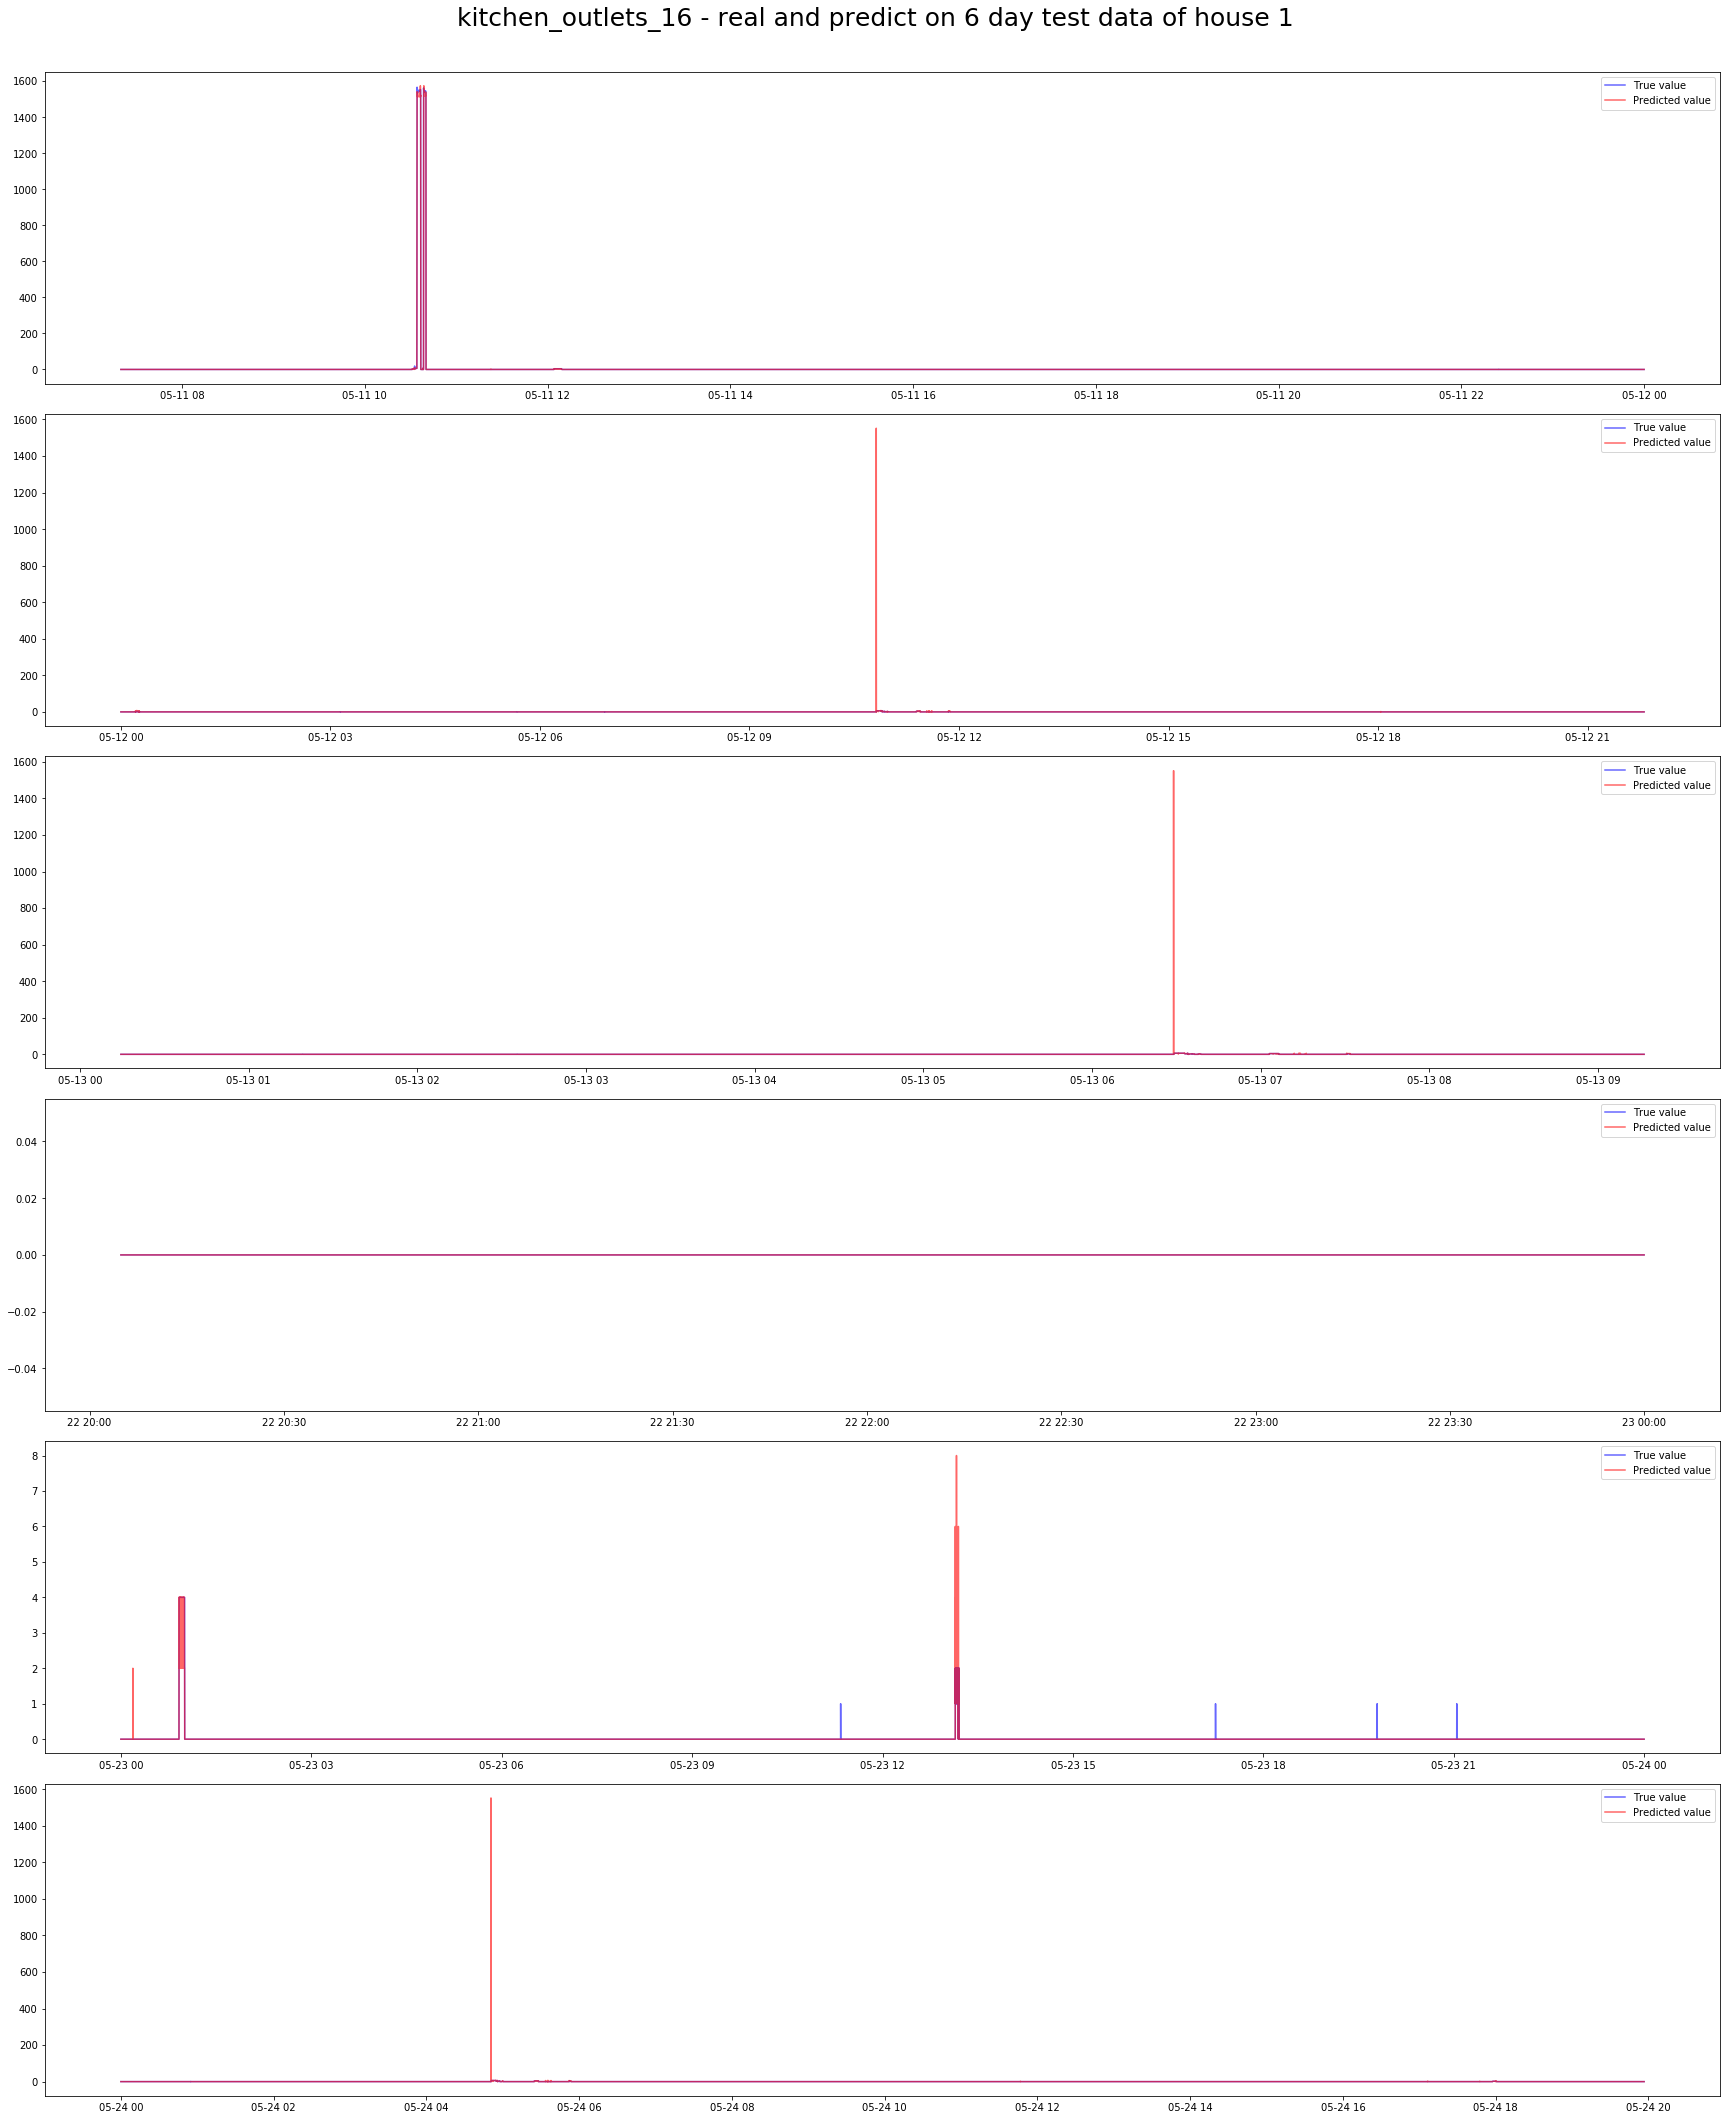

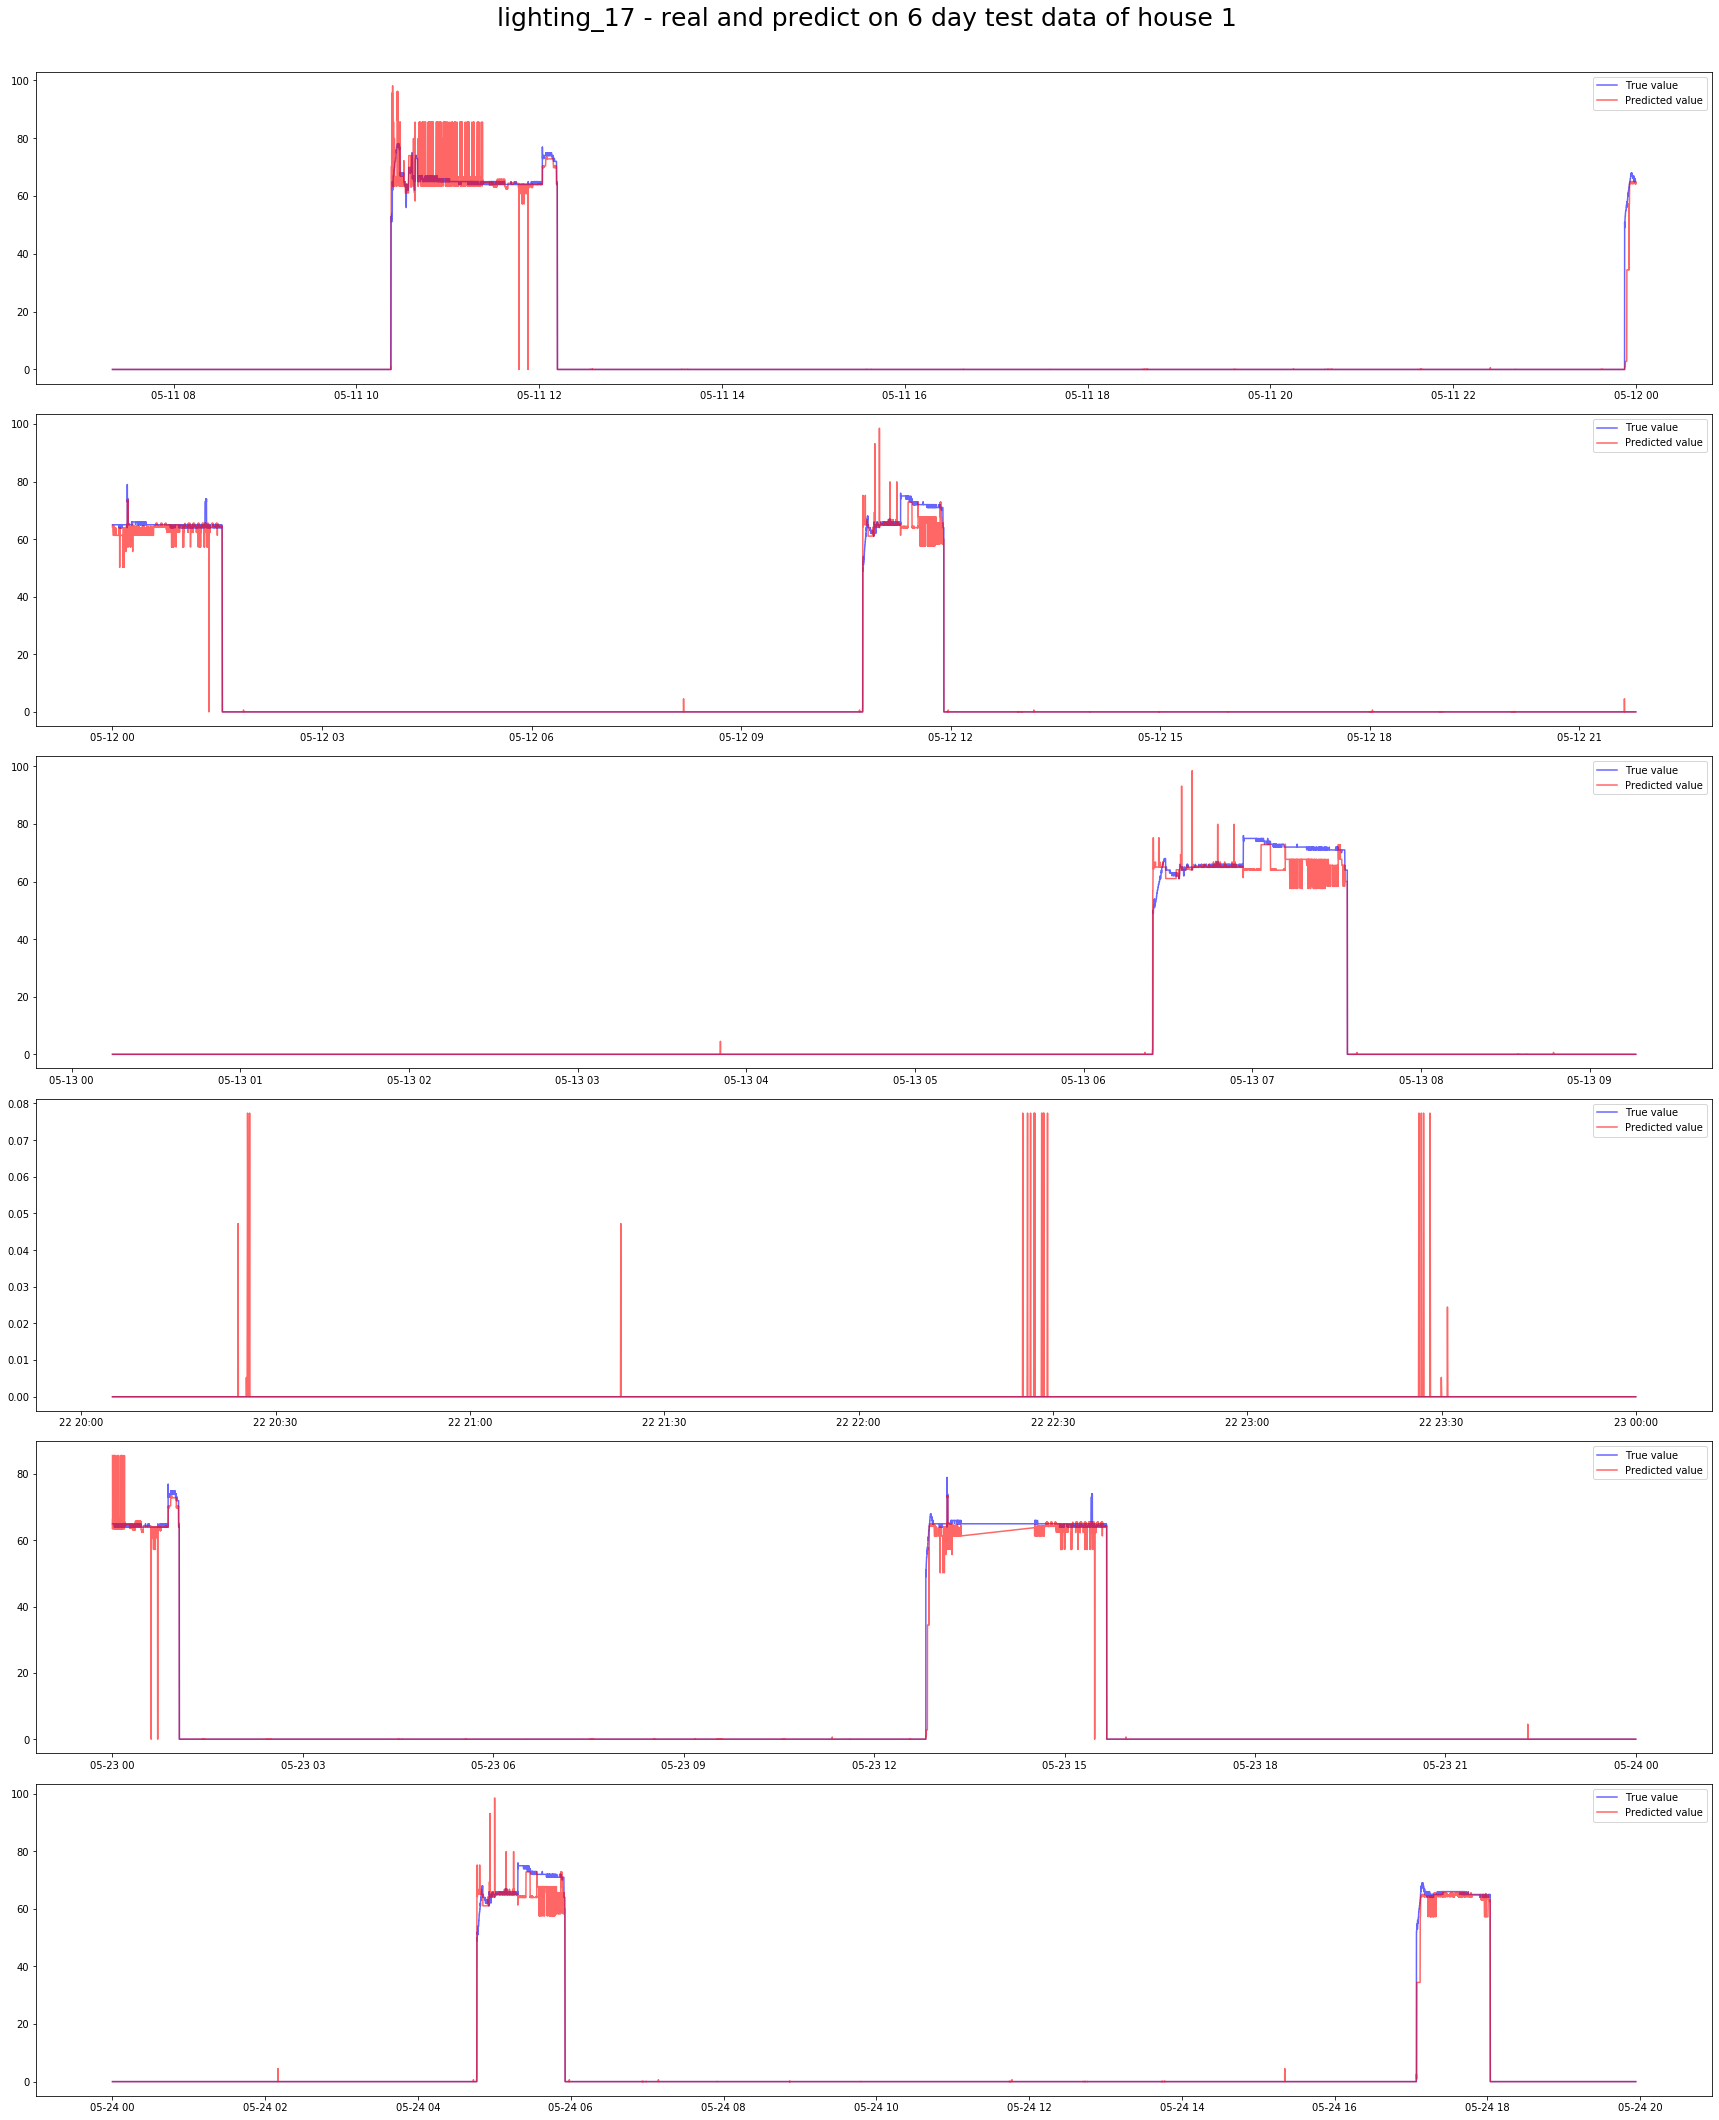

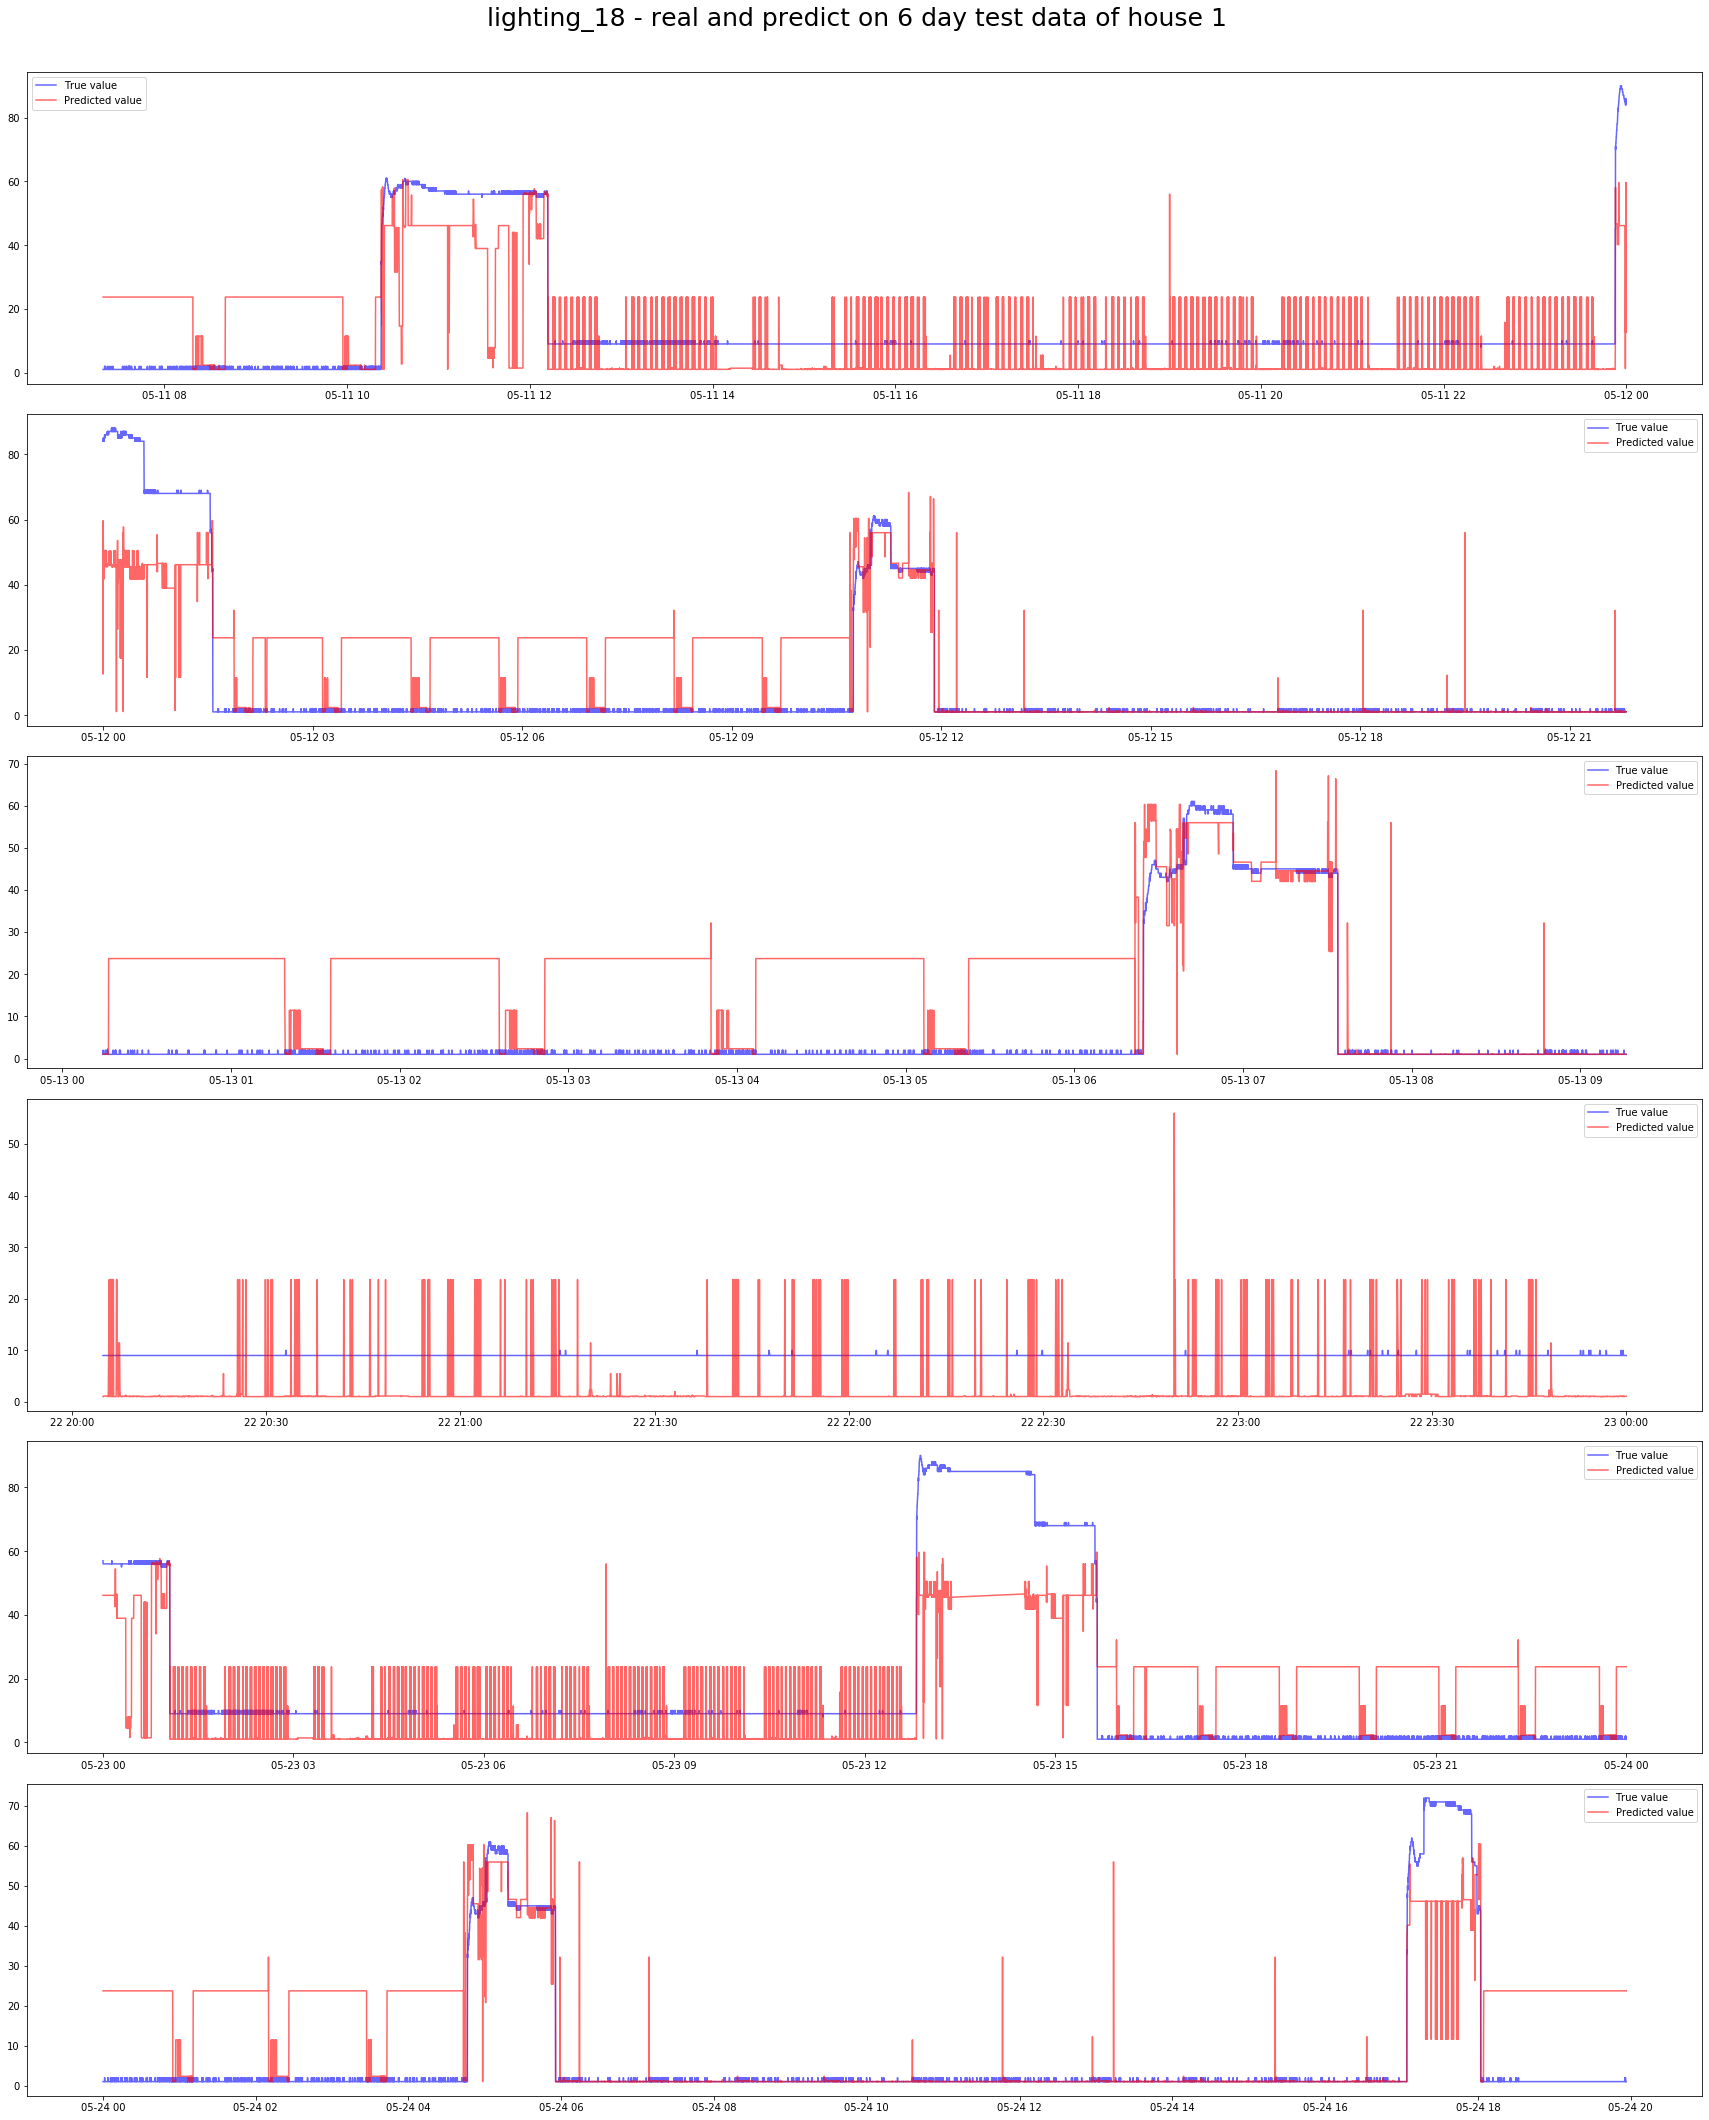

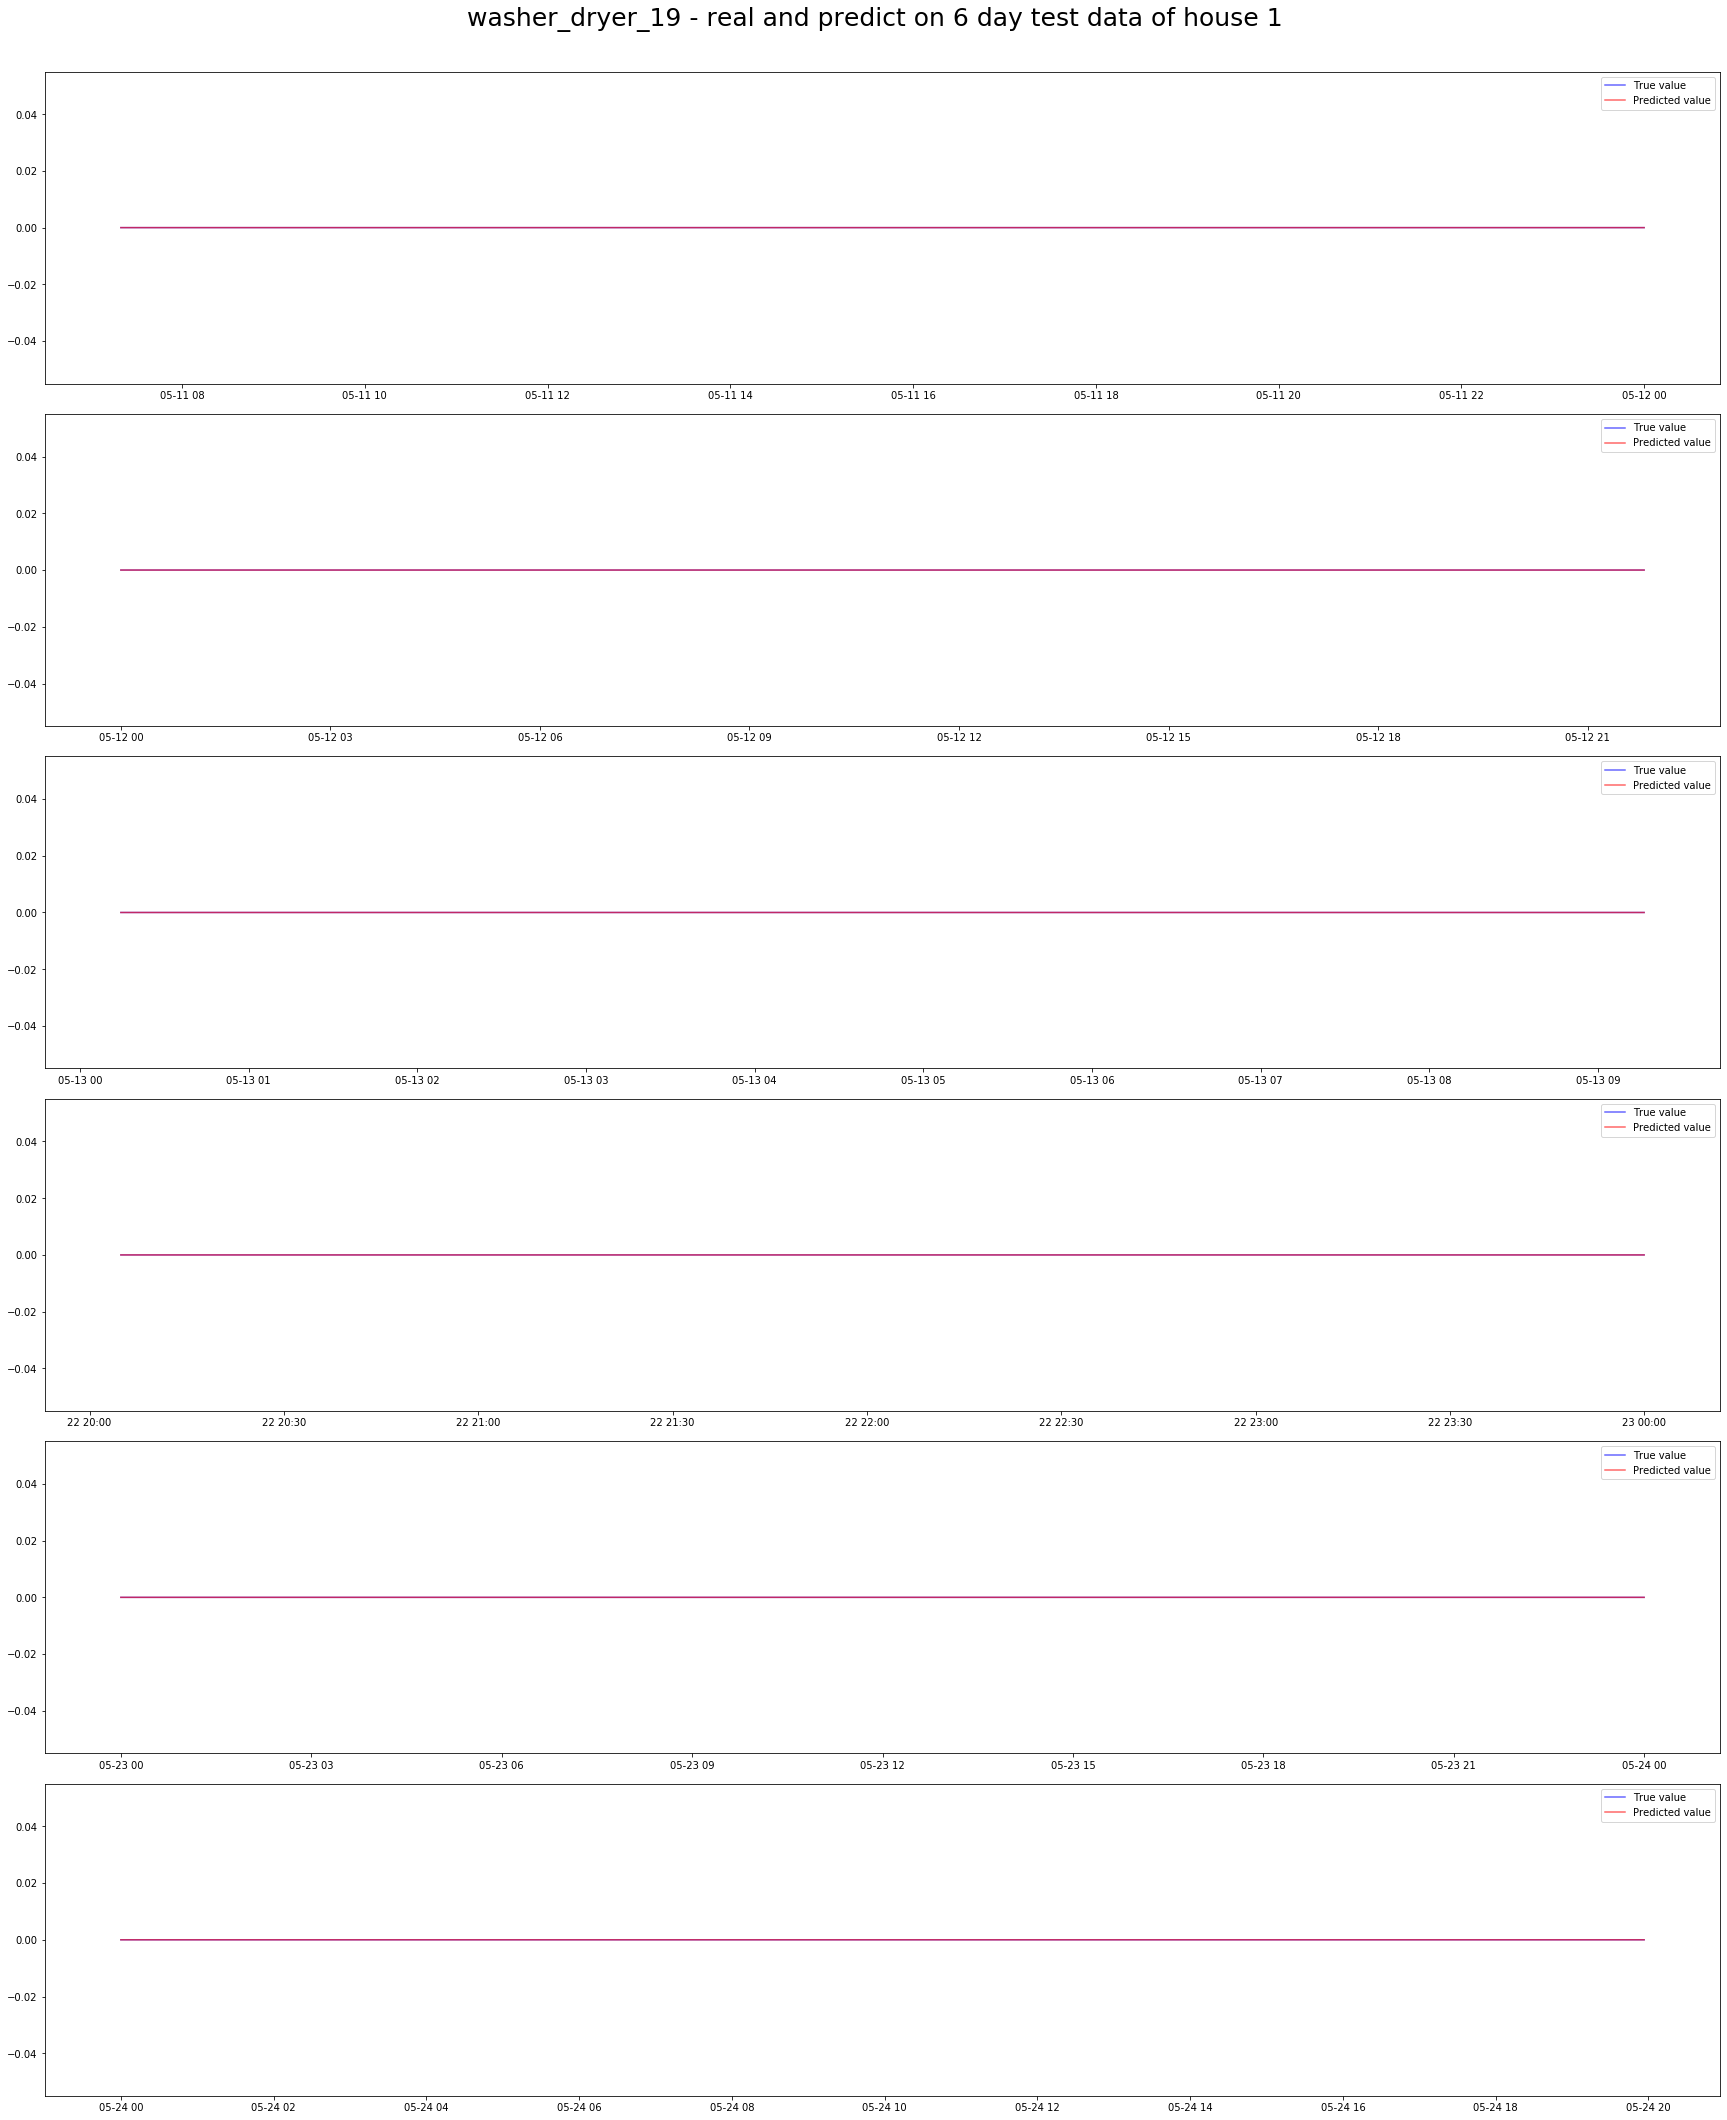

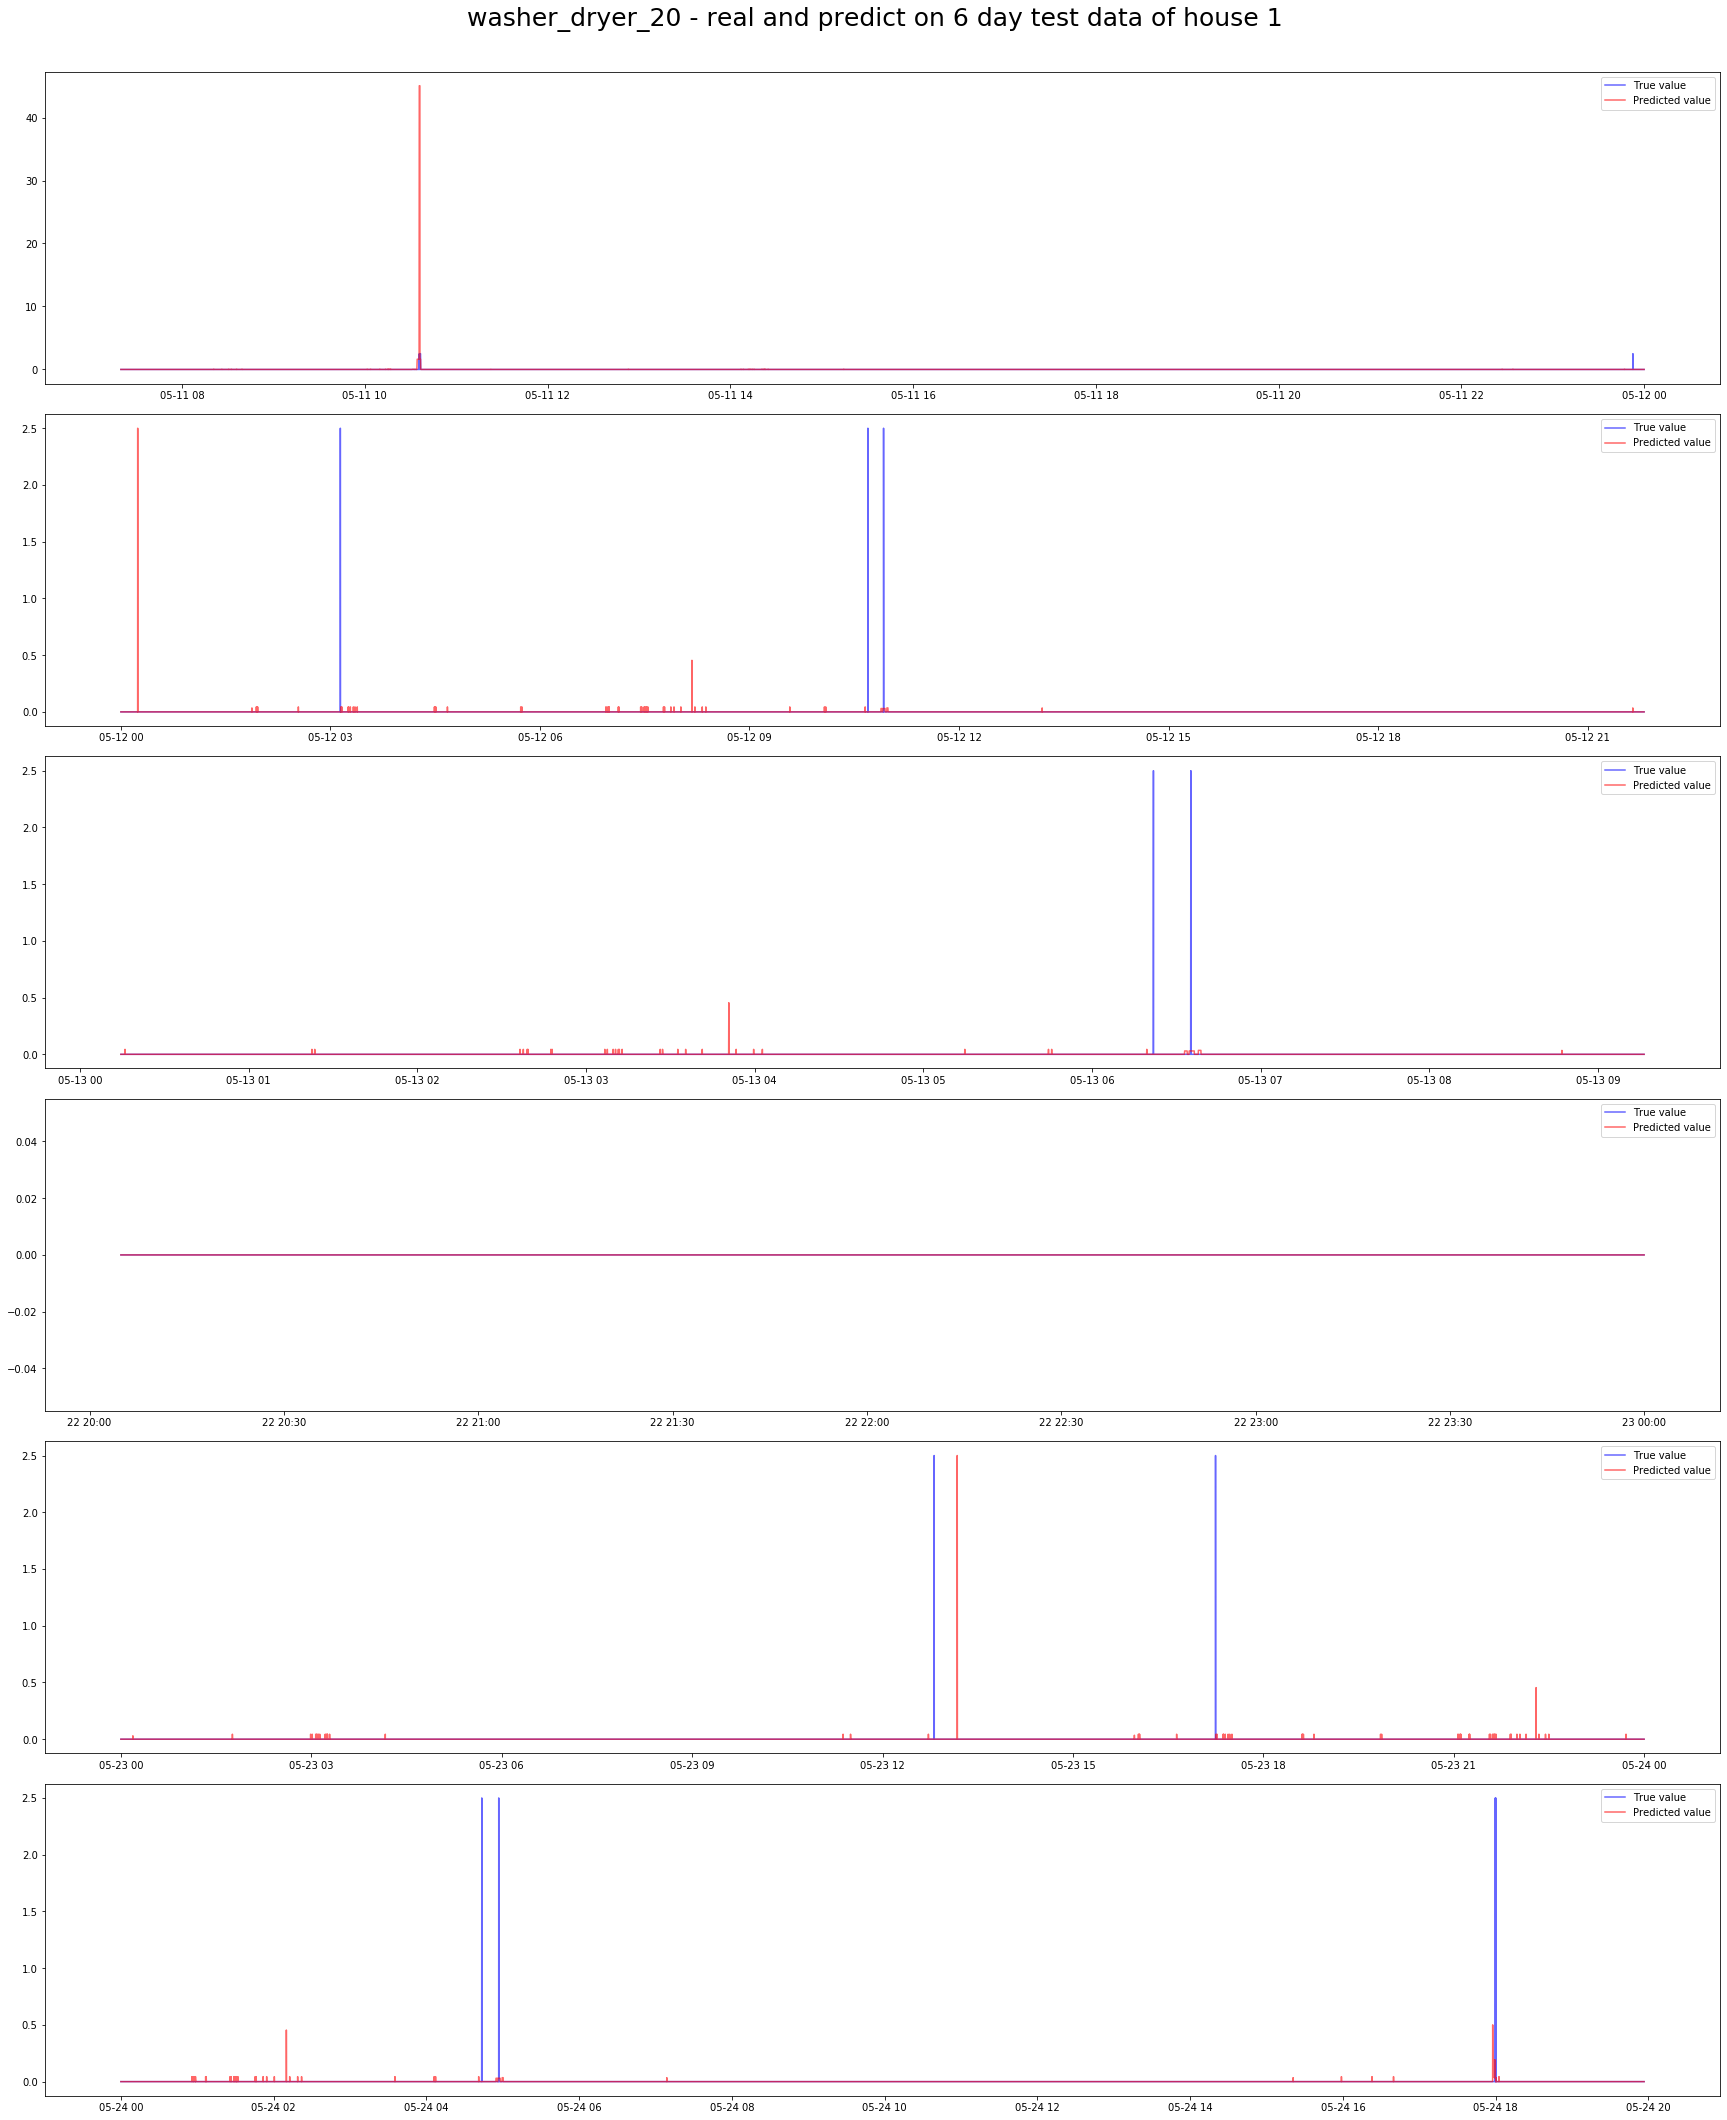

In [23]:
for app in appliances:
    plot_each_app(df1_test, dates[1][17:], mul_pred[app], df1_test[app].values, 
                  '{} - real and predict on 6 day test data of house 1'.format(app))

As we see that the prediction made my the deicision tree are not that good as compared to the real values. This can be because of the decision tree regressor is unable to capture the whole scenario. Thus, the prediction are off when we are predicting the power consumption for house 2 using the training from house 1.


To overcome this and to improve we used neural network predicted using the neural network. We are using a fully connected network for predicting the power consumption for appliances in house 2 using training data from house 1. We are using a 4 layer neural network with activation function as Rectifier Linear Unit(Relu). On the next part we are using a dropout function to prevent overfitting. We have used the "adam" optimizer to reduce the MSE(mean squared error).

We are triaing our model on 31K dataset for 100 epochs and checking on the 10K validation dataset. 

In [25]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
from keras.regularizers import l2

Using TensorFlow backend.


In [26]:
def build_fc_model(layers):
    fc_model = Sequential()
    for i in range(len(layers)-1):
        fc_model.add( Dense(input_dim=layers[i], output_dim= layers[i+1]) )#, W_regularizer=l2(0.1)) )
        fc_model.add( Dropout(0.5) )
        if i < (len(layers) - 2):
            fc_model.add( Activation('relu') )
    fc_model.summary()
    return fc_model
fc_model_1 = build_fc_model([2, 256, 512, 1024, 1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               768       
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)             

In [27]:
adam = Adam(lr = 1e-5)
fc_model_1.compile(loss='mean_squared_error', optimizer=adam)
start = time.time()
checkpointer = ModelCheckpoint(filepath="./fc_refrig_h1_2.hdf5", verbose=0, save_best_only=True)
hist_fc_1 = fc_model_1.fit( X_train1, y_train1,
                    batch_size=512, verbose=1, nb_epoch=100,
                    validation_split=0.33, callbacks=[checkpointer])
print('Finish trainning. Time: ', time.time() - start)

Train on 143926 samples, validate on 70890 samples
Epoch 1/100
143926/143926 [==============================] - 6s 43us/step - loss: 13295.9745 - val_loss: 10153.8778
Epoch 2/100
143926/143926 [==============================] - 7s 47us/step - loss: 12651.0283 - val_loss: 10139.8811
Epoch 3/100
143926/143926 [==============================] - 8s 52us/step - loss: 12031.0337 - val_loss: 9880.8956
Epoch 4/100
143926/143926 [==============================] - 7s 47us/step - loss: 11872.5531 - val_loss: 9905.0940
Epoch 5/100
143926/143926 [==============================] - 7s 46us/step - loss: 11491.2412 - val_loss: 9916.0715
Epoch 6/100
143926/143926 [==============================] - 7s 47us/step - loss: 11308.9914 - val_loss: 9842.8280
Epoch 7/100
143926/143926 [==============================] - 7s 48us/step - loss: 10919.7221 - val_loss: 9777.9032
Epoch 8/100
143926/143926 [==============================] - 8s 52us/step - loss: 10916.3225 - val_loss: 9829.0649
Epoch 9/100
143926/143926 [

In [28]:
fc_model_1 = load_model('fc_refrig_h1_2.hdf5')
pred_fc_1 = fc_model_1.predict(X_test1).reshape(-1)
mse_loss_fc_1 = mse_loss(pred_fc_1, y_test1)
mae_loss_fc_1 = mae_loss(pred_fc_1, y_test1)
print('Mean square error on test set: ', mse_loss_fc_1)
print('Mean absolute error on the test set: ', mae_loss_fc_1)

Mean square error on test set:  10183.924166669156
Mean absolute error on the test set:  51.79708506873318


The results were much accuarate and better for our ANN than just simply using the regressor.

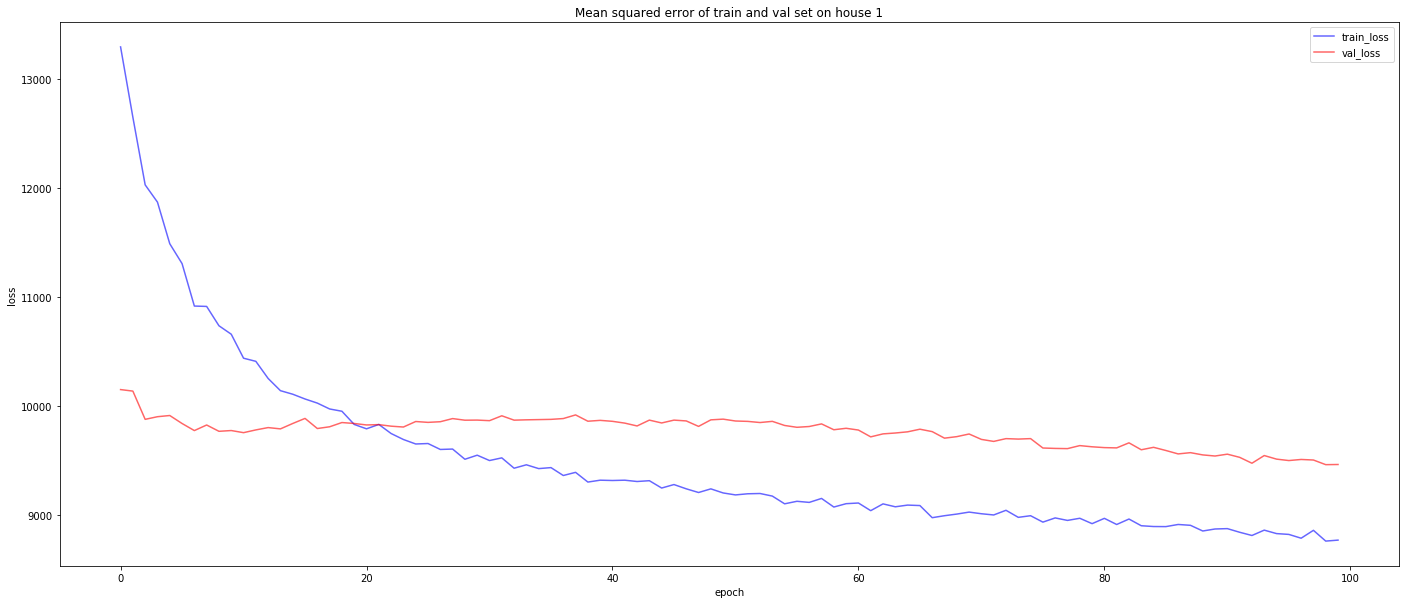

In [30]:
train_loss = hist_fc_1.history['loss']
val_loss = hist_fc_1.history['val_loss']
def plot_losses(train_loss, val_loss):
    plt.rcParams["figure.figsize"] = [24,10]
    plt.title('Mean squared error of train and val set on house 1')
    plt.plot( range(len(train_loss)), train_loss, color = 'b', alpha = 0.6, label='train_loss' )
    plt.plot( range(len( val_loss )), val_loss, color = 'r', alpha = 0.6, label='val_loss' )
    plt.xlabel( 'epoch' )
    plt.ylabel( 'loss' )
    plt.legend()

plot_losses(train_loss, val_loss)

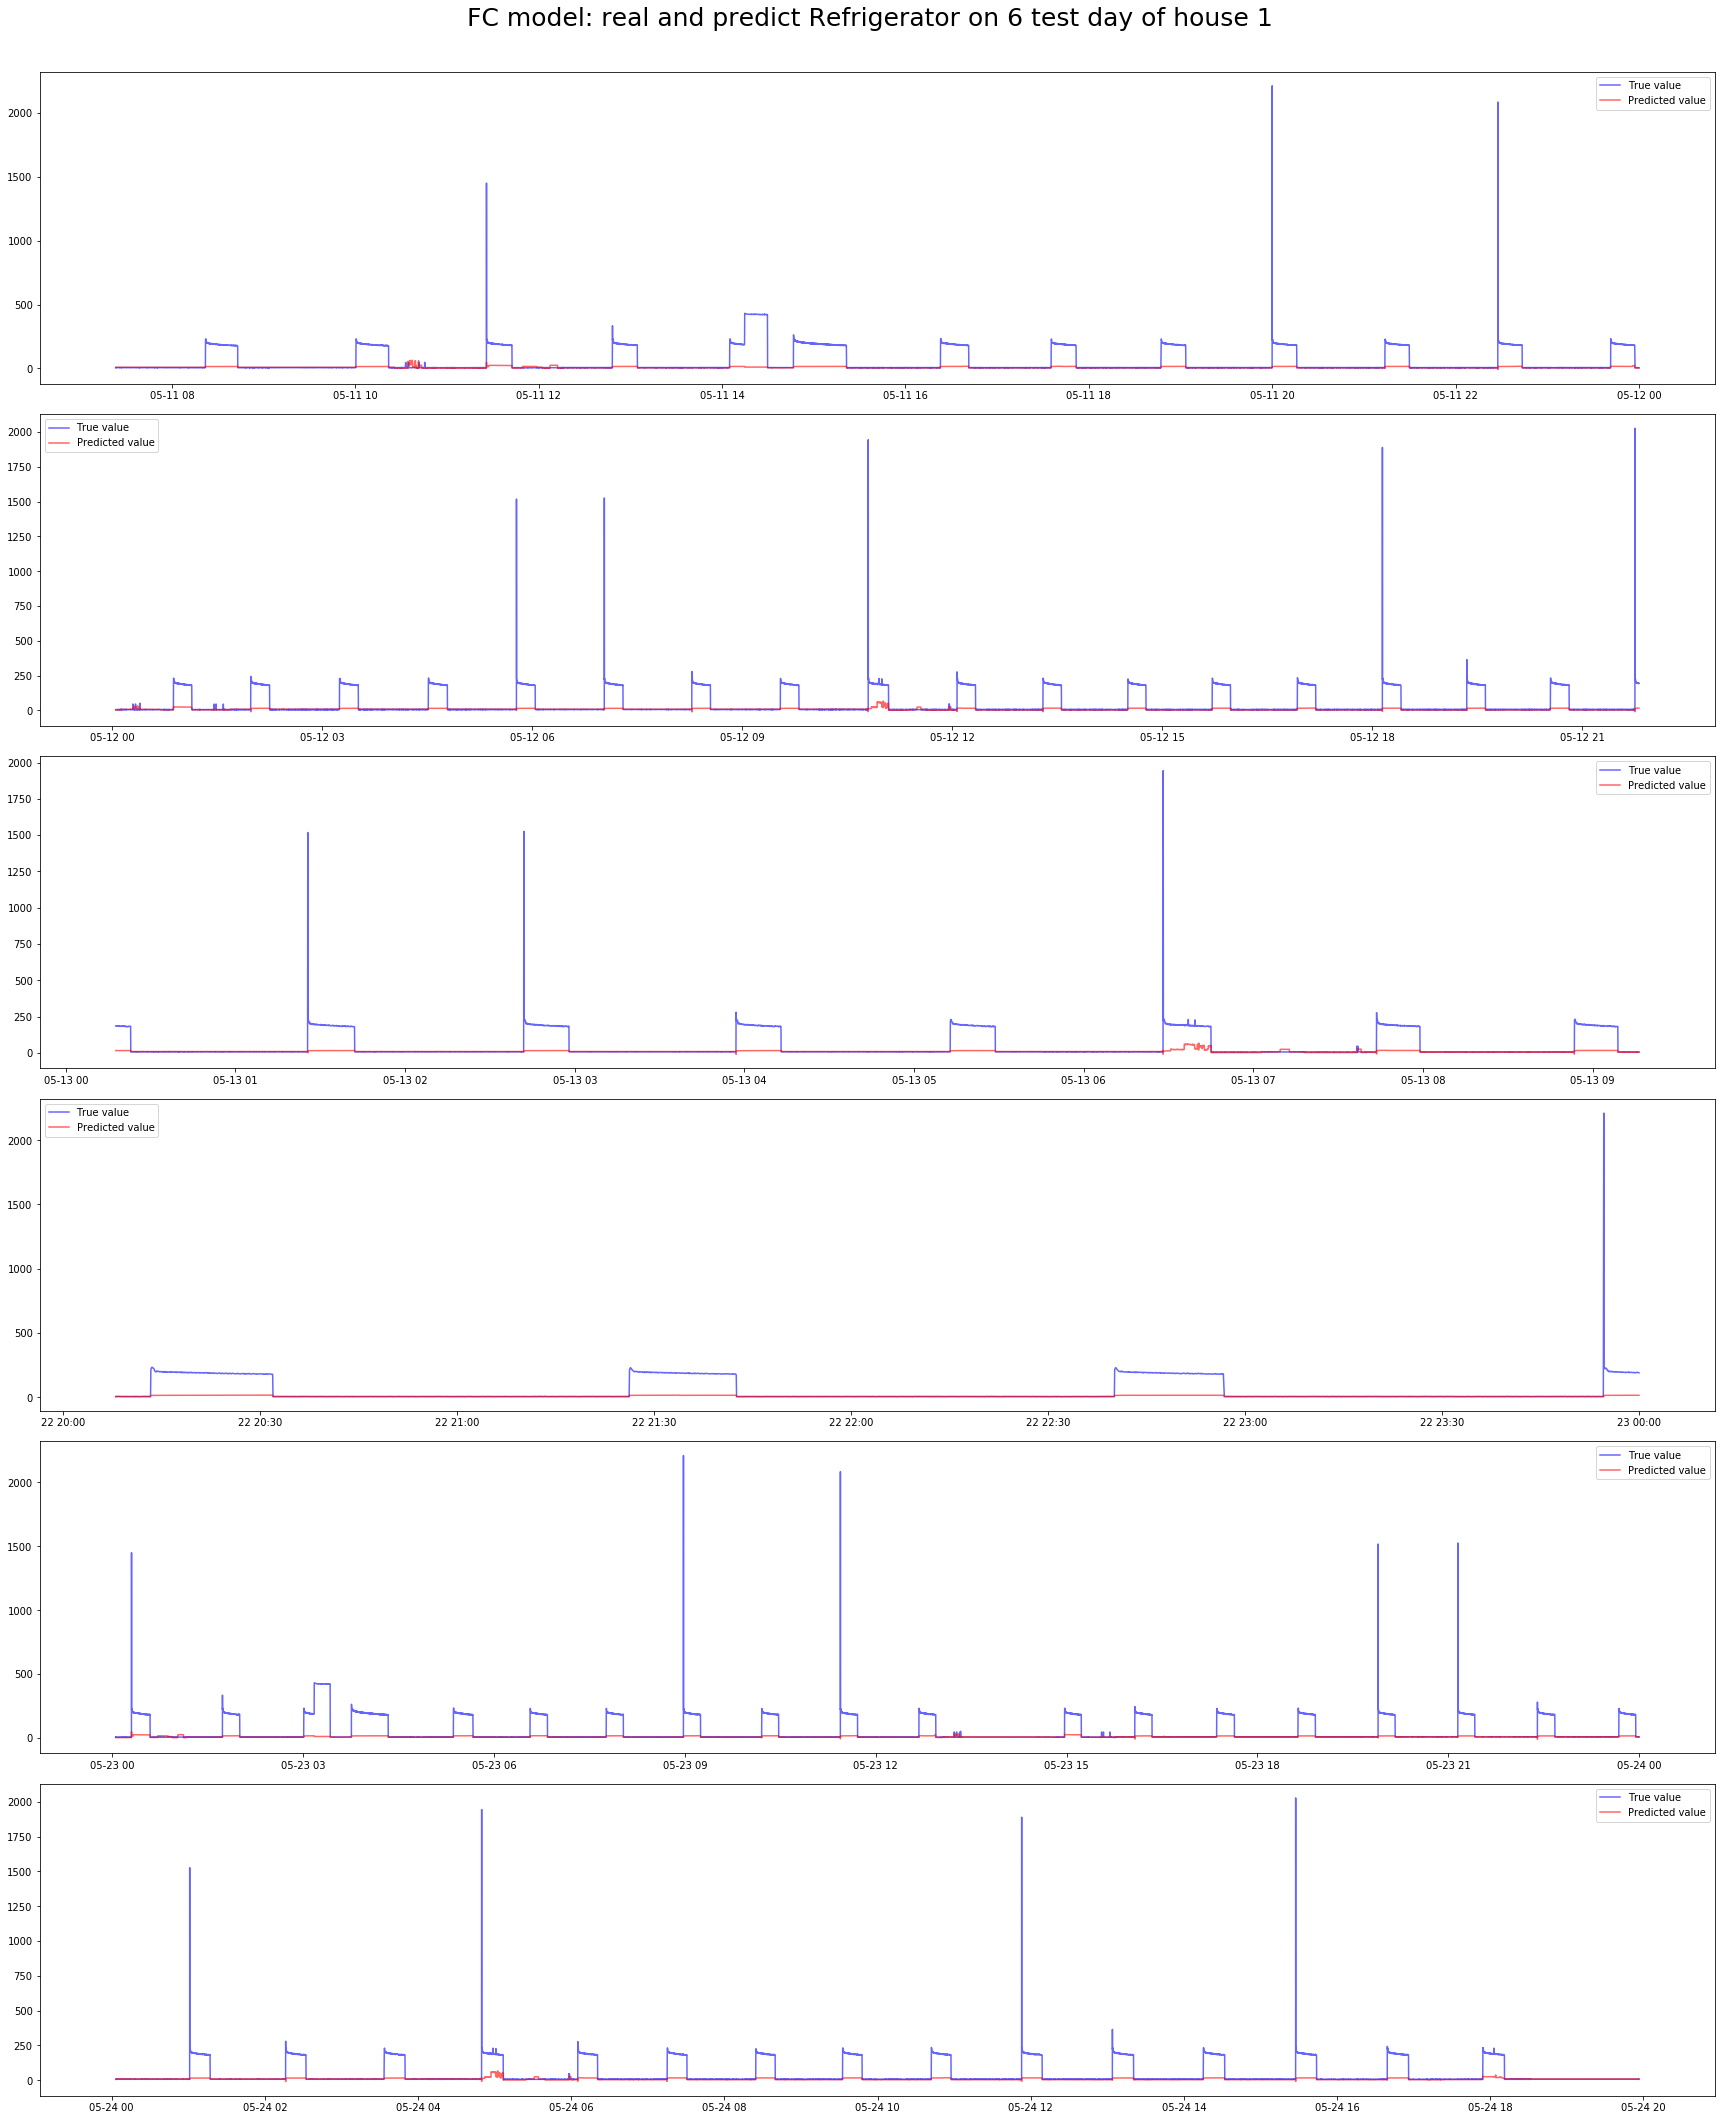

In [31]:
plot_each_app(df1_test, dates[1][17:], pred_fc_1, y_test1, 
              'FC model: real and predict Refrigerator on 6 test day of house 1', look_back = 50)

Testing on House 2

In [32]:
y_pred_fc_2 = fc_model_1.predict(X_2).reshape(-1)
mse_fc_2 = mse_loss(y_pred_fc_2, y_2)
mae_fc_2 = mae_loss(y_pred_fc_2, y_2)
print('Mean square error on test set: ', mse_fc_2)
print('Mean absolute error on the test set: ', mae_fc_2)

Mean square error on test set:  13050.754910763011
Mean absolute error on the test set:  74.76721158005225


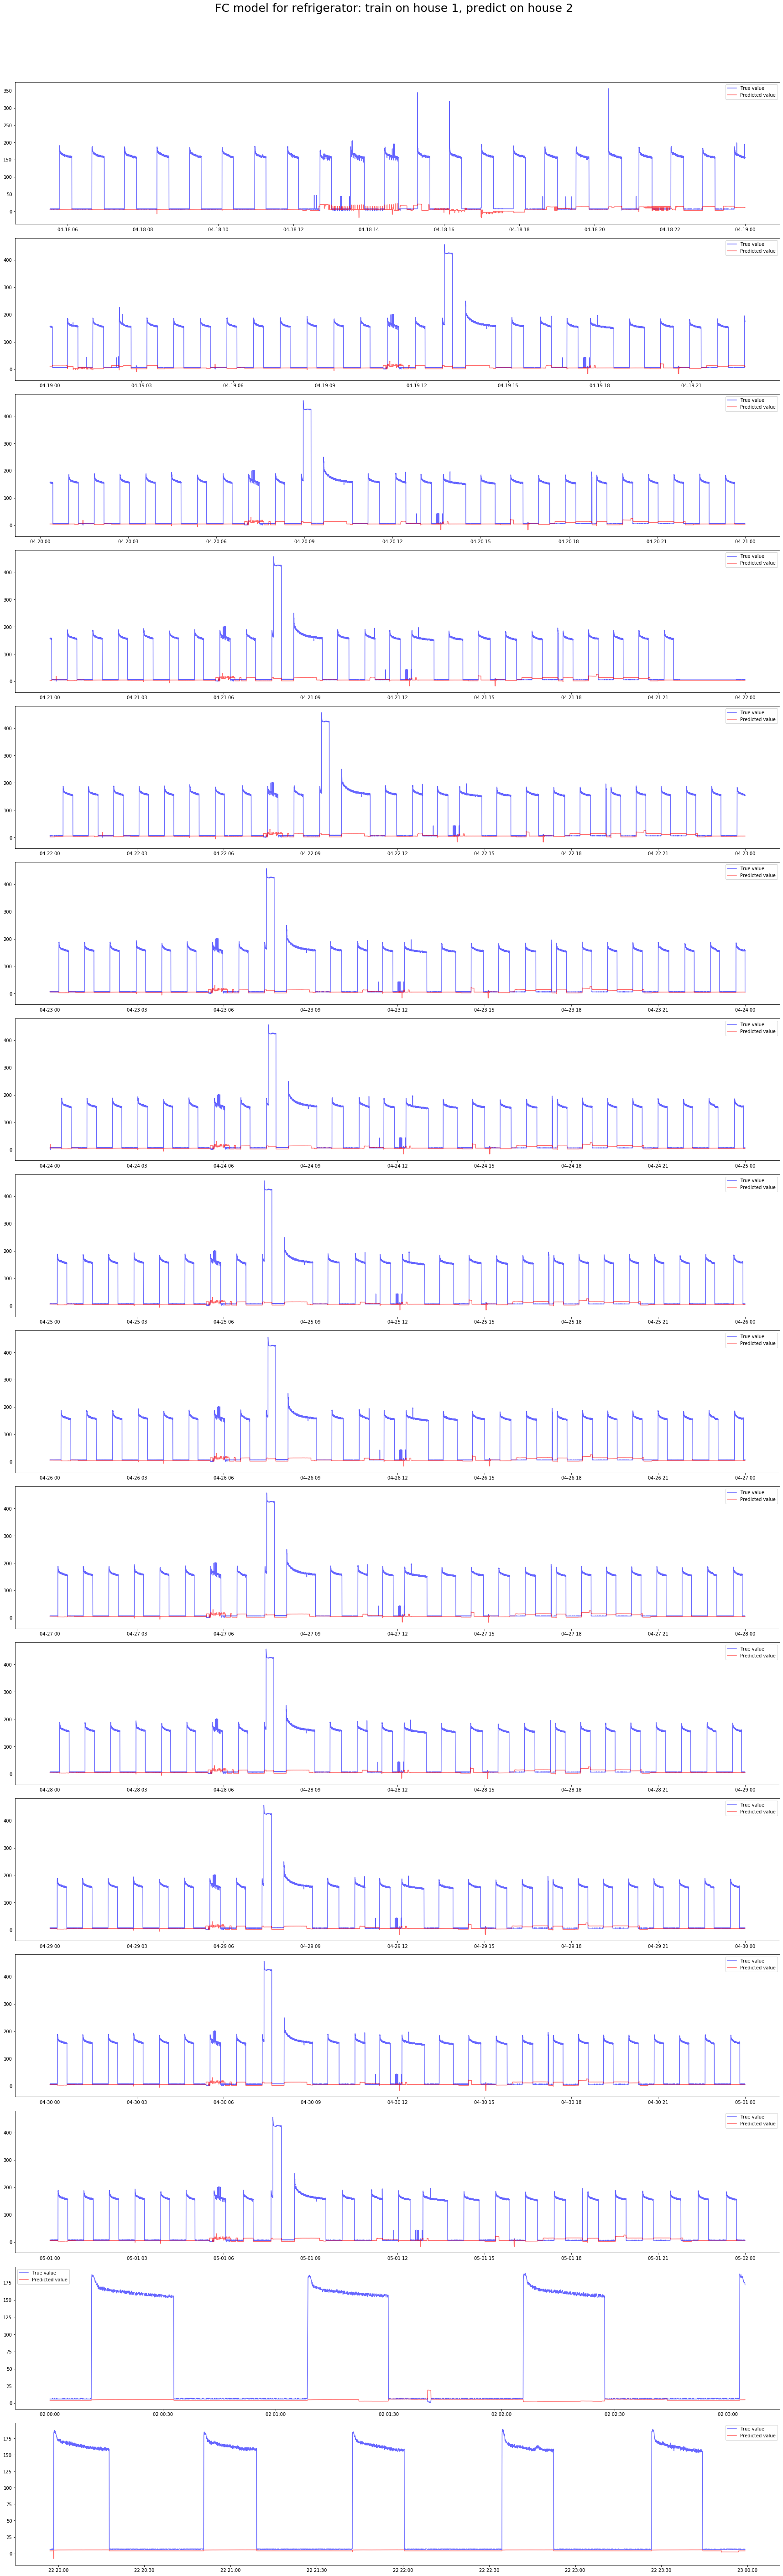

In [33]:
plot_each_app(df[2], dates[2], y_pred_fc_2, y_2, 'FC model for refrigerator: train on house 1, predict on house 2')

Let's use 50 consecutive total consumtions to predict energy consumption of each appliance

We used our ANN to predict the power consumption for refrigerator on House_2 by training our model only on House 1 

In [35]:
def process_data(df, dates, x_features, y_features, look_back = 50):
    i = 0
    for date in dates:
        data = df.ix[date]
        len_data = data.shape[0]
        x = np.array([data[x_features].values[i:i+look_back] 
                      for i in range(len_data - look_back) ]).reshape(-1,look_back, 2)
        y = data[y_features].values[look_back:,:]
        if i == 0:
            X = x
            Y = y
        else:
            X = np.append(X, x, axis=0)
            Y = np.append(Y, y, axis=0)
        i += 1
    return X,Y

In [36]:
start = time.time()
X_train, y_train = process_data(df[1], dates[1][:17], ['mains_1','mains_2'], df[1].columns.values[2:])
X_test, y_test = process_data(df[1], dates[1][17:], ['mains_1','mains_2'], df[1].columns.values[2:])
print('Process data time: ', time.time() - start)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Process data time:  1171.3397381305695
(318841, 50, 2) (318841, 18) (86757, 50, 2) (86757, 18)


In [37]:
fc_model = build_fc_model([100, 256, 512, 1024, 1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               25856     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)             

In [38]:
# Let's flatten data to feed into fc model
X_train_fc = X_train.reshape(-1, 100)
y_train_fc = y_train[:,2]
print(X_train_fc.shape, y_train_fc.shape)

(318841, 100) (318841,)


In [39]:
adam = Adam(lr = 1e-5)
fc_model.compile(loss='mean_squared_error', optimizer=adam)
start = time.time()
checkpointer = ModelCheckpoint(filepath="./fc_refrig_h1.hdf5", verbose=0, save_best_only=True)
hist_fc2 = fc_model.fit( X_train_fc, y_train_fc,
                    batch_size=512, verbose=1, nb_epoch= 100,
                    validation_split=0.33, callbacks=[checkpointer])
print('Finish trainning. Time: ', time.time() - start)

Train on 213623 samples, validate on 105218 samples
Epoch 1/100
213623/213623 [==============================] - 11s 54us/step - loss: 96727.0065 - val_loss: 28199.2121
Epoch 2/100
213623/213623 [==============================] - 11s 50us/step - loss: 72846.3818 - val_loss: 22221.9019
Epoch 3/100
213623/213623 [==============================] - 11s 52us/step - loss: 56172.2855 - val_loss: 17442.7224
Epoch 4/100
213623/213623 [==============================] - 10s 48us/step - loss: 47051.7739 - val_loss: 16059.1823
Epoch 5/100
213623/213623 [==============================] - 10s 48us/step - loss: 38480.6974 - val_loss: 13679.5450
Epoch 6/100
213623/213623 [==============================] - 10s 49us/step - loss: 31170.1772 - val_loss: 12131.3253
Epoch 7/100
213623/213623 [==============================] - 10s 48us/step - loss: 29112.9685 - val_loss: 11830.0622
Epoch 8/100
213623/213623 [==============================] - 11s 50us/step - loss: 24764.9514 - val_loss: 11594.7950
Epoch 9/100


Epoch 71/100
213623/213623 [==============================] - 11s 52us/step - loss: 8317.6470 - val_loss: 7313.6145
Epoch 72/100
213623/213623 [==============================] - 11s 52us/step - loss: 8261.6771 - val_loss: 7202.8858
Epoch 73/100
213623/213623 [==============================] - 11s 52us/step - loss: 8268.4920 - val_loss: 7300.4963
Epoch 74/100
213623/213623 [==============================] - 11s 52us/step - loss: 8265.2350 - val_loss: 7400.9596
Epoch 75/100
213623/213623 [==============================] - 11s 51us/step - loss: 8226.5968 - val_loss: 7149.4102
Epoch 76/100
213623/213623 [==============================] - 11s 52us/step - loss: 8234.9895 - val_loss: 7283.6098
Epoch 77/100
213623/213623 [==============================] - 11s 50us/step - loss: 8227.1656 - val_loss: 7176.4897
Epoch 78/100
213623/213623 [==============================] - 11s 50us/step - loss: 8250.9530 - val_loss: 7236.5222
Epoch 79/100
213623/213623 [==============================] - 11s 52us/s

Increasing the number of Hidden layers in our Network and training it with 100 epochs and we found out that over the time the validation error and the train error is reducing and becomes almost which is sign that our model is well trained. However, if overdoing it may cause our model to overfit.

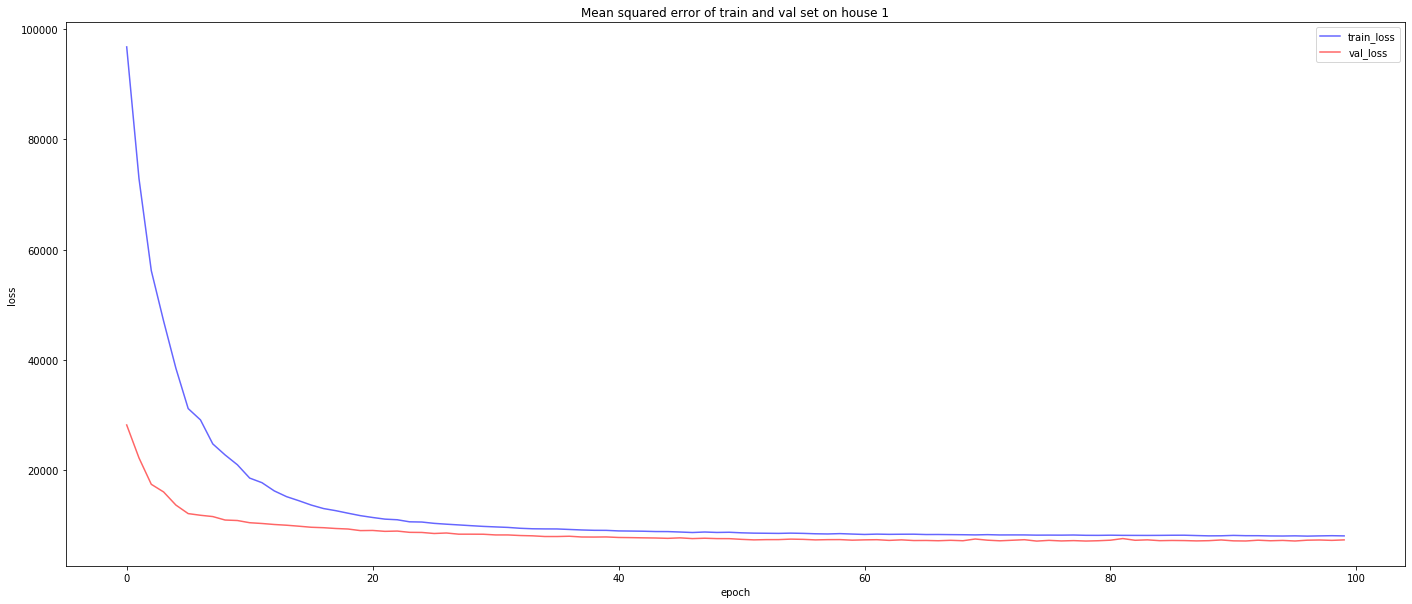

In [41]:
train_loss = hist_fc2.history['loss']
val_loss = hist_fc2.history['val_loss']

plot_losses(train_loss, val_loss)

In [42]:
fc_model = load_model('fc_refrig_h1.hdf5')
pred_fc = fc_model.predict(X_test.reshape(-1, 100)).reshape(-1)
print(pred_fc.shape)

(86757,)


In [43]:
mse_loss_fc = mse_loss(pred_fc, y_test[:,2])
mae_loss_fc = mae_loss(pred_fc, y_test[:,2])
print('Mean square error on test set: ', mse_loss_fc)
print('Mean absolute error on the test set: ', mae_loss_fc)

Mean square error on test set:  8238.155611779044
Mean absolute error on the test set:  46.51569396473918


The prediction values improved by increasing the number of hidden layers.

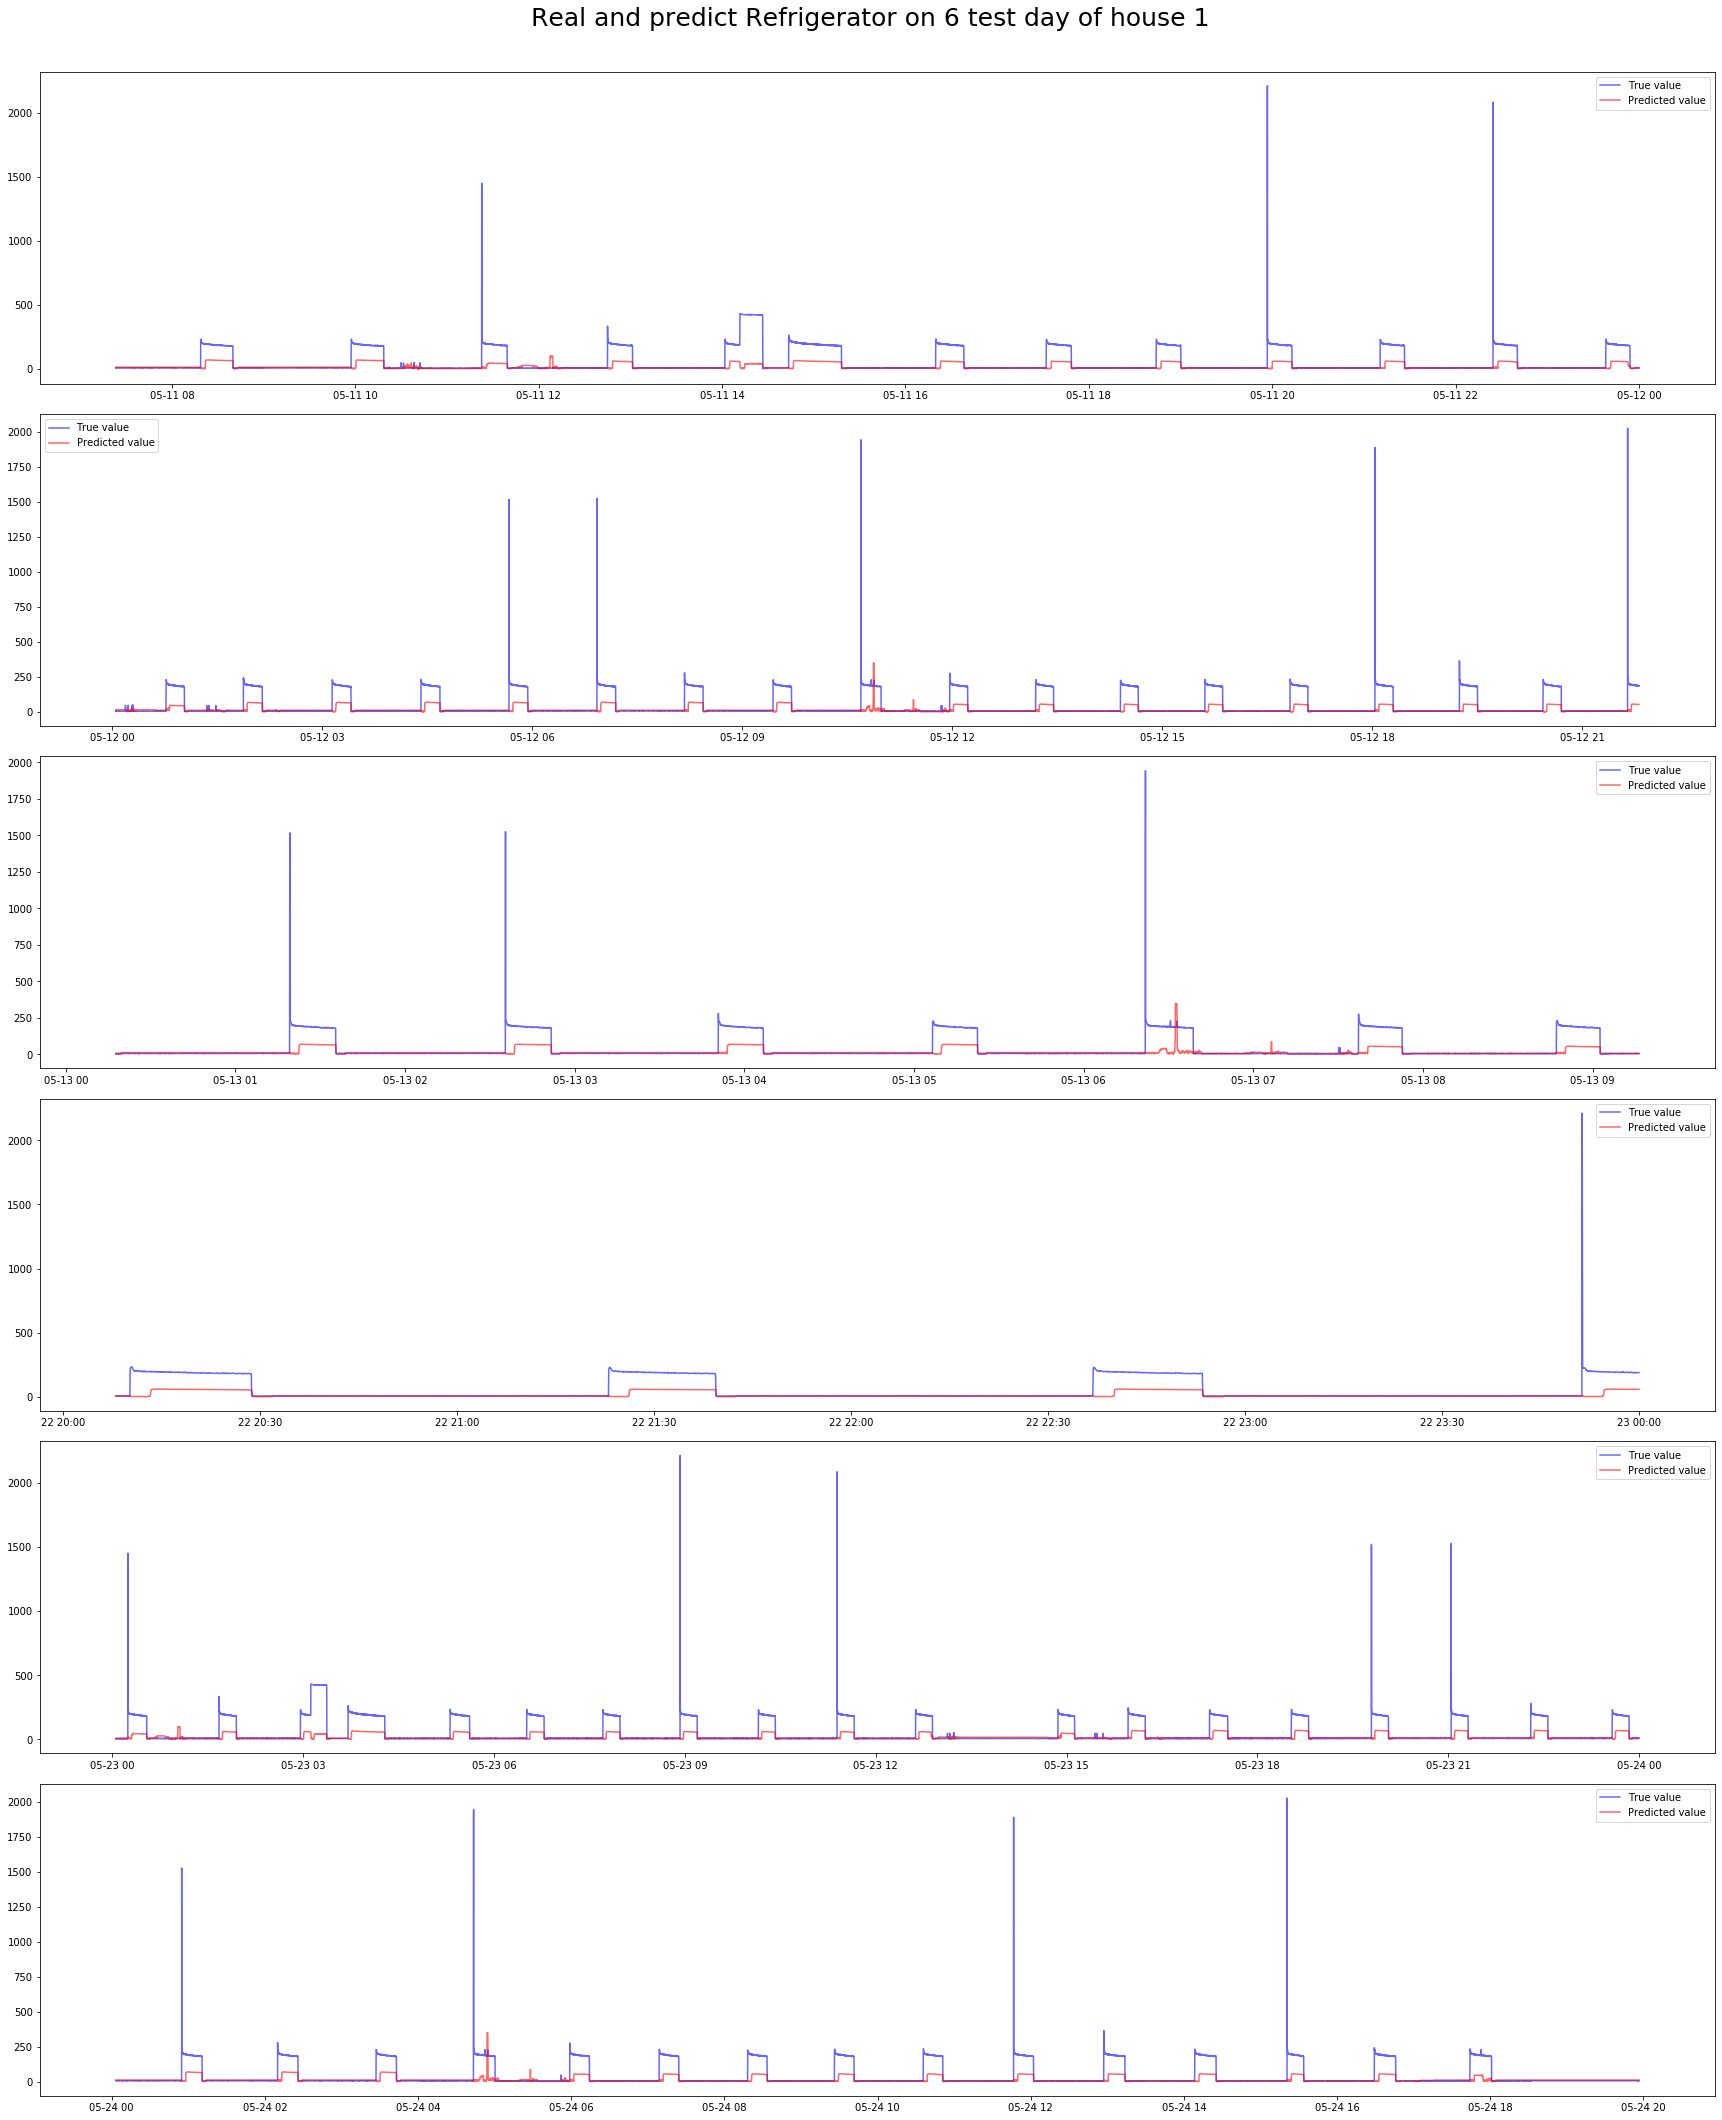

In [45]:
plot_each_app(df1_test, dates[1][17:], pred_fc, y_test[:,2], 
              'Real and predict Refrigerator on 6 test day of house 1', look_back = 50)

Test on house 2

In [46]:
start = time.time()
X_2, y_2 = process_data(df[2], dates[2], ['mains_2','mains_1'], ['refrigerator_9'])
X_2_fc = X_2.reshape(-1, 100)
y_2 = y_2.reshape(-1)
print('Process data time: ', time.time() - start)
print(X_2_fc.shape, y_2.shape)

Process data time:  548.3460772037506
(316040, 100) (316040,)


In [47]:
pred_fc_50_h2 = fc_model.predict(X_2_fc).reshape(-1)
mse_loss_fc_50_2 = mse_loss(pred_fc_50_h2, y_2)
mae_loss_fc_50_2 = mae_loss(pred_fc_50_h2, y_2)
print('Mean square error on test set: ', mse_loss_fc_50_2)
print('Mean absolute error on the test set: ', mae_loss_fc_50_2)

Mean square error on test set:  11870.825992026372
Mean absolute error on the test set:  71.3094492538745


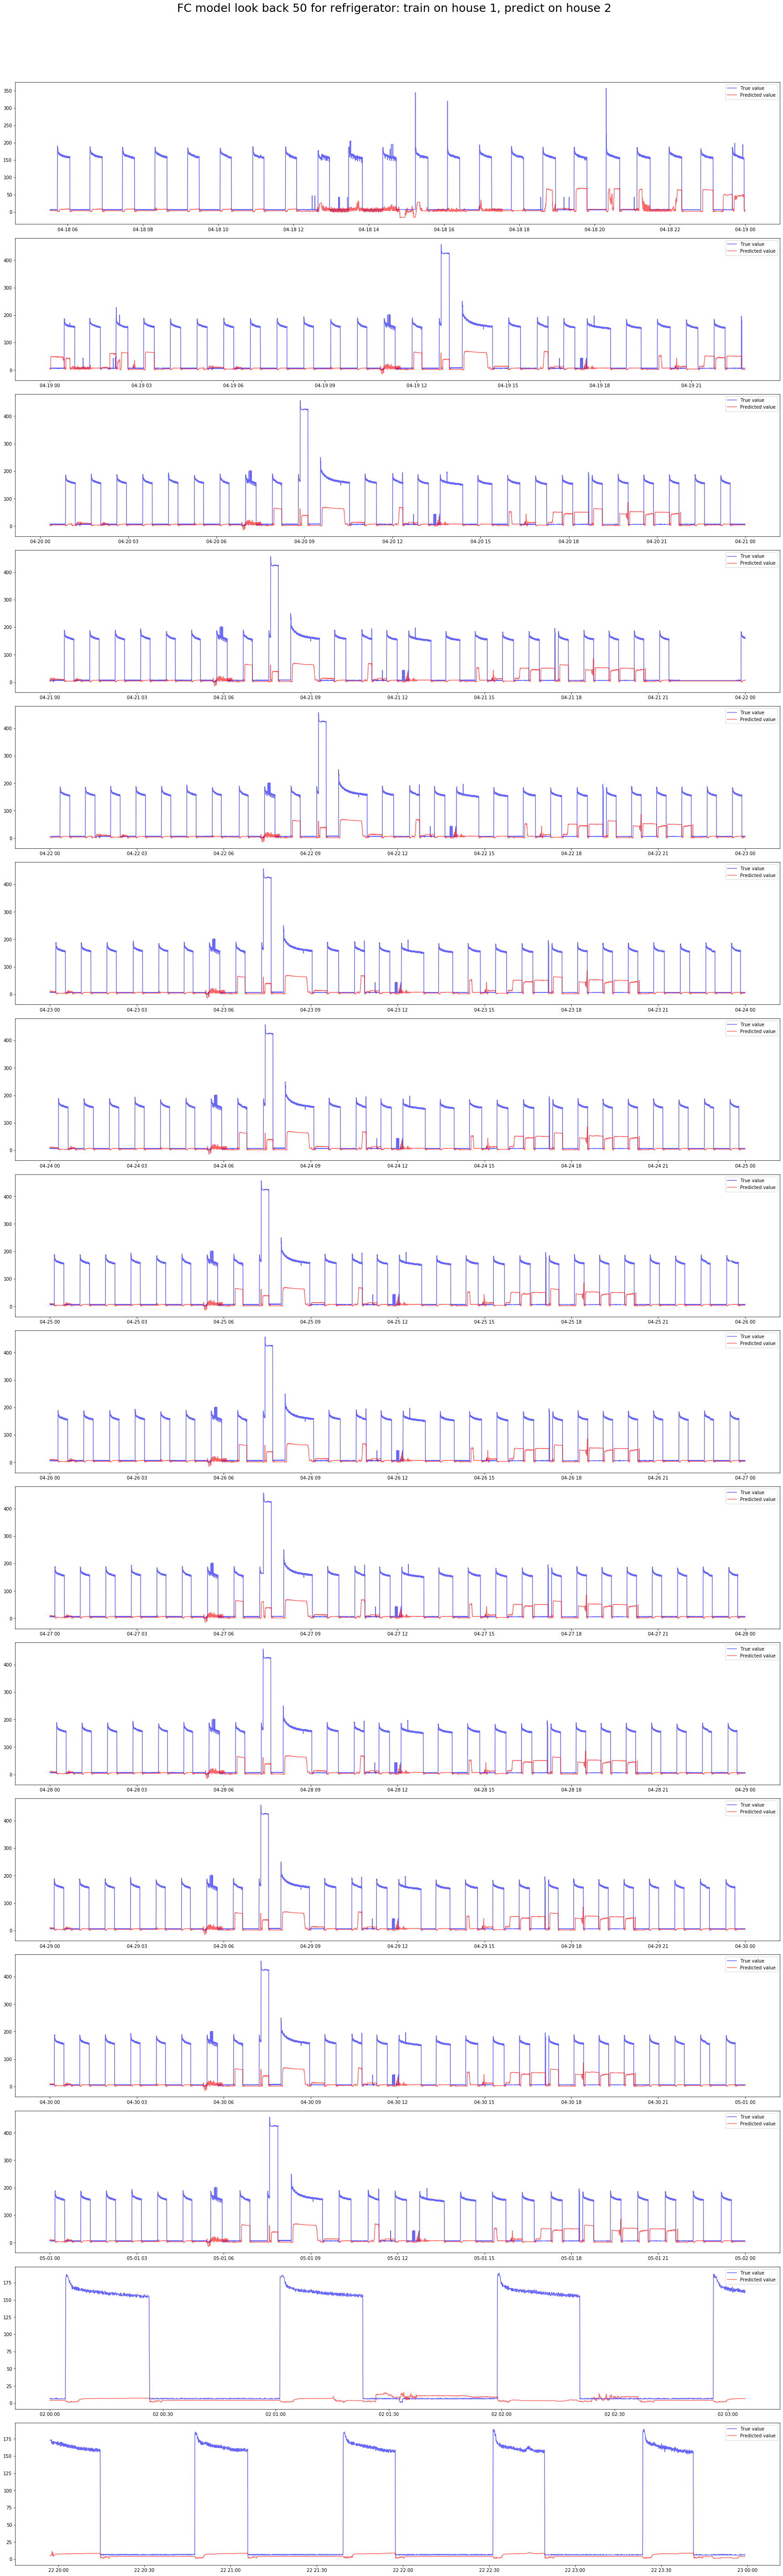

In [48]:
plot_each_app(df[2], dates[2], pred_fc_50_h2, y_2, 'FC model look back 50 for refrigerator: train on house 1, predict on house 2')


Similarly, the prediction on House 2 improved if increase the number of epochs and hidden layers in our Neural network.

We realised that just applying simple neura network is not enough because the neurons are unable to capture the long term dependencies and are predicting poorly for a longer duration of time. This issue can be resloved if add a functionality to retain these long term dependecies somehow.Luckily, the LSTM
Long Short Term Dependencies is a type of Recurrent Neural Network which can retain these dependencies by carrying them forward to the next neuron as an input. We tried using LSTM model using 3 LSTM layers one Output layer and a dropout function to prevent overfitting. Secondly, we used the "adam" optimizer here as well, to reduce the MSE.  

In [50]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
from keras.regularizers import l2

LSTM model

In [51]:
def _getStepTrainTest(step_size, train_close, test_close):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range (step_size, (train_close.shape[0])): 
        x_train.append(train_close[i-step_size:i,0]) 
        y_train.append(train_close[i,0])
    x_train,y_train = np.array(x_train),np.array(y_train)
    x_train = np.expand_dims(x_train, axis = 1)
    for i in range (step_size, (test_close.shape[0])): 
        x_test.append(test_close[i-step_size:i,0]) 
    x_test = np.array(x_test)
    x_test = np.expand_dims(x_test, axis = 1)
    
    return x_train, y_train, x_test

In [52]:
y_train1 = y_train1.reshape(-1,1)

In [53]:
y_test1 = y_test1.reshape(-1,1)

In [54]:
step_size = 1
x_train, y_train, x_test = _getStepTrainTest(step_size, y_train1, y_test1)

In [55]:
model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units =1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [56]:
start = time.time()
adam = Adam(lr = 1e-3)
model.compile(loss='mean_squared_error', optimizer=adam)
checkpointer = ModelCheckpoint(filepath="./lstm_model.hdf5", verbose=0, save_best_only=True)
hist_lstm = model.fit(
            x_train,
            y_train,
            batch_size=32,
            verbose=1,
            nb_epoch=10,
            validation_split=0.3,
            callbacks=[checkpointer])
print('Finish trainning. Time: ', time.time() - start)

Train on 150370 samples, validate on 64445 samples
Epoch 1/10
150370/150370 [==============================] - 24s 160us/step - loss: 4693.0876 - val_loss: 1290.4591
Epoch 2/10
150370/150370 [==============================] - 21s 138us/step - loss: 1180.7795 - val_loss: 828.5638
Epoch 3/10
150370/150370 [==============================] - 22s 145us/step - loss: 1081.2947 - val_loss: 823.8920
Epoch 4/10
150370/150370 [==============================] - 23s 150us/step - loss: 1066.3404 - val_loss: 786.2701
Epoch 5/10
150370/150370 [==============================] - 23s 154us/step - loss: 944.0276 - val_loss: 714.3217
Epoch 6/10
150370/150370 [==============================] - 20s 135us/step - loss: 844.6948 - val_loss: 672.9491
Epoch 7/10
150370/150370 [==============================] - 24s 157us/step - loss: 770.1350 - val_loss: 644.3339
Epoch 8/10
150370/150370 [==============================] - 21s 137us/step - loss: 722.4282 - val_loss: 751.3079
Epoch 9/10
150370/150370 [==============

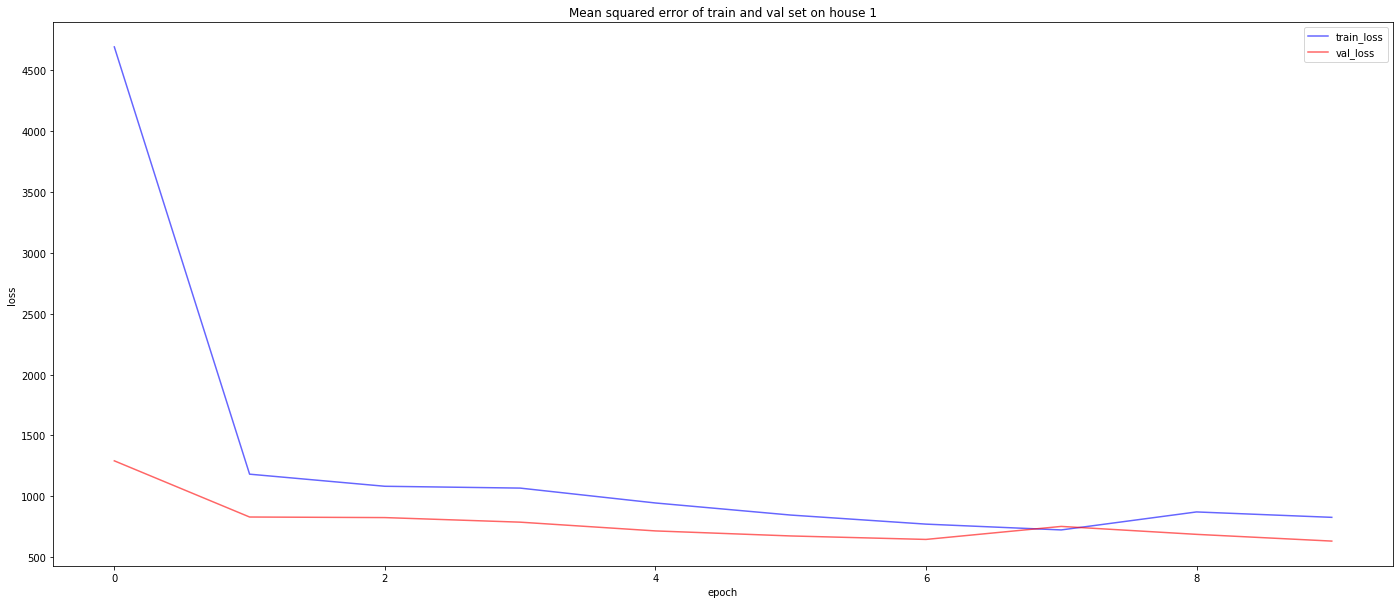

In [57]:
train_loss = hist_lstm.history['loss']
val_loss = hist_lstm.history['val_loss']


plot_losses(train_loss, val_loss)

Just with 10 epochs, we can see that the loss has reduced tremendously. Which makes LSTM model ideal for timeseries data prediction.

In [58]:
model = load_model('lstm_model.hdf5')
pred_lstm = model.predict(x_test)
print(pred_lstm.shape)

(87056, 1)


In [59]:
y_test1[:-1].shape

(87056, 1)

In [60]:
mse_loss_lstm = mse_loss(pred_lstm, y_test1[:-1])
mae_loss_lstm = mae_loss(pred_lstm, y_test1[:-1])
print('Mean square error on test set: ', mse_loss_lstm)
print('Mean absolute error on the test set: ', mae_loss_lstm)

Mean square error on test set:  430.14445159009415
Mean absolute error on the test set:  3.6505560569685622


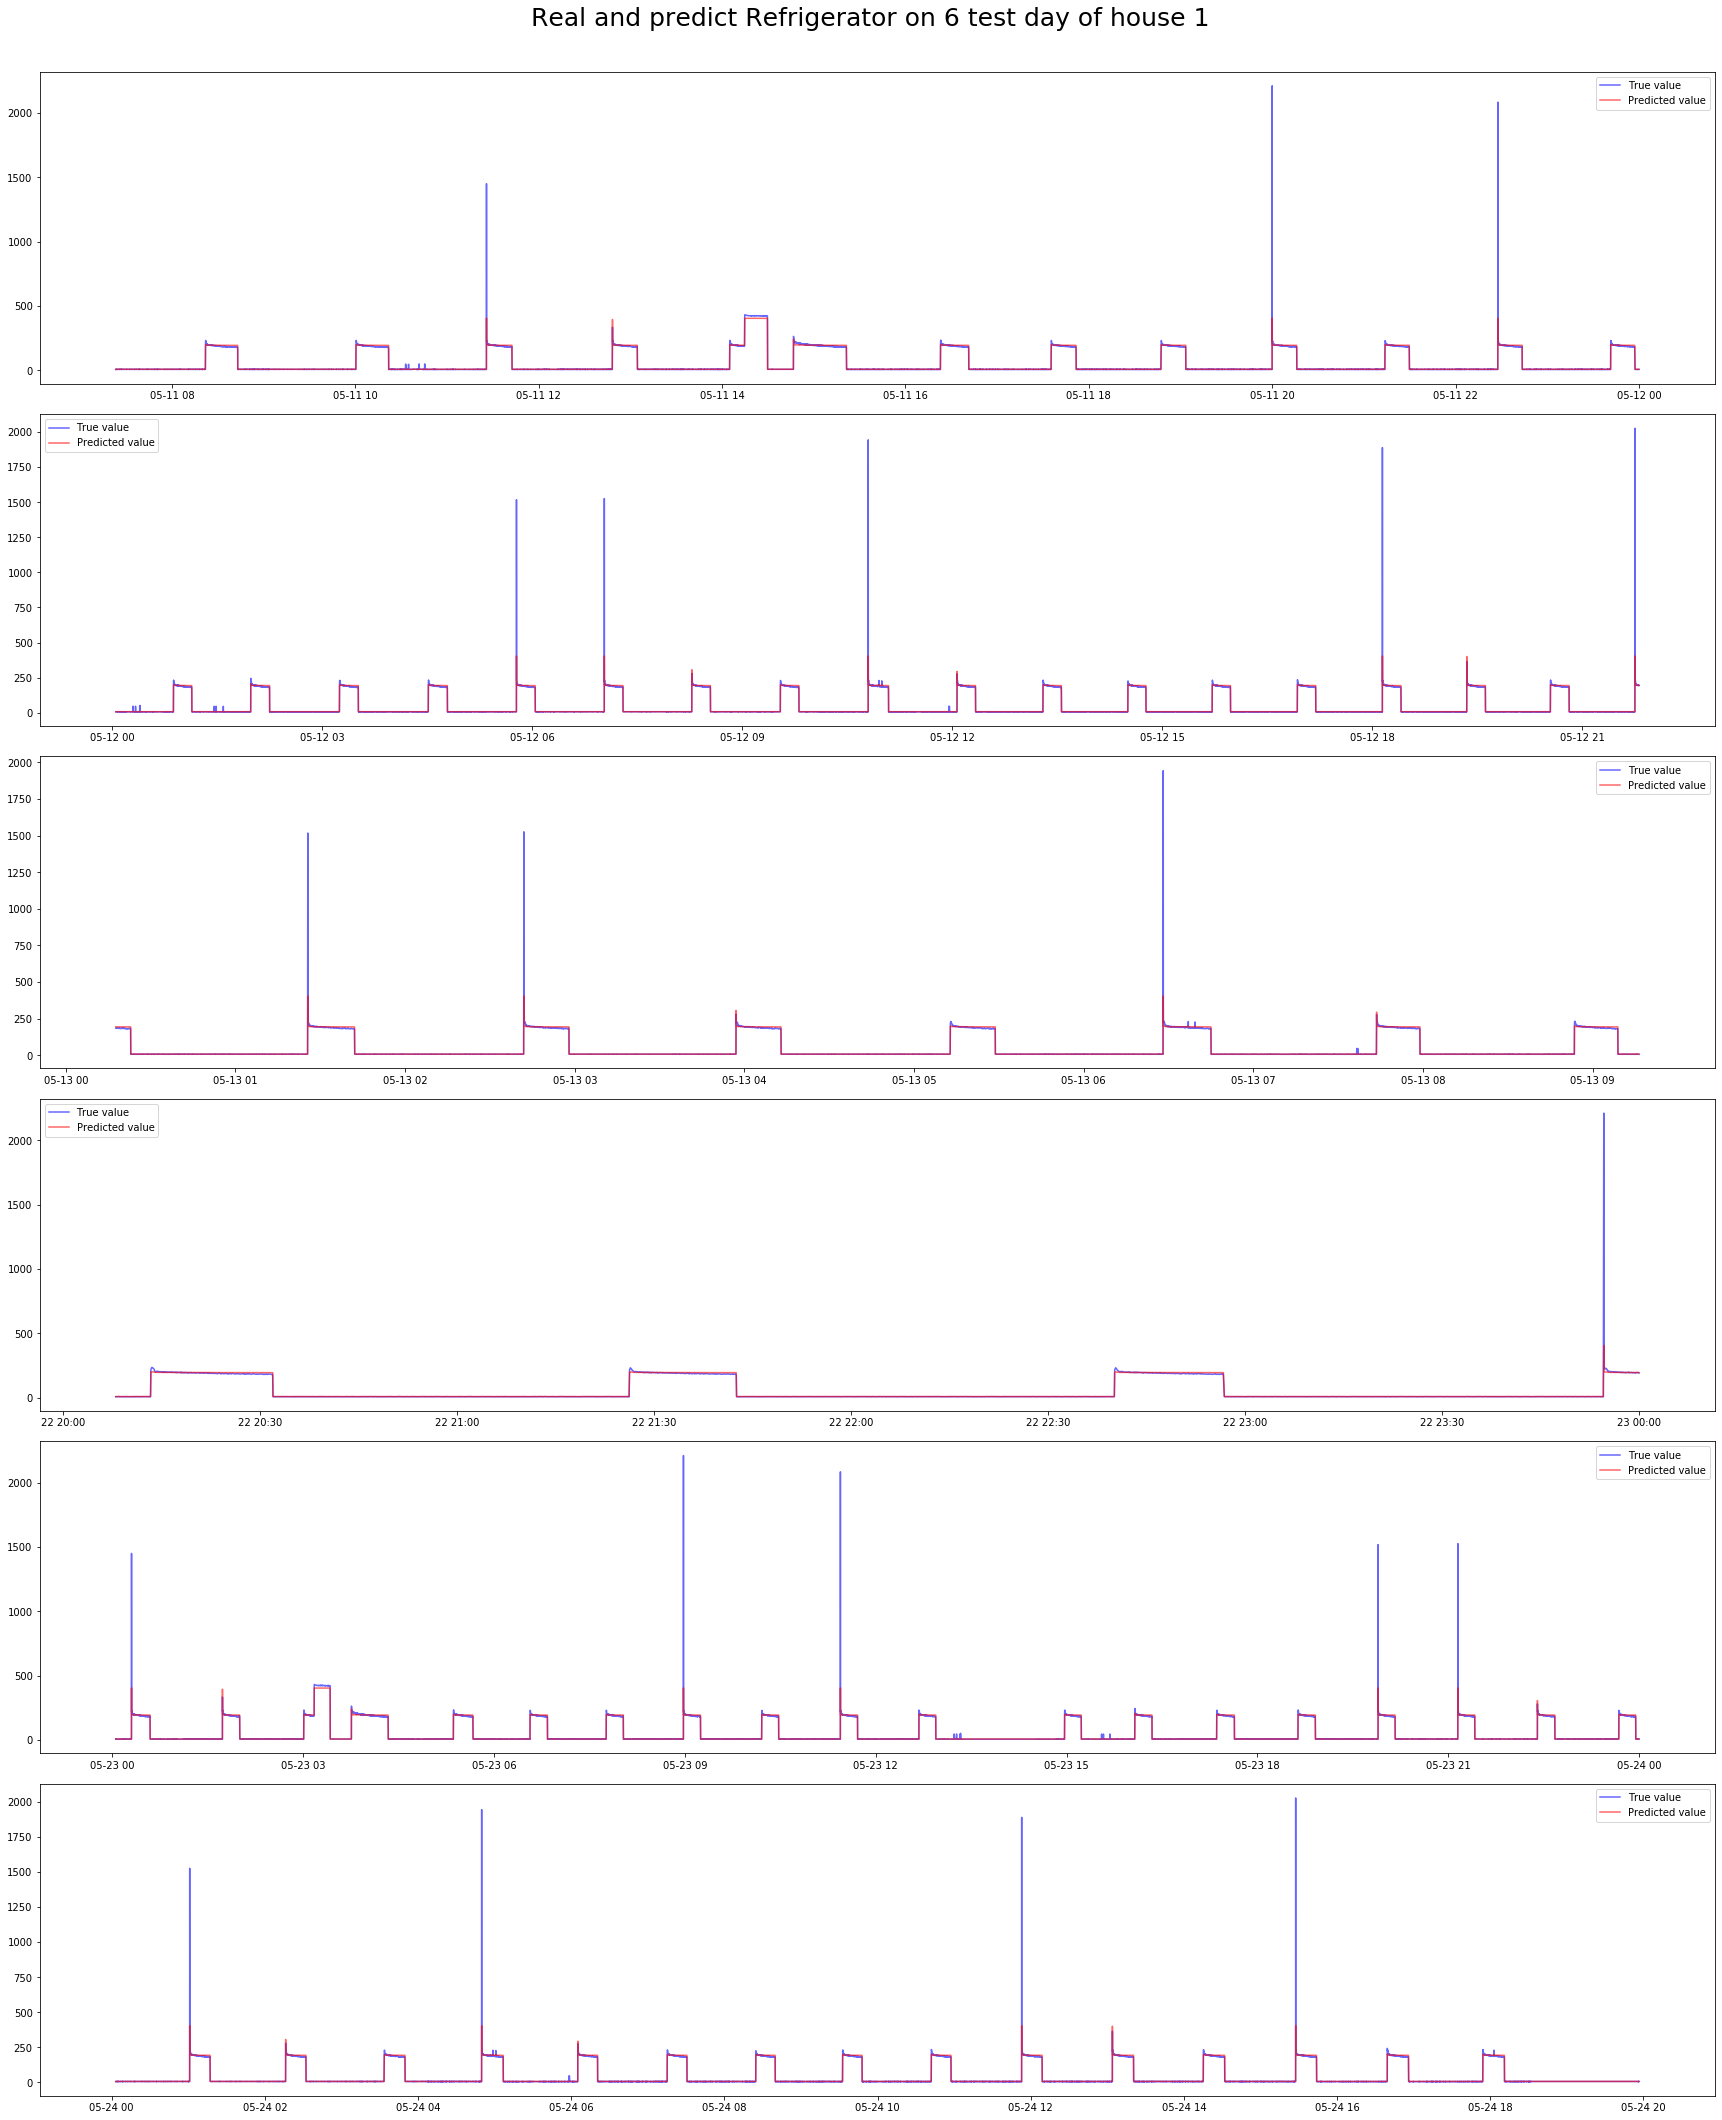

In [61]:
plot_each_app(df1_test, dates[1][17:], pred_lstm, y_test1[:-1], 
              'Real and predict Refrigerator on 6 test day of house 1', look_back = 50)

In [62]:
y_2 = y_2.reshape(-1,1)

In [63]:
step_size = 1
x_train2, y_train2, x_test2 = _getStepTrainTest(step_size, y_2[:int(-0.2*len(y_2))],y_2[int(-0.2*len(y_2)):])

In [64]:
y_2[int(-0.2*len(y_2)):].shape

(63208, 1)

In [65]:
x_test2.shape

(63207, 1, 1)

In [66]:
pred_lstm_h2 = model.predict(x_test2)

In [67]:
pred_lstm_h2.shape

(63207, 1)

In [68]:
y_2[int(-0.2*len(y_2)):-1].shape

(63207, 1)

In [69]:
mse_loss_lstm_h2 = mse_loss(pred_lstm_h2, y_2[int(-0.2*len(y_2)):-1])
mae_loss_lstm_h2 = mae_loss(pred_lstm_h2, y_2[int(-0.2*len(y_2)):-1])
print('Mean square error on test set: ', mse_loss_lstm_h2)
print('Mean absolute error on the test set: ', mae_loss_lstm_h2)

Mean square error on test set:  596.8006533308949
Mean absolute error on the test set:  14.689020265555113


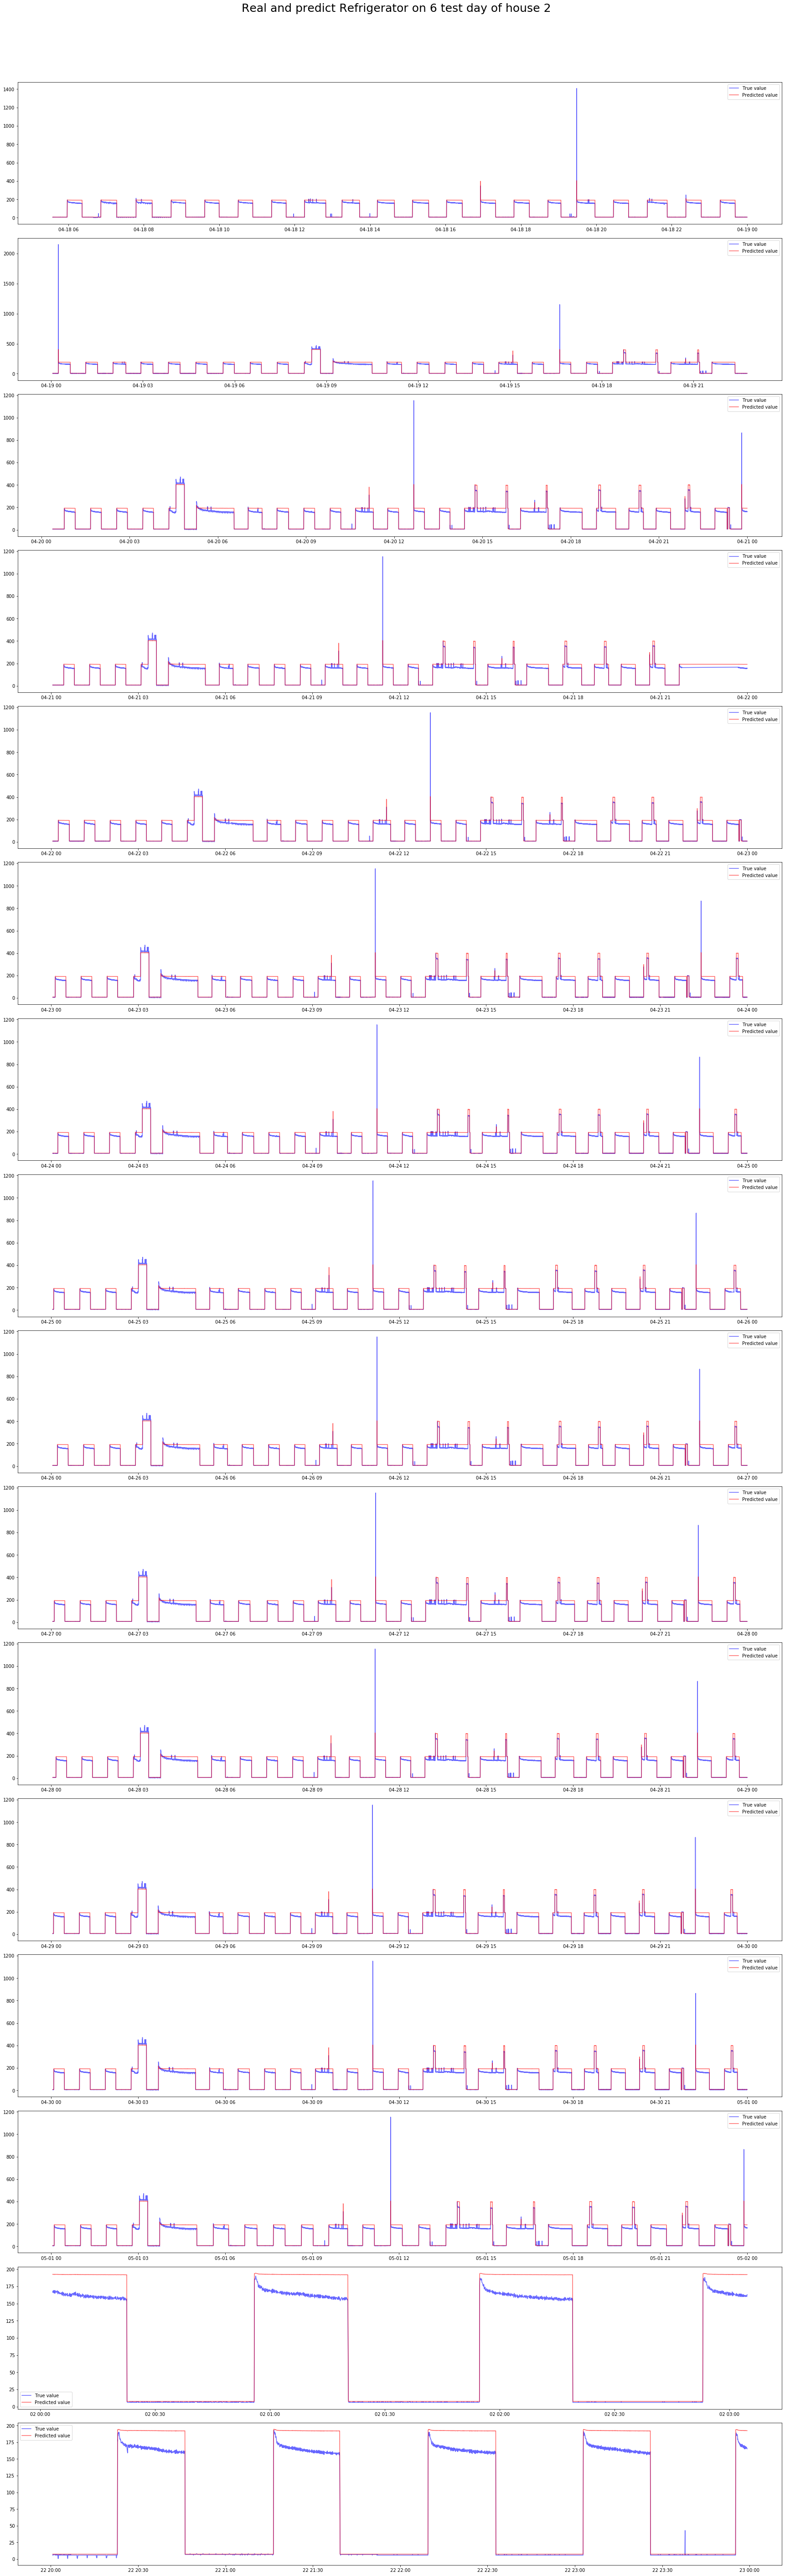

In [70]:
plot_each_app(df[2], dates[2], pred_lstm_h2, y_2[int(-0.2*len(y_2)):], 
              'Real and predict Refrigerator on 6 test day of house 2', look_back = 50)

We can also see that the True value and the Predictued value is almost accurate using LSTM and also the MSE error is much lower compared to the other models. Hence we can say that LSTM has produced the best results in this project.